In [3]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
df = pandas.read_csv("datasets - Million Live_v2.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,mltd,amami haruka,anniv,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,mltd,kisaragi chihaya,anniv,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,mltd,hoshi miki,anniv,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,mltd,hagiwara yukiho,anniv,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,mltd,takatsuki yayoi,anniv,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [3]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_mltd
0,1
1,1
2,1
3,1
4,1


In [4]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,idol_handa roco,...,idol_suou momoko,idol_takatsuki yayoi,idol_takayama sayoko,idol_tanaka kotoha,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_toyokawa fuuka,idol_yabuki kana,idol_yokoyama nao
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_anniv,event_type_theater,event_type_tour
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [6]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [7]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,...,event_type_tour,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,1,0,0,0,0,0,0,0,...,0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,1,0,...,0,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [8]:
df.shape

(148, 65)

In [9]:
#Zscoring
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()
df['t2_zscore'] = (df['t2_cutoff'] - df['t2_cutoff'].mean())/df['t2_cutoff'].std()   
df['t3_zscore'] = (df['t3_cutoff'] - df['t3_cutoff'].mean())/df['t3_cutoff'].std()   
df.head()
df.shape

(148, 68)

In [10]:
# #Split data
# # split into input (X) and output (Y) variables
# dataset = df.values
# X = dataset[:,0:59]
# Y_t1 = dataset[:,65]
# Y_t2 = dataset[:,66]
# Y_t3 = dataset[:,67]
# X_train = dataset[:65,0:59]
# X_test = dataset[65:,0:59]
# Y_train_t1 = dataset[:65,65]
# Y_test_t1 = dataset[65:,65]
# Y_train_t2 = dataset[:66,66]
# Y_test_t2 = dataset[66:,66]
# Y_train_t3 = dataset[:67,67]
# Y_test_t3 = dataset[67:,67]

# Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:59]
Y = dataset[:,65:68]
X_train = dataset[:124,0:59]
X_test = dataset[124:,0:59]
Y_train = dataset[:124,65:68]
Y_test = dataset[124:,65:68]
Y_act = dataset[124:,59:62]

In [11]:
# X_train_t1 = X_train[:,0:1]
# X_train_t2 = X_train[:,1:2]
# X_train_t3 = X_train[:,2:3]
# X_test_t1 = X_test[:,0:1]
# X_test_t2 = X_test[:,1:2]
# X_test_t3 = X_test[:,2:3]
Y_train_t1 = Y_train[:,0:1]
Y_train_t2 = Y_train[:,1:2]
Y_train_t3 = Y_train[:,2:3]
Y_test_t1 = Y_test[:,0:1]
Y_test_t2 = Y_test[:,1:2]
Y_test_t3 = Y_test[:,2:3]

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14768458476099141538
]


In [13]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import ELU
# from tensorflow.keras.layers import Dropout

In [198]:
epoch = 3000
batch = 5

def final_model():
    # create model
    model = Sequential()
    model.add(Dense(590, input_dim=59, kernel_initializer='normal', activation='relu'))
    model.add(Dense(59, kernel_initializer='normal',activation='linear'))
    model.add(Dense(3, kernel_initializer='normal',activation='linear'))
    
    model.add(Dense(1, activation='linear'))
    opt = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
    
    model.compile(loss='mae', optimizer=opt, metrics=['mae', 'mse'])
    return model

# def final_model():
#     model = Sequential()
#     model.add(dense(59, input_dim=59, activation='relu', kernel_initializer='he_uniform'))
#     model.add(dense(1, activation='linear'))
#     opt = SGD(lr=0.01, momentum=0.9)
#     model.compile(loss='mse',optimizer = opt)
#     return model



In [199]:
# #fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)
# # evaluate model with standardized dataset
# estimator = KerasRegressor(build_fn=final_model(), epochs=epoch, batch_size=5, verbose=0)

In [200]:
#Retrain model
model_t1 = final_model()
model_t2 = final_model()
model_t3 = final_model()
history_t1 = model_t1.fit(X_train, Y_train_t1, validation_data=(X_test, Y_test_t1), epochs=epoch,batch_size=batch,verbose=1)
history_t2 = model_t2.fit(X_train, Y_train_t2, validation_data=(X_test,Y_test_t2), epochs=epoch,batch_size=batch,verbose=1)
history_t3 = model_t3.fit(X_train, Y_train_t3, validation_data=(X_test,Y_test_t3), epochs=epoch,batch_size=batch,verbose=1)

# #Load model
# import keras
# from keras.models import load_model
# from keras.utils import CustomObjectScope
# from keras.initializers import glorot_uniform

# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
#             model_t1 = load_model('mltd_model_t1_v2.h5')
#             model_t2 = load_model('mltd_model_t2_v2.h5')
#             model_t3 = load_model('mltd_model_t3_v2.h5')


Train on 124 samples, validate on 24 samples
Epoch 1/3000
124/124 [==============================] - 1s 7ms/sample - loss: 6.2925 - mean_absolute_error: 6.2925 - mean_squared_error: 70.6143 - val_loss: 5.6997 - val_mean_absolute_error: 5.6997 - val_mean_squared_error: 32.5312
Epoch 2/3000
124/124 [==============================] - 0s 814us/sample - loss: 4.0303 - mean_absolute_error: 4.0303 - mean_squared_error: 17.2697 - val_loss: 2.3775 - val_mean_absolute_error: 2.3775 - val_mean_squared_error: 5.6975
Epoch 3/3000
124/124 [==============================] - 0s 814us/sample - loss: 3.9602 - mean_absolute_error: 3.9602 - mean_squared_error: 16.7225 - val_loss: 5.6206 - val_mean_absolute_error: 5.6206 - val_mean_squared_error: 31.6366
Epoch 4/3000
124/124 [==============================] - 0s 830us/sample - loss: 3.8962 - mean_absolute_error: 3.8962 - mean_squared_error: 16.2624 - val_loss: 2.1920 - val_mean_absolute_error: 2.1920 - val_mean_squared_error: 4.8504
Epoch 5/3000
124/124 [=

Epoch 36/3000
124/124 [==============================] - 0s 822us/sample - loss: 3.3080 - mean_absolute_error: 3.3080 - mean_squared_error: 11.9546 - val_loss: 2.1234 - val_mean_absolute_error: 2.1234 - val_mean_squared_error: 4.5531
Epoch 37/3000
124/124 [==============================] - 0s 838us/sample - loss: 3.2580 - mean_absolute_error: 3.2580 - mean_squared_error: 11.5992 - val_loss: 4.4757 - val_mean_absolute_error: 4.4757 - val_mean_squared_error: 20.0768
Epoch 38/3000
124/124 [==============================] - 0s 911us/sample - loss: 3.3896 - mean_absolute_error: 3.3896 - mean_squared_error: 12.4387 - val_loss: 1.9509 - val_mean_absolute_error: 1.9509 - val_mean_squared_error: 3.8500
Epoch 39/3000
124/124 [==============================] - 0s 903us/sample - loss: 3.3010 - mean_absolute_error: 3.3010 - mean_squared_error: 11.8567 - val_loss: 4.5617 - val_mean_absolute_error: 4.5617 - val_mean_squared_error: 20.8529
Epoch 40/3000
124/124 [==============================] - 0s 77

124/124 [==============================] - 0s 846us/sample - loss: 2.6782 - mean_absolute_error: 2.6782 - mean_squared_error: 9.0222 - val_loss: 4.9692 - val_mean_absolute_error: 4.9692 - val_mean_squared_error: 24.7347
Epoch 72/3000
124/124 [==============================] - 0s 782us/sample - loss: 2.8017 - mean_absolute_error: 2.8017 - mean_squared_error: 9.7358 - val_loss: 0.3480 - val_mean_absolute_error: 0.3480 - val_mean_squared_error: 0.1625
Epoch 73/3000
124/124 [==============================] - 0s 895us/sample - loss: 2.6839 - mean_absolute_error: 2.6839 - mean_squared_error: 9.1720 - val_loss: 5.0075 - val_mean_absolute_error: 5.0075 - val_mean_squared_error: 25.1167
Epoch 74/3000
124/124 [==============================] - 0s 798us/sample - loss: 2.7294 - mean_absolute_error: 2.7294 - mean_squared_error: 9.4681 - val_loss: 0.2712 - val_mean_absolute_error: 0.2712 - val_mean_squared_error: 0.1148
Epoch 75/3000
124/124 [==============================] - 0s 766us/sample - loss:

124/124 [==============================] - 0s 750us/sample - loss: 1.8992 - mean_absolute_error: 1.8992 - mean_squared_error: 4.9584 - val_loss: 3.6589 - val_mean_absolute_error: 3.6589 - val_mean_squared_error: 13.4249
Epoch 142/3000
124/124 [==============================] - 0s 774us/sample - loss: 1.9241 - mean_absolute_error: 1.9241 - mean_squared_error: 4.7245 - val_loss: 2.9471 - val_mean_absolute_error: 2.9471 - val_mean_squared_error: 8.7227
Epoch 143/3000
124/124 [==============================] - 0s 814us/sample - loss: 1.9234 - mean_absolute_error: 1.9234 - mean_squared_error: 5.2057 - val_loss: 3.9020 - val_mean_absolute_error: 3.9020 - val_mean_squared_error: 15.2625
Epoch 144/3000
124/124 [==============================] - 0s 838us/sample - loss: 1.8800 - mean_absolute_error: 1.8800 - mean_squared_error: 5.0218 - val_loss: 0.2006 - val_mean_absolute_error: 0.2006 - val_mean_squared_error: 0.0772
Epoch 145/3000
124/124 [==============================] - 0s 798us/sample - l

124/124 [==============================] - 0s 838us/sample - loss: 1.6996 - mean_absolute_error: 1.6996 - mean_squared_error: 3.9561 - val_loss: 2.7871 - val_mean_absolute_error: 2.7871 - val_mean_squared_error: 7.8032
Epoch 177/3000
124/124 [==============================] - 0s 741us/sample - loss: 1.7542 - mean_absolute_error: 1.7542 - mean_squared_error: 4.1251 - val_loss: 0.9110 - val_mean_absolute_error: 0.9110 - val_mean_squared_error: 0.8648
Epoch 178/3000
124/124 [==============================] - 0s 758us/sample - loss: 1.7012 - mean_absolute_error: 1.7012 - mean_squared_error: 3.8702 - val_loss: 2.7195 - val_mean_absolute_error: 2.7195 - val_mean_squared_error: 7.4304
Epoch 179/3000
124/124 [==============================] - 0s 766us/sample - loss: 1.7604 - mean_absolute_error: 1.7604 - mean_squared_error: 4.0219 - val_loss: 0.8856 - val_mean_absolute_error: 0.8856 - val_mean_squared_error: 0.8189
Epoch 180/3000
124/124 [==============================] - 0s 774us/sample - los

124/124 [==============================] - 0s 766us/sample - loss: 1.3102 - mean_absolute_error: 1.3102 - mean_squared_error: 2.7059 - val_loss: 3.1144 - val_mean_absolute_error: 3.1144 - val_mean_squared_error: 9.7322
Epoch 212/3000
124/124 [==============================] - 0s 790us/sample - loss: 1.4960 - mean_absolute_error: 1.4960 - mean_squared_error: 3.3836 - val_loss: 2.2349 - val_mean_absolute_error: 2.2349 - val_mean_squared_error: 5.0278
Epoch 213/3000
124/124 [==============================] - 0s 887us/sample - loss: 1.3790 - mean_absolute_error: 1.3790 - mean_squared_error: 2.7918 - val_loss: 0.5896 - val_mean_absolute_error: 0.5896 - val_mean_squared_error: 0.3675
Epoch 214/3000
124/124 [==============================] - 0s 774us/sample - loss: 1.4829 - mean_absolute_error: 1.4829 - mean_squared_error: 3.2098 - val_loss: 0.1479 - val_mean_absolute_error: 0.1479 - val_mean_squared_error: 0.0539
Epoch 215/3000
124/124 [==============================] - 0s 782us/sample - los

124/124 [==============================] - 0s 766us/sample - loss: 1.2327 - mean_absolute_error: 1.2327 - mean_squared_error: 2.2475 - val_loss: 0.6881 - val_mean_absolute_error: 0.6881 - val_mean_squared_error: 0.5044
Epoch 247/3000
124/124 [==============================] - 0s 766us/sample - loss: 1.3768 - mean_absolute_error: 1.3768 - mean_squared_error: 2.7462 - val_loss: 0.4839 - val_mean_absolute_error: 0.4839 - val_mean_squared_error: 0.2651
Epoch 248/3000
124/124 [==============================] - 0s 774us/sample - loss: 1.2247 - mean_absolute_error: 1.2247 - mean_squared_error: 2.1868 - val_loss: 2.2246 - val_mean_absolute_error: 2.2246 - val_mean_squared_error: 4.9799
Epoch 249/3000
124/124 [==============================] - 0s 733us/sample - loss: 1.2629 - mean_absolute_error: 1.2629 - mean_squared_error: 2.4545 - val_loss: 3.0729 - val_mean_absolute_error: 3.0729 - val_mean_squared_error: 9.4734
Epoch 250/3000
124/124 [==============================] - 0s 750us/sample - los

124/124 [==============================] - 0s 742us/sample - loss: 1.1614 - mean_absolute_error: 1.1614 - mean_squared_error: 2.0687 - val_loss: 1.5748 - val_mean_absolute_error: 1.5748 - val_mean_squared_error: 2.5086
Epoch 317/3000
124/124 [==============================] - 0s 758us/sample - loss: 1.3078 - mean_absolute_error: 1.3078 - mean_squared_error: 2.3839 - val_loss: 0.5620 - val_mean_absolute_error: 0.5620 - val_mean_squared_error: 0.3350
Epoch 318/3000
124/124 [==============================] - 0s 774us/sample - loss: 1.1093 - mean_absolute_error: 1.1093 - mean_squared_error: 1.7438 - val_loss: 0.3087 - val_mean_absolute_error: 0.3087 - val_mean_squared_error: 0.1053
Epoch 319/3000
124/124 [==============================] - 0s 975us/sample - loss: 1.0673 - mean_absolute_error: 1.0673 - mean_squared_error: 1.7938 - val_loss: 1.4560 - val_mean_absolute_error: 1.4560 - val_mean_squared_error: 2.1485
Epoch 320/3000
124/124 [==============================] - 0s 734us/sample - los

124/124 [==============================] - 0s 693us/sample - loss: 0.9956 - mean_absolute_error: 0.9956 - mean_squared_error: 1.3548 - val_loss: 0.2698 - val_mean_absolute_error: 0.2698 - val_mean_squared_error: 0.0997
Epoch 387/3000
124/124 [==============================] - 0s 701us/sample - loss: 1.0214 - mean_absolute_error: 1.0214 - mean_squared_error: 1.6209 - val_loss: 1.6572 - val_mean_absolute_error: 1.6572 - val_mean_squared_error: 2.7731
Epoch 388/3000
124/124 [==============================] - 0s 717us/sample - loss: 0.9209 - mean_absolute_error: 0.9209 - mean_squared_error: 1.2571 - val_loss: 2.0011 - val_mean_absolute_error: 2.0011 - val_mean_squared_error: 4.0313
Epoch 389/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.8892 - mean_absolute_error: 0.8892 - mean_squared_error: 1.2425 - val_loss: 1.5686 - val_mean_absolute_error: 1.5686 - val_mean_squared_error: 2.4874
Epoch 390/3000
124/124 [==============================] - 0s 709us/sample - los

124/124 [==============================] - 0s 943us/sample - loss: 0.8649 - mean_absolute_error: 0.8649 - mean_squared_error: 1.0753 - val_loss: 0.6403 - val_mean_absolute_error: 0.6403 - val_mean_squared_error: 0.4352
Epoch 457/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.8534 - mean_absolute_error: 0.8534 - mean_squared_error: 1.1208 - val_loss: 0.1085 - val_mean_absolute_error: 0.1085 - val_mean_squared_error: 0.0318
Epoch 458/3000
124/124 [==============================] - 0s 766us/sample - loss: 0.8683 - mean_absolute_error: 0.8683 - mean_squared_error: 1.1755 - val_loss: 0.6148 - val_mean_absolute_error: 0.6148 - val_mean_squared_error: 0.4029
Epoch 459/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.8519 - mean_absolute_error: 0.8519 - mean_squared_error: 1.1409 - val_loss: 0.1072 - val_mean_absolute_error: 0.1072 - val_mean_squared_error: 0.0252
Epoch 460/3000
124/124 [==============================] - 0s 903us/sample - los

124/124 [==============================] - 0s 733us/sample - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_squared_error: 0.9928 - val_loss: 0.2576 - val_mean_absolute_error: 0.2576 - val_mean_squared_error: 0.0759
Epoch 527/3000
124/124 [==============================] - 0s 701us/sample - loss: 0.7532 - mean_absolute_error: 0.7532 - mean_squared_error: 0.8426 - val_loss: 0.5979 - val_mean_absolute_error: 0.5979 - val_mean_squared_error: 0.3817
Epoch 528/3000
124/124 [==============================] - 0s 717us/sample - loss: 0.7924 - mean_absolute_error: 0.7924 - mean_squared_error: 0.9518 - val_loss: 0.1074 - val_mean_absolute_error: 0.1074 - val_mean_squared_error: 0.0270
Epoch 529/3000
124/124 [==============================] - 0s 693us/sample - loss: 0.7550 - mean_absolute_error: 0.7550 - mean_squared_error: 0.8351 - val_loss: 0.3849 - val_mean_absolute_error: 0.3849 - val_mean_squared_error: 0.1724
Epoch 530/3000
124/124 [==============================] - 0s 717us/sample - los

124/124 [==============================] - 0s 709us/sample - loss: 0.7465 - mean_absolute_error: 0.7465 - mean_squared_error: 0.8786 - val_loss: 0.3860 - val_mean_absolute_error: 0.3860 - val_mean_squared_error: 0.1725
Epoch 597/3000
124/124 [==============================] - 0s 733us/sample - loss: 0.7438 - mean_absolute_error: 0.7438 - mean_squared_error: 0.8124 - val_loss: 0.3128 - val_mean_absolute_error: 0.3128 - val_mean_squared_error: 0.1214
Epoch 598/3000
124/124 [==============================] - 0s 717us/sample - loss: 0.7872 - mean_absolute_error: 0.7872 - mean_squared_error: 0.9366 - val_loss: 0.8095 - val_mean_absolute_error: 0.8095 - val_mean_squared_error: 0.6790
Epoch 599/3000
124/124 [==============================] - 0s 693us/sample - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_squared_error: 0.8150 - val_loss: 0.2838 - val_mean_absolute_error: 0.2838 - val_mean_squared_error: 0.1041
Epoch 600/3000
124/124 [==============================] - 0s 734us/sample - los

124/124 [==============================] - 0s 717us/sample - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_squared_error: 0.9166 - val_loss: 0.1118 - val_mean_absolute_error: 0.1118 - val_mean_squared_error: 0.0242
Epoch 667/3000
124/124 [==============================] - 0s 717us/sample - loss: 0.6712 - mean_absolute_error: 0.6712 - mean_squared_error: 0.7082 - val_loss: 0.5214 - val_mean_absolute_error: 0.5214 - val_mean_squared_error: 0.2943
Epoch 668/3000
124/124 [==============================] - 0s 758us/sample - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_squared_error: 0.7151 - val_loss: 0.7415 - val_mean_absolute_error: 0.7415 - val_mean_squared_error: 0.5734
Epoch 669/3000
124/124 [==============================] - 0s 742us/sample - loss: 0.6655 - mean_absolute_error: 0.6655 - mean_squared_error: 0.7663 - val_loss: 1.0986 - val_mean_absolute_error: 1.0986 - val_mean_squared_error: 1.2303
Epoch 670/3000
124/124 [==============================] - 0s 701us/sample - los

124/124 [==============================] - 0s 693us/sample - loss: 0.7064 - mean_absolute_error: 0.7064 - mean_squared_error: 0.7981 - val_loss: 0.1828 - val_mean_absolute_error: 0.1828 - val_mean_squared_error: 0.0542
Epoch 737/3000
124/124 [==============================] - 0s 693us/sample - loss: 0.6612 - mean_absolute_error: 0.6612 - mean_squared_error: 0.6854 - val_loss: 0.1325 - val_mean_absolute_error: 0.1325 - val_mean_squared_error: 0.0301
Epoch 738/3000
124/124 [==============================] - 0s 709us/sample - loss: 0.6304 - mean_absolute_error: 0.6304 - mean_squared_error: 0.5785 - val_loss: 0.8718 - val_mean_absolute_error: 0.8718 - val_mean_squared_error: 0.7833
Epoch 739/3000
124/124 [==============================] - 0s 750us/sample - loss: 0.6999 - mean_absolute_error: 0.6999 - mean_squared_error: 0.7574 - val_loss: 0.5488 - val_mean_absolute_error: 0.5488 - val_mean_squared_error: 0.3245
Epoch 740/3000
124/124 [==============================] - 0s 790us/sample - los

124/124 [==============================] - 0s 766us/sample - loss: 0.6517 - mean_absolute_error: 0.6517 - mean_squared_error: 0.6467 - val_loss: 0.3139 - val_mean_absolute_error: 0.3139 - val_mean_squared_error: 0.1119
Epoch 807/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_squared_error: 0.6400 - val_loss: 0.2457 - val_mean_absolute_error: 0.2457 - val_mean_squared_error: 0.0731
Epoch 808/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_squared_error: 0.7047 - val_loss: 0.7356 - val_mean_absolute_error: 0.7356 - val_mean_squared_error: 0.5649
Epoch 809/3000
124/124 [==============================] - 0s 734us/sample - loss: 0.6519 - mean_absolute_error: 0.6519 - mean_squared_error: 0.6918 - val_loss: 0.2612 - val_mean_absolute_error: 0.2612 - val_mean_squared_error: 0.0811
Epoch 810/3000
124/124 [==============================] - 0s 733us/sample - los

124/124 [==============================] - 0s 870us/sample - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_squared_error: 0.6387 - val_loss: 0.2247 - val_mean_absolute_error: 0.2247 - val_mean_squared_error: 0.0638
Epoch 877/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6422 - mean_absolute_error: 0.6422 - mean_squared_error: 0.6031 - val_loss: 0.4797 - val_mean_absolute_error: 0.4797 - val_mean_squared_error: 0.2527
Epoch 878/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.6012 - mean_absolute_error: 0.6012 - mean_squared_error: 0.5709 - val_loss: 0.3388 - val_mean_absolute_error: 0.3388 - val_mean_squared_error: 0.1389
Epoch 879/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_squared_error: 0.6654 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615 - val_mean_squared_error: 0.0451
Epoch 880/3000
124/124 [==============================] - 0s 911us/sample - los

124/124 [==============================] - 0s 870us/sample - loss: 0.6440 - mean_absolute_error: 0.6440 - mean_squared_error: 0.6065 - val_loss: 0.5154 - val_mean_absolute_error: 0.5154 - val_mean_squared_error: 0.2902
Epoch 947/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.6255 - mean_absolute_error: 0.6255 - mean_squared_error: 0.6041 - val_loss: 0.5377 - val_mean_absolute_error: 0.5377 - val_mean_squared_error: 0.3137
Epoch 948/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5967 - mean_absolute_error: 0.5967 - mean_squared_error: 0.5707 - val_loss: 0.4098 - val_mean_absolute_error: 0.4098 - val_mean_squared_error: 0.1876
Epoch 949/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_squared_error: 0.6888 - val_loss: 0.1303 - val_mean_absolute_error: 0.1303 - val_mean_squared_error: 0.0295
Epoch 950/3000
124/124 [==============================] - 0s 887us/sample - los

124/124 [==============================] - 0s 846us/sample - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_squared_error: 0.5839 - val_loss: 0.3509 - val_mean_absolute_error: 0.3509 - val_mean_squared_error: 0.1410
Epoch 1017/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6736 - mean_absolute_error: 0.6736 - mean_squared_error: 0.6996 - val_loss: 0.2312 - val_mean_absolute_error: 0.2312 - val_mean_squared_error: 0.0679
Epoch 1018/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6497 - mean_absolute_error: 0.6497 - mean_squared_error: 0.6131 - val_loss: 0.1652 - val_mean_absolute_error: 0.1652 - val_mean_squared_error: 0.0409
Epoch 1019/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_squared_error: 0.5707 - val_loss: 0.6181 - val_mean_absolute_error: 0.6181 - val_mean_squared_error: 0.4082
Epoch 1020/3000
124/124 [==============================] - 0s 879us/sample -

Epoch 1051/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.6514 - mean_absolute_error: 0.6514 - mean_squared_error: 0.6218 - val_loss: 0.1305 - val_mean_absolute_error: 0.1305 - val_mean_squared_error: 0.0268
Epoch 1052/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.6363 - mean_absolute_error: 0.6363 - mean_squared_error: 0.5963 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420 - val_mean_squared_error: 0.0315
Epoch 1053/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_squared_error: 0.5575 - val_loss: 0.5369 - val_mean_absolute_error: 0.5369 - val_mean_squared_error: 0.3147
Epoch 1054/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.6404 - mean_absolute_error: 0.6404 - mean_squared_error: 0.5945 - val_loss: 0.1470 - val_mean_absolute_error: 0.1470 - val_mean_squared_error: 0.0381
Epoch 1055/3000
124/124 [==============================] - 0s 

Epoch 1086/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_squared_error: 0.5325 - val_loss: 0.2221 - val_mean_absolute_error: 0.2221 - val_mean_squared_error: 0.0725
Epoch 1087/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5981 - mean_absolute_error: 0.5981 - mean_squared_error: 0.5992 - val_loss: 0.1809 - val_mean_absolute_error: 0.1809 - val_mean_squared_error: 0.0530
Epoch 1088/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.6457 - mean_absolute_error: 0.6457 - mean_squared_error: 0.6245 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727 - val_mean_squared_error: 0.0998
Epoch 1089/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5982 - mean_absolute_error: 0.5982 - mean_squared_error: 0.5689 - val_loss: 0.2251 - val_mean_absolute_error: 0.2251 - val_mean_squared_error: 0.0740
Epoch 1090/3000
124/124 [==============================] - 0s 84

Epoch 1121/3000
124/124 [==============================] - 0s 774us/sample - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_squared_error: 0.6173 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508 - val_mean_squared_error: 0.0394
Epoch 1122/3000
124/124 [==============================] - 0s 734us/sample - loss: 0.5716 - mean_absolute_error: 0.5716 - mean_squared_error: 0.5286 - val_loss: 0.4352 - val_mean_absolute_error: 0.4352 - val_mean_squared_error: 0.2163
Epoch 1123/3000
124/124 [==============================] - 0s 701us/sample - loss: 0.6344 - mean_absolute_error: 0.6344 - mean_squared_error: 0.6052 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383 - val_mean_squared_error: 0.0328
Epoch 1124/3000
124/124 [==============================] - 0s 749us/sample - loss: 0.6046 - mean_absolute_error: 0.6046 - mean_squared_error: 0.5632 - val_loss: 0.2188 - val_mean_absolute_error: 0.2188 - val_mean_squared_error: 0.0631
Epoch 1125/3000
124/124 [==============================] - 0

Epoch 1156/3000
124/124 [==============================] - 0s 725us/sample - loss: 0.5919 - mean_absolute_error: 0.5919 - mean_squared_error: 0.5713 - val_loss: 0.2970 - val_mean_absolute_error: 0.2970 - val_mean_squared_error: 0.1076
Epoch 1157/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_squared_error: 0.5225 - val_loss: 0.2232 - val_mean_absolute_error: 0.2232 - val_mean_squared_error: 0.0731
Epoch 1158/3000
124/124 [==============================] - 0s 744us/sample - loss: 0.6070 - mean_absolute_error: 0.6070 - mean_squared_error: 0.5571 - val_loss: 0.3935 - val_mean_absolute_error: 0.3935 - val_mean_squared_error: 0.1773
Epoch 1159/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.6081 - mean_absolute_error: 0.6081 - mean_squared_error: 0.5484 - val_loss: 0.3882 - val_mean_absolute_error: 0.3882 - val_mean_squared_error: 0.1771
Epoch 1160/3000
124/124 [==============================] - 0

Epoch 1191/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.6089 - mean_absolute_error: 0.6089 - mean_squared_error: 0.6173 - val_loss: 0.4242 - val_mean_absolute_error: 0.4242 - val_mean_squared_error: 0.2063
Epoch 1192/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.6170 - mean_absolute_error: 0.6170 - mean_squared_error: 0.6104 - val_loss: 0.1601 - val_mean_absolute_error: 0.1601 - val_mean_squared_error: 0.0438
Epoch 1193/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.5959 - mean_absolute_error: 0.5959 - mean_squared_error: 0.5278 - val_loss: 0.5186 - val_mean_absolute_error: 0.5186 - val_mean_squared_error: 0.2956
Epoch 1194/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.6157 - mean_absolute_error: 0.6157 - mean_squared_error: 0.5991 - val_loss: 0.5124 - val_mean_absolute_error: 0.5124 - val_mean_squared_error: 0.2904
Epoch 1195/3000
124/124 [==============================] - 0

Epoch 1226/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.6279 - mean_absolute_error: 0.6279 - mean_squared_error: 0.6599 - val_loss: 0.1786 - val_mean_absolute_error: 0.1786 - val_mean_squared_error: 0.0525
Epoch 1227/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5770 - mean_absolute_error: 0.5770 - mean_squared_error: 0.5115 - val_loss: 0.3026 - val_mean_absolute_error: 0.3026 - val_mean_squared_error: 0.1190
Epoch 1228/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_squared_error: 0.5416 - val_loss: 0.4960 - val_mean_absolute_error: 0.4960 - val_mean_squared_error: 0.2727
Epoch 1229/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.6144 - mean_absolute_error: 0.6144 - mean_squared_error: 0.5311 - val_loss: 0.1967 - val_mean_absolute_error: 0.1967 - val_mean_squared_error: 0.0605
Epoch 1230/3000
124/124 [==============================] - 0

Epoch 1261/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.6210 - mean_absolute_error: 0.6210 - mean_squared_error: 0.5868 - val_loss: 0.1903 - val_mean_absolute_error: 0.1903 - val_mean_squared_error: 0.0573
Epoch 1262/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_squared_error: 0.5813 - val_loss: 0.4641 - val_mean_absolute_error: 0.4641 - val_mean_squared_error: 0.2423
Epoch 1263/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.5821 - mean_absolute_error: 0.5821 - mean_squared_error: 0.5231 - val_loss: 0.4139 - val_mean_absolute_error: 0.4139 - val_mean_squared_error: 0.1967
Epoch 1264/3000
124/124 [==============================] - 0s 886us/sample - loss: 0.6031 - mean_absolute_error: 0.6031 - mean_squared_error: 0.5681 - val_loss: 0.3827 - val_mean_absolute_error: 0.3827 - val_mean_squared_error: 0.1731
Epoch 1265/3000
124/124 [==============================] - 0

Epoch 1296/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.6255 - mean_absolute_error: 0.6255 - mean_squared_error: 0.5706 - val_loss: 0.5924 - val_mean_absolute_error: 0.5924 - val_mean_squared_error: 0.3783
Epoch 1297/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5903 - mean_absolute_error: 0.5903 - mean_squared_error: 0.5477 - val_loss: 0.1784 - val_mean_absolute_error: 0.1784 - val_mean_squared_error: 0.0468
Epoch 1298/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5809 - mean_absolute_error: 0.5809 - mean_squared_error: 0.5187 - val_loss: 0.3038 - val_mean_absolute_error: 0.3038 - val_mean_squared_error: 0.1130
Epoch 1299/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5716 - mean_absolute_error: 0.5716 - mean_squared_error: 0.5321 - val_loss: 0.4011 - val_mean_absolute_error: 0.4011 - val_mean_squared_error: 0.1882
Epoch 1300/3000
124/124 [==============================] - 0

Epoch 1331/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.6134 - mean_absolute_error: 0.6134 - mean_squared_error: 0.5724 - val_loss: 0.1669 - val_mean_absolute_error: 0.1669 - val_mean_squared_error: 0.0414
Epoch 1332/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.6069 - mean_absolute_error: 0.6069 - mean_squared_error: 0.5487 - val_loss: 0.1347 - val_mean_absolute_error: 0.1347 - val_mean_squared_error: 0.0285
Epoch 1333/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.6315 - mean_absolute_error: 0.6315 - mean_squared_error: 0.6423 - val_loss: 0.2329 - val_mean_absolute_error: 0.2329 - val_mean_squared_error: 0.0720
Epoch 1334/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5830 - mean_absolute_error: 0.5830 - mean_squared_error: 0.5079 - val_loss: 0.2512 - val_mean_absolute_error: 0.2512 - val_mean_squared_error: 0.0880
Epoch 1335/3000
124/124 [==============================] - 0

Epoch 1366/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5953 - mean_absolute_error: 0.5953 - mean_squared_error: 0.5853 - val_loss: 0.6319 - val_mean_absolute_error: 0.6319 - val_mean_squared_error: 0.4277
Epoch 1367/3000
124/124 [==============================] - 0s 871us/sample - loss: 0.5804 - mean_absolute_error: 0.5804 - mean_squared_error: 0.5413 - val_loss: 0.1326 - val_mean_absolute_error: 0.1326 - val_mean_squared_error: 0.0273
Epoch 1368/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_squared_error: 0.5371 - val_loss: 0.3016 - val_mean_absolute_error: 0.3016 - val_mean_squared_error: 0.1182
Epoch 1369/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.6111 - mean_absolute_error: 0.6111 - mean_squared_error: 0.5879 - val_loss: 0.3663 - val_mean_absolute_error: 0.3663 - val_mean_squared_error: 0.1622
Epoch 1370/3000
124/124 [==============================] - 0

Epoch 1401/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.6173 - mean_absolute_error: 0.6173 - mean_squared_error: 0.5950 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329 - val_mean_squared_error: 0.0272
Epoch 1402/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5880 - mean_absolute_error: 0.5880 - mean_squared_error: 0.5040 - val_loss: 0.2114 - val_mean_absolute_error: 0.2114 - val_mean_squared_error: 0.0662
Epoch 1403/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5895 - mean_absolute_error: 0.5895 - mean_squared_error: 0.5186 - val_loss: 0.1787 - val_mean_absolute_error: 0.1787 - val_mean_squared_error: 0.0462
Epoch 1404/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.6011 - mean_absolute_error: 0.6011 - mean_squared_error: 0.5458 - val_loss: 0.1604 - val_mean_absolute_error: 0.1604 - val_mean_squared_error: 0.0433
Epoch 1405/3000
124/124 [==============================] - 0

Epoch 1436/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_squared_error: 0.5152 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089 - val_mean_squared_error: 0.2890
Epoch 1437/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.5887 - mean_absolute_error: 0.5887 - mean_squared_error: 0.5407 - val_loss: 0.1760 - val_mean_absolute_error: 0.1760 - val_mean_squared_error: 0.0456
Epoch 1438/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.5799 - mean_absolute_error: 0.5799 - mean_squared_error: 0.5238 - val_loss: 0.2301 - val_mean_absolute_error: 0.2301 - val_mean_squared_error: 0.0696
Epoch 1439/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5878 - mean_absolute_error: 0.5878 - mean_squared_error: 0.5452 - val_loss: 0.2074 - val_mean_absolute_error: 0.2074 - val_mean_squared_error: 0.0593
Epoch 1440/3000
124/124 [==============================] - 0

Epoch 1471/3000
124/124 [==============================] - 0s 871us/sample - loss: 0.5809 - mean_absolute_error: 0.5809 - mean_squared_error: 0.5442 - val_loss: 0.2107 - val_mean_absolute_error: 0.2107 - val_mean_squared_error: 0.0616
Epoch 1472/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5852 - mean_absolute_error: 0.5852 - mean_squared_error: 0.5456 - val_loss: 0.1362 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0286
Epoch 1473/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.6104 - mean_absolute_error: 0.6104 - mean_squared_error: 0.5697 - val_loss: 0.1357 - val_mean_absolute_error: 0.1357 - val_mean_squared_error: 0.0291
Epoch 1474/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.6061 - mean_absolute_error: 0.6061 - mean_squared_error: 0.5711 - val_loss: 0.4071 - val_mean_absolute_error: 0.4071 - val_mean_squared_error: 0.1911
Epoch 1475/3000
124/124 [==============================] - 0

Epoch 1506/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.6390 - mean_absolute_error: 0.6390 - mean_squared_error: 0.5946 - val_loss: 0.1370 - val_mean_absolute_error: 0.1370 - val_mean_squared_error: 0.0294
Epoch 1507/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.6083 - mean_absolute_error: 0.6083 - mean_squared_error: 0.5522 - val_loss: 0.1875 - val_mean_absolute_error: 0.1875 - val_mean_squared_error: 0.0501
Epoch 1508/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5720 - mean_absolute_error: 0.5720 - mean_squared_error: 0.4832 - val_loss: 0.1737 - val_mean_absolute_error: 0.1737 - val_mean_squared_error: 0.0438
Epoch 1509/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5910 - mean_absolute_error: 0.5910 - mean_squared_error: 0.5361 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0294
Epoch 1510/3000
124/124 [==============================] - 0

Epoch 1541/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.6056 - mean_absolute_error: 0.6056 - mean_squared_error: 0.5429 - val_loss: 0.1821 - val_mean_absolute_error: 0.1821 - val_mean_squared_error: 0.0536
Epoch 1542/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_squared_error: 0.5495 - val_loss: 0.2272 - val_mean_absolute_error: 0.2272 - val_mean_squared_error: 0.0744
Epoch 1543/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5855 - mean_absolute_error: 0.5855 - mean_squared_error: 0.5425 - val_loss: 0.2201 - val_mean_absolute_error: 0.2201 - val_mean_squared_error: 0.0716
Epoch 1544/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.6008 - mean_absolute_error: 0.6008 - mean_squared_error: 0.5391 - val_loss: 0.1917 - val_mean_absolute_error: 0.1917 - val_mean_squared_error: 0.0536
Epoch 1545/3000
124/124 [==============================] - 0

Epoch 1576/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_squared_error: 0.5014 - val_loss: 0.8220 - val_mean_absolute_error: 0.8220 - val_mean_squared_error: 0.7100
Epoch 1577/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.6368 - mean_absolute_error: 0.6368 - mean_squared_error: 0.5836 - val_loss: 0.3538 - val_mean_absolute_error: 0.3538 - val_mean_squared_error: 0.1560
Epoch 1578/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5869 - mean_absolute_error: 0.5869 - mean_squared_error: 0.5140 - val_loss: 0.2066 - val_mean_absolute_error: 0.2066 - val_mean_squared_error: 0.0600
Epoch 1579/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5891 - mean_absolute_error: 0.5891 - mean_squared_error: 0.5627 - val_loss: 0.2554 - val_mean_absolute_error: 0.2554 - val_mean_squared_error: 0.0836
Epoch 1580/3000
124/124 [==============================] - 0

Epoch 1611/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5665 - mean_absolute_error: 0.5665 - mean_squared_error: 0.5257 - val_loss: 0.1691 - val_mean_absolute_error: 0.1691 - val_mean_squared_error: 0.0470
Epoch 1612/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5868 - mean_absolute_error: 0.5868 - mean_squared_error: 0.5190 - val_loss: 0.1574 - val_mean_absolute_error: 0.1574 - val_mean_squared_error: 0.0408
Epoch 1613/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5632 - mean_absolute_error: 0.5632 - mean_squared_error: 0.4926 - val_loss: 0.1949 - val_mean_absolute_error: 0.1949 - val_mean_squared_error: 0.0538
Epoch 1614/3000
124/124 [==============================] - 0s 774us/sample - loss: 0.5873 - mean_absolute_error: 0.5873 - mean_squared_error: 0.5400 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394 - val_mean_squared_error: 0.0293
Epoch 1615/3000
124/124 [==============================] - 0

Epoch 1646/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_squared_error: 0.5220 - val_loss: 0.3683 - val_mean_absolute_error: 0.3683 - val_mean_squared_error: 0.1632
Epoch 1647/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5650 - mean_absolute_error: 0.5650 - mean_squared_error: 0.5061 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452 - val_mean_squared_error: 0.0357
Epoch 1648/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5931 - mean_absolute_error: 0.5931 - mean_squared_error: 0.5290 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515 - val_mean_squared_error: 0.0344
Epoch 1649/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.6022 - mean_absolute_error: 0.6022 - mean_squared_error: 0.5407 - val_loss: 0.2120 - val_mean_absolute_error: 0.2120 - val_mean_squared_error: 0.0607
Epoch 1650/3000
124/124 [==============================] - 0s 1m

Epoch 1681/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5825 - mean_absolute_error: 0.5825 - mean_squared_error: 0.5303 - val_loss: 0.1527 - val_mean_absolute_error: 0.1527 - val_mean_squared_error: 0.0348
Epoch 1682/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5982 - mean_absolute_error: 0.5982 - mean_squared_error: 0.5196 - val_loss: 0.1630 - val_mean_absolute_error: 0.1630 - val_mean_squared_error: 0.0437
Epoch 1683/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_squared_error: 0.5078 - val_loss: 0.3170 - val_mean_absolute_error: 0.3170 - val_mean_squared_error: 0.1293
Epoch 1684/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6074 - mean_absolute_error: 0.6074 - mean_squared_error: 0.5517 - val_loss: 0.2783 - val_mean_absolute_error: 0.2783 - val_mean_squared_error: 0.0985
Epoch 1685/3000
124/124 [==============================] - 0s 96

Epoch 1716/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5832 - mean_absolute_error: 0.5832 - mean_squared_error: 0.5112 - val_loss: 0.2923 - val_mean_absolute_error: 0.2923 - val_mean_squared_error: 0.1126
Epoch 1717/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5941 - mean_absolute_error: 0.5941 - mean_squared_error: 0.5225 - val_loss: 0.1478 - val_mean_absolute_error: 0.1478 - val_mean_squared_error: 0.0330
Epoch 1718/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5614 - mean_absolute_error: 0.5614 - mean_squared_error: 0.4669 - val_loss: 0.1955 - val_mean_absolute_error: 0.1955 - val_mean_squared_error: 0.0606
Epoch 1719/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5626 - mean_absolute_error: 0.5626 - mean_squared_error: 0.5271 - val_loss: 0.1607 - val_mean_absolute_error: 0.1607 - val_mean_squared_error: 0.0418
Epoch 1720/3000
124/124 [==============================] - 0

Epoch 1751/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_squared_error: 0.4631 - val_loss: 0.2095 - val_mean_absolute_error: 0.2095 - val_mean_squared_error: 0.0601
Epoch 1752/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5936 - mean_absolute_error: 0.5936 - mean_squared_error: 0.5435 - val_loss: 0.2500 - val_mean_absolute_error: 0.2500 - val_mean_squared_error: 0.0882
Epoch 1753/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5736 - mean_absolute_error: 0.5736 - mean_squared_error: 0.5253 - val_loss: 0.1408 - val_mean_absolute_error: 0.1408 - val_mean_squared_error: 0.0298
Epoch 1754/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.5644 - mean_absolute_error: 0.5644 - mean_squared_error: 0.4864 - val_loss: 0.3195 - val_mean_absolute_error: 0.3195 - val_mean_squared_error: 0.1240
Epoch 1755/3000
124/124 [==============================] - 0

Epoch 1786/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5861 - mean_absolute_error: 0.5861 - mean_squared_error: 0.4925 - val_loss: 0.6000 - val_mean_absolute_error: 0.6000 - val_mean_squared_error: 0.3893
Epoch 1787/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5858 - mean_absolute_error: 0.5858 - mean_squared_error: 0.5211 - val_loss: 0.7954 - val_mean_absolute_error: 0.7954 - val_mean_squared_error: 0.6618
Epoch 1788/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5990 - mean_absolute_error: 0.5990 - mean_squared_error: 0.5586 - val_loss: 0.2143 - val_mean_absolute_error: 0.2143 - val_mean_squared_error: 0.0643
Epoch 1789/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.6008 - mean_absolute_error: 0.6008 - mean_squared_error: 0.5491 - val_loss: 0.2092 - val_mean_absolute_error: 0.2092 - val_mean_squared_error: 0.0669
Epoch 1790/3000
124/124 [==============================] - 0

Epoch 1821/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5930 - mean_absolute_error: 0.5930 - mean_squared_error: 0.5280 - val_loss: 0.1543 - val_mean_absolute_error: 0.1543 - val_mean_squared_error: 0.0385
Epoch 1822/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_squared_error: 0.4944 - val_loss: 0.2377 - val_mean_absolute_error: 0.2377 - val_mean_squared_error: 0.0755
Epoch 1823/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5524 - mean_absolute_error: 0.5524 - mean_squared_error: 0.4702 - val_loss: 0.1788 - val_mean_absolute_error: 0.1788 - val_mean_squared_error: 0.0517
Epoch 1824/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.5909 - mean_absolute_error: 0.5909 - mean_squared_error: 0.5456 - val_loss: 0.3518 - val_mean_absolute_error: 0.3518 - val_mean_squared_error: 0.1500
Epoch 1825/3000
124/124 [==============================] - 0

Epoch 1856/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5731 - mean_absolute_error: 0.5731 - mean_squared_error: 0.4842 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503 - val_mean_squared_error: 0.0369
Epoch 1857/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_squared_error: 0.5105 - val_loss: 0.1375 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0288
Epoch 1858/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_squared_error: 0.5426 - val_loss: 0.3918 - val_mean_absolute_error: 0.3918 - val_mean_squared_error: 0.1830
Epoch 1859/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5850 - mean_absolute_error: 0.5850 - mean_squared_error: 0.5221 - val_loss: 0.1411 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0299
Epoch 1860/3000
124/124 [==============================] - 0

Epoch 1891/3000
124/124 [==============================] - 0s 850us/sample - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_squared_error: 0.5110 - val_loss: 0.1345 - val_mean_absolute_error: 0.1345 - val_mean_squared_error: 0.0297
Epoch 1892/3000
124/124 [==============================] - 0s 791us/sample - loss: 0.5836 - mean_absolute_error: 0.5836 - mean_squared_error: 0.5512 - val_loss: 0.2367 - val_mean_absolute_error: 0.2367 - val_mean_squared_error: 0.0792
Epoch 1893/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5852 - mean_absolute_error: 0.5852 - mean_squared_error: 0.5116 - val_loss: 0.3557 - val_mean_absolute_error: 0.3557 - val_mean_squared_error: 0.1578
Epoch 1894/3000
124/124 [==============================] - 0s 871us/sample - loss: 0.5732 - mean_absolute_error: 0.5732 - mean_squared_error: 0.4959 - val_loss: 0.2522 - val_mean_absolute_error: 0.2522 - val_mean_squared_error: 0.0903
Epoch 1895/3000
124/124 [==============================] - 0

Epoch 1926/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5730 - mean_absolute_error: 0.5730 - mean_squared_error: 0.5002 - val_loss: 0.2269 - val_mean_absolute_error: 0.2269 - val_mean_squared_error: 0.0744
Epoch 1927/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_squared_error: 0.4855 - val_loss: 0.2293 - val_mean_absolute_error: 0.2293 - val_mean_squared_error: 0.0762
Epoch 1928/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5811 - mean_absolute_error: 0.5811 - mean_squared_error: 0.5047 - val_loss: 0.3124 - val_mean_absolute_error: 0.3124 - val_mean_squared_error: 0.1259
Epoch 1929/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5690 - mean_absolute_error: 0.5690 - mean_squared_error: 0.4872 - val_loss: 0.1365 - val_mean_absolute_error: 0.1365 - val_mean_squared_error: 0.0284
Epoch 1930/3000
124/124 [==============================] - 0

Epoch 1961/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5746 - mean_absolute_error: 0.5746 - mean_squared_error: 0.4790 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503 - val_mean_squared_error: 0.0338
Epoch 1962/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5755 - mean_absolute_error: 0.5755 - mean_squared_error: 0.5143 - val_loss: 0.2730 - val_mean_absolute_error: 0.2730 - val_mean_squared_error: 0.1026
Epoch 1963/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5558 - mean_absolute_error: 0.5558 - mean_squared_error: 0.4736 - val_loss: 0.3599 - val_mean_absolute_error: 0.3599 - val_mean_squared_error: 0.1594
Epoch 1964/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5836 - mean_absolute_error: 0.5836 - mean_squared_error: 0.5452 - val_loss: 0.1411 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0297
Epoch 1965/3000
124/124 [==============================] - 0

Epoch 1996/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5596 - mean_absolute_error: 0.5596 - mean_squared_error: 0.5211 - val_loss: 0.1436 - val_mean_absolute_error: 0.1436 - val_mean_squared_error: 0.0315
Epoch 1997/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.5642 - mean_absolute_error: 0.5642 - mean_squared_error: 0.4692 - val_loss: 0.1537 - val_mean_absolute_error: 0.1537 - val_mean_squared_error: 0.0353
Epoch 1998/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_squared_error: 0.4910 - val_loss: 0.1563 - val_mean_absolute_error: 0.1563 - val_mean_squared_error: 0.0400
Epoch 1999/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5369 - mean_absolute_error: 0.5369 - mean_squared_error: 0.4530 - val_loss: 0.3652 - val_mean_absolute_error: 0.3652 - val_mean_squared_error: 0.1641
Epoch 2000/3000
124/124 [==============================] - 0

Epoch 2031/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5680 - mean_absolute_error: 0.5680 - mean_squared_error: 0.5163 - val_loss: 0.1958 - val_mean_absolute_error: 0.1958 - val_mean_squared_error: 0.0607
Epoch 2032/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5737 - mean_absolute_error: 0.5737 - mean_squared_error: 0.5073 - val_loss: 0.1913 - val_mean_absolute_error: 0.1913 - val_mean_squared_error: 0.0581
Epoch 2033/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5663 - mean_absolute_error: 0.5663 - mean_squared_error: 0.4904 - val_loss: 0.2733 - val_mean_absolute_error: 0.2733 - val_mean_squared_error: 0.1026
Epoch 2034/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5953 - mean_absolute_error: 0.5953 - mean_squared_error: 0.5334 - val_loss: 0.2260 - val_mean_absolute_error: 0.2260 - val_mean_squared_error: 0.0742
Epoch 2035/3000
124/124 [==============================] - 0

Epoch 2066/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.5768 - mean_absolute_error: 0.5768 - mean_squared_error: 0.4940 - val_loss: 0.2872 - val_mean_absolute_error: 0.2872 - val_mean_squared_error: 0.1081
Epoch 2067/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_squared_error: 0.4542 - val_loss: 0.1470 - val_mean_absolute_error: 0.1470 - val_mean_squared_error: 0.0316
Epoch 2068/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.5824 - mean_absolute_error: 0.5824 - mean_squared_error: 0.5275 - val_loss: 0.1436 - val_mean_absolute_error: 0.1436 - val_mean_squared_error: 0.0333
Epoch 2069/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_squared_error: 0.4813 - val_loss: 0.3768 - val_mean_absolute_error: 0.3768 - val_mean_squared_error: 0.1741
Epoch 2070/3000
124/124 [==============================] - 0

Epoch 2101/3000
124/124 [==============================] - 0s 871us/sample - loss: 0.5764 - mean_absolute_error: 0.5764 - mean_squared_error: 0.5068 - val_loss: 0.2849 - val_mean_absolute_error: 0.2849 - val_mean_squared_error: 0.1104
Epoch 2102/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_squared_error: 0.5405 - val_loss: 0.1695 - val_mean_absolute_error: 0.1695 - val_mean_squared_error: 0.0464
Epoch 2103/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_squared_error: 0.5036 - val_loss: 0.1642 - val_mean_absolute_error: 0.1642 - val_mean_squared_error: 0.0432
Epoch 2104/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5705 - mean_absolute_error: 0.5705 - mean_squared_error: 0.4956 - val_loss: 0.1522 - val_mean_absolute_error: 0.1522 - val_mean_squared_error: 0.0378
Epoch 2105/3000
124/124 [==============================] - 0

Epoch 2136/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5378 - mean_absolute_error: 0.5378 - mean_squared_error: 0.4551 - val_loss: 0.2829 - val_mean_absolute_error: 0.2829 - val_mean_squared_error: 0.1024
Epoch 2137/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.5785 - mean_absolute_error: 0.5785 - mean_squared_error: 0.4806 - val_loss: 0.1623 - val_mean_absolute_error: 0.1623 - val_mean_squared_error: 0.0397
Epoch 2138/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5496 - mean_absolute_error: 0.5496 - mean_squared_error: 0.4587 - val_loss: 0.3340 - val_mean_absolute_error: 0.3340 - val_mean_squared_error: 0.1422
Epoch 2139/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5660 - mean_absolute_error: 0.5660 - mean_squared_error: 0.4719 - val_loss: 0.1547 - val_mean_absolute_error: 0.1547 - val_mean_squared_error: 0.0359
Epoch 2140/3000
124/124 [==============================] - 0

Epoch 2171/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_squared_error: 0.5018 - val_loss: 0.1954 - val_mean_absolute_error: 0.1954 - val_mean_squared_error: 0.0541
Epoch 2172/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5642 - mean_absolute_error: 0.5642 - mean_squared_error: 0.4951 - val_loss: 0.1583 - val_mean_absolute_error: 0.1583 - val_mean_squared_error: 0.0374
Epoch 2173/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_squared_error: 0.4725 - val_loss: 0.3027 - val_mean_absolute_error: 0.3027 - val_mean_squared_error: 0.1165
Epoch 2174/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5739 - mean_absolute_error: 0.5739 - mean_squared_error: 0.4888 - val_loss: 0.4927 - val_mean_absolute_error: 0.4927 - val_mean_squared_error: 0.2770
Epoch 2175/3000
124/124 [==============================] - 0

Epoch 2206/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5621 - mean_absolute_error: 0.5621 - mean_squared_error: 0.4856 - val_loss: 0.2459 - val_mean_absolute_error: 0.2459 - val_mean_squared_error: 0.0853
Epoch 2207/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_squared_error: 0.5052 - val_loss: 0.2639 - val_mean_absolute_error: 0.2639 - val_mean_squared_error: 0.0965
Epoch 2208/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5558 - mean_absolute_error: 0.5558 - mean_squared_error: 0.4828 - val_loss: 0.2179 - val_mean_absolute_error: 0.2179 - val_mean_squared_error: 0.0701
Epoch 2209/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5754 - mean_absolute_error: 0.5754 - mean_squared_error: 0.5119 - val_loss: 0.3052 - val_mean_absolute_error: 0.3052 - val_mean_squared_error: 0.1218
Epoch 2210/3000
124/124 [==============================] - 0

Epoch 2241/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.5579 - mean_absolute_error: 0.5579 - mean_squared_error: 0.4888 - val_loss: 0.4261 - val_mean_absolute_error: 0.4261 - val_mean_squared_error: 0.2110
Epoch 2242/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5638 - mean_absolute_error: 0.5638 - mean_squared_error: 0.4869 - val_loss: 0.7078 - val_mean_absolute_error: 0.7078 - val_mean_squared_error: 0.5304
Epoch 2243/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5831 - mean_absolute_error: 0.5831 - mean_squared_error: 0.5454 - val_loss: 0.3360 - val_mean_absolute_error: 0.3360 - val_mean_squared_error: 0.1411
Epoch 2244/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.5490 - mean_absolute_error: 0.5490 - mean_squared_error: 0.5076 - val_loss: 0.1603 - val_mean_absolute_error: 0.1603 - val_mean_squared_error: 0.0379
Epoch 2245/3000
124/124 [==============================] - 0

Epoch 2276/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_squared_error: 0.4651 - val_loss: 0.1463 - val_mean_absolute_error: 0.1463 - val_mean_squared_error: 0.0355
Epoch 2277/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_squared_error: 0.4604 - val_loss: 0.1407 - val_mean_absolute_error: 0.1407 - val_mean_squared_error: 0.0315
Epoch 2278/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5715 - mean_absolute_error: 0.5715 - mean_squared_error: 0.5037 - val_loss: 0.3249 - val_mean_absolute_error: 0.3249 - val_mean_squared_error: 0.1325
Epoch 2279/3000
124/124 [==============================] - 0s 878us/sample - loss: 0.5818 - mean_absolute_error: 0.5818 - mean_squared_error: 0.4908 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418 - val_mean_squared_error: 0.0305
Epoch 2280/3000
124/124 [==============================] - 0

Epoch 2311/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5837 - mean_absolute_error: 0.5837 - mean_squared_error: 0.4863 - val_loss: 0.2170 - val_mean_absolute_error: 0.2170 - val_mean_squared_error: 0.0691
Epoch 2312/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5756 - mean_absolute_error: 0.5756 - mean_squared_error: 0.5169 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476 - val_mean_squared_error: 0.0317
Epoch 2313/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_squared_error: 0.4959 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688 - val_mean_squared_error: 0.0457
Epoch 2314/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5634 - mean_absolute_error: 0.5634 - mean_squared_error: 0.5060 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420 - val_mean_squared_error: 0.0341
Epoch 2315/3000
124/124 [==============================] - 0

Epoch 2346/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.5579 - mean_absolute_error: 0.5579 - mean_squared_error: 0.4781 - val_loss: 0.1667 - val_mean_absolute_error: 0.1667 - val_mean_squared_error: 0.0408
Epoch 2347/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.5759 - mean_absolute_error: 0.5759 - mean_squared_error: 0.4867 - val_loss: 0.3442 - val_mean_absolute_error: 0.3442 - val_mean_squared_error: 0.1476
Epoch 2348/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5644 - mean_absolute_error: 0.5644 - mean_squared_error: 0.4658 - val_loss: 0.3345 - val_mean_absolute_error: 0.3345 - val_mean_squared_error: 0.1434
Epoch 2349/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_squared_error: 0.4570 - val_loss: 0.3912 - val_mean_absolute_error: 0.3912 - val_mean_squared_error: 0.1829
Epoch 2350/3000
124/124 [==============================] - 0s 

Epoch 2381/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5837 - mean_absolute_error: 0.5837 - mean_squared_error: 0.5230 - val_loss: 0.1324 - val_mean_absolute_error: 0.1324 - val_mean_squared_error: 0.0273
Epoch 2382/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5400 - mean_absolute_error: 0.5400 - mean_squared_error: 0.4765 - val_loss: 0.3272 - val_mean_absolute_error: 0.3272 - val_mean_squared_error: 0.1342
Epoch 2383/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5660 - mean_absolute_error: 0.5660 - mean_squared_error: 0.4450 - val_loss: 0.1752 - val_mean_absolute_error: 0.1752 - val_mean_squared_error: 0.0441
Epoch 2384/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5641 - mean_absolute_error: 0.5641 - mean_squared_error: 0.4817 - val_loss: 0.1467 - val_mean_absolute_error: 0.1467 - val_mean_squared_error: 0.0360
Epoch 2385/3000
124/124 [==============================] - 0

Epoch 2416/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5714 - mean_absolute_error: 0.5714 - mean_squared_error: 0.5085 - val_loss: 0.1880 - val_mean_absolute_error: 0.1880 - val_mean_squared_error: 0.0499
Epoch 2417/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5638 - mean_absolute_error: 0.5638 - mean_squared_error: 0.5118 - val_loss: 0.1403 - val_mean_absolute_error: 0.1403 - val_mean_squared_error: 0.0295
Epoch 2418/3000
124/124 [==============================] - 0s 774us/sample - loss: 0.5408 - mean_absolute_error: 0.5408 - mean_squared_error: 0.4514 - val_loss: 0.1704 - val_mean_absolute_error: 0.1704 - val_mean_squared_error: 0.0421
Epoch 2419/3000
124/124 [==============================] - 0s 774us/sample - loss: 0.5581 - mean_absolute_error: 0.5581 - mean_squared_error: 0.4890 - val_loss: 0.2187 - val_mean_absolute_error: 0.2187 - val_mean_squared_error: 0.0663
Epoch 2420/3000
124/124 [==============================] - 0

Epoch 2451/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_squared_error: 0.4867 - val_loss: 0.2278 - val_mean_absolute_error: 0.2278 - val_mean_squared_error: 0.0746
Epoch 2452/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.5471 - mean_absolute_error: 0.5471 - mean_squared_error: 0.4670 - val_loss: 0.3221 - val_mean_absolute_error: 0.3221 - val_mean_squared_error: 0.1322
Epoch 2453/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_squared_error: 0.4984 - val_loss: 0.1416 - val_mean_absolute_error: 0.1416 - val_mean_squared_error: 0.0304
Epoch 2454/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_squared_error: 0.4936 - val_loss: 0.1648 - val_mean_absolute_error: 0.1648 - val_mean_squared_error: 0.0406
Epoch 2455/3000
124/124 [==============================] - 0

Epoch 2486/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5454 - mean_absolute_error: 0.5454 - mean_squared_error: 0.4732 - val_loss: 0.2058 - val_mean_absolute_error: 0.2058 - val_mean_squared_error: 0.0650
Epoch 2487/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5582 - mean_absolute_error: 0.5582 - mean_squared_error: 0.4537 - val_loss: 0.1367 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0286
Epoch 2488/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5752 - mean_absolute_error: 0.5752 - mean_squared_error: 0.4915 - val_loss: 0.3282 - val_mean_absolute_error: 0.3282 - val_mean_squared_error: 0.1373
Epoch 2489/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_squared_error: 0.4637 - val_loss: 0.1395 - val_mean_absolute_error: 0.1395 - val_mean_squared_error: 0.0316
Epoch 2490/3000
124/124 [==============================] - 0

Epoch 2521/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_squared_error: 0.4435 - val_loss: 0.1411 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0298
Epoch 2522/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5508 - mean_absolute_error: 0.5508 - mean_squared_error: 0.4619 - val_loss: 0.1852 - val_mean_absolute_error: 0.1852 - val_mean_squared_error: 0.0505
Epoch 2523/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5727 - mean_absolute_error: 0.5727 - mean_squared_error: 0.4823 - val_loss: 0.1576 - val_mean_absolute_error: 0.1576 - val_mean_squared_error: 0.0387
Epoch 2524/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5497 - mean_absolute_error: 0.5497 - mean_squared_error: 0.4660 - val_loss: 0.4676 - val_mean_absolute_error: 0.4676 - val_mean_squared_error: 0.2478
Epoch 2525/3000
124/124 [==============================] - 0

Epoch 2556/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.5588 - mean_absolute_error: 0.5588 - mean_squared_error: 0.4940 - val_loss: 0.1438 - val_mean_absolute_error: 0.1438 - val_mean_squared_error: 0.0318
Epoch 2557/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_squared_error: 0.4614 - val_loss: 0.1381 - val_mean_absolute_error: 0.1381 - val_mean_squared_error: 0.0292
Epoch 2558/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_squared_error: 0.4699 - val_loss: 0.2555 - val_mean_absolute_error: 0.2555 - val_mean_squared_error: 0.0864
Epoch 2559/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5738 - mean_absolute_error: 0.5738 - mean_squared_error: 0.5129 - val_loss: 0.2452 - val_mean_absolute_error: 0.2452 - val_mean_squared_error: 0.0839
Epoch 2560/3000
124/124 [==============================] - 0

Epoch 2591/3000
124/124 [==============================] - 0s 758us/sample - loss: 0.5723 - mean_absolute_error: 0.5723 - mean_squared_error: 0.4743 - val_loss: 0.1588 - val_mean_absolute_error: 0.1588 - val_mean_squared_error: 0.0401
Epoch 2592/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5466 - mean_absolute_error: 0.5466 - mean_squared_error: 0.4431 - val_loss: 0.2681 - val_mean_absolute_error: 0.2681 - val_mean_squared_error: 0.0971
Epoch 2593/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5585 - mean_absolute_error: 0.5585 - mean_squared_error: 0.4548 - val_loss: 0.3776 - val_mean_absolute_error: 0.3776 - val_mean_squared_error: 0.1711
Epoch 2594/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5462 - mean_absolute_error: 0.5462 - mean_squared_error: 0.4505 - val_loss: 0.4466 - val_mean_absolute_error: 0.4466 - val_mean_squared_error: 0.2285
Epoch 2595/3000
124/124 [==============================] - 0

Epoch 2626/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5549 - mean_absolute_error: 0.5549 - mean_squared_error: 0.4762 - val_loss: 0.1449 - val_mean_absolute_error: 0.1449 - val_mean_squared_error: 0.0315
Epoch 2627/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5372 - mean_absolute_error: 0.5372 - mean_squared_error: 0.4409 - val_loss: 0.1467 - val_mean_absolute_error: 0.1467 - val_mean_squared_error: 0.0325
Epoch 2628/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5485 - mean_absolute_error: 0.5485 - mean_squared_error: 0.4336 - val_loss: 0.1398 - val_mean_absolute_error: 0.1398 - val_mean_squared_error: 0.0300
Epoch 2629/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5560 - mean_absolute_error: 0.5560 - mean_squared_error: 0.4588 - val_loss: 0.2526 - val_mean_absolute_error: 0.2526 - val_mean_squared_error: 0.0881
Epoch 2630/3000
124/124 [==============================] - 0

Epoch 2661/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5505 - mean_absolute_error: 0.5505 - mean_squared_error: 0.4850 - val_loss: 0.1433 - val_mean_absolute_error: 0.1433 - val_mean_squared_error: 0.0314
Epoch 2662/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5549 - mean_absolute_error: 0.5549 - mean_squared_error: 0.4606 - val_loss: 0.2702 - val_mean_absolute_error: 0.2702 - val_mean_squared_error: 0.0932
Epoch 2663/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5555 - mean_absolute_error: 0.5555 - mean_squared_error: 0.4772 - val_loss: 0.2404 - val_mean_absolute_error: 0.2404 - val_mean_squared_error: 0.0746
Epoch 2664/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5595 - mean_absolute_error: 0.5595 - mean_squared_error: 0.4949 - val_loss: 0.2167 - val_mean_absolute_error: 0.2167 - val_mean_squared_error: 0.0642
Epoch 2665/3000
124/124 [==============================] - 0

Epoch 2696/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_squared_error: 0.4380 - val_loss: 0.1352 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0305
Epoch 2697/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5592 - mean_absolute_error: 0.5592 - mean_squared_error: 0.4754 - val_loss: 0.3872 - val_mean_absolute_error: 0.3872 - val_mean_squared_error: 0.1779
Epoch 2698/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5602 - mean_absolute_error: 0.5602 - mean_squared_error: 0.4822 - val_loss: 0.3514 - val_mean_absolute_error: 0.3514 - val_mean_squared_error: 0.1516
Epoch 2699/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5736 - mean_absolute_error: 0.5736 - mean_squared_error: 0.4648 - val_loss: 0.1629 - val_mean_absolute_error: 0.1629 - val_mean_squared_error: 0.0429
Epoch 2700/3000
124/124 [==============================] - 0

Epoch 2731/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_squared_error: 0.4489 - val_loss: 0.3618 - val_mean_absolute_error: 0.3618 - val_mean_squared_error: 0.1583
Epoch 2732/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5591 - mean_absolute_error: 0.5591 - mean_squared_error: 0.4804 - val_loss: 0.2472 - val_mean_absolute_error: 0.2472 - val_mean_squared_error: 0.0799
Epoch 2733/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5548 - mean_absolute_error: 0.5548 - mean_squared_error: 0.4706 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397 - val_mean_squared_error: 0.0293
Epoch 2734/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5672 - mean_absolute_error: 0.5672 - mean_squared_error: 0.4722 - val_loss: 0.1829 - val_mean_absolute_error: 0.1829 - val_mean_squared_error: 0.0534
Epoch 2735/3000
124/124 [==============================] - 0

Epoch 2766/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5709 - mean_absolute_error: 0.5709 - mean_squared_error: 0.5057 - val_loss: 0.1935 - val_mean_absolute_error: 0.1935 - val_mean_squared_error: 0.0519
Epoch 2767/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5529 - mean_absolute_error: 0.5529 - mean_squared_error: 0.4512 - val_loss: 0.1448 - val_mean_absolute_error: 0.1448 - val_mean_squared_error: 0.0346
Epoch 2768/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5608 - mean_absolute_error: 0.5608 - mean_squared_error: 0.4819 - val_loss: 0.1428 - val_mean_absolute_error: 0.1428 - val_mean_squared_error: 0.0310
Epoch 2769/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_squared_error: 0.4244 - val_loss: 0.2781 - val_mean_absolute_error: 0.2781 - val_mean_squared_error: 0.1036
Epoch 2770/3000
124/124 [==============================] - 0

Epoch 2801/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5563 - mean_absolute_error: 0.5563 - mean_squared_error: 0.4438 - val_loss: 0.1679 - val_mean_absolute_error: 0.1679 - val_mean_squared_error: 0.0409
Epoch 2802/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5294 - mean_absolute_error: 0.5294 - mean_squared_error: 0.4402 - val_loss: 0.2168 - val_mean_absolute_error: 0.2168 - val_mean_squared_error: 0.0702
Epoch 2803/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5533 - mean_absolute_error: 0.5533 - mean_squared_error: 0.4647 - val_loss: 0.1511 - val_mean_absolute_error: 0.1511 - val_mean_squared_error: 0.0357
Epoch 2804/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5413 - mean_absolute_error: 0.5413 - mean_squared_error: 0.4680 - val_loss: 0.1412 - val_mean_absolute_error: 0.1412 - val_mean_squared_error: 0.0306
Epoch 2805/3000
124/124 [==============================] - 0

Epoch 2836/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.5500 - mean_absolute_error: 0.5500 - mean_squared_error: 0.4752 - val_loss: 0.3935 - val_mean_absolute_error: 0.3935 - val_mean_squared_error: 0.1851
Epoch 2837/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_squared_error: 0.5024 - val_loss: 0.3023 - val_mean_absolute_error: 0.3023 - val_mean_squared_error: 0.1197
Epoch 2838/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_squared_error: 0.4493 - val_loss: 0.3859 - val_mean_absolute_error: 0.3859 - val_mean_squared_error: 0.1782
Epoch 2839/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_squared_error: 0.4935 - val_loss: 0.1908 - val_mean_absolute_error: 0.1908 - val_mean_squared_error: 0.0574
Epoch 2840/3000
124/124 [==============================] - 0

Epoch 2871/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5581 - mean_absolute_error: 0.5581 - mean_squared_error: 0.4736 - val_loss: 0.1449 - val_mean_absolute_error: 0.1449 - val_mean_squared_error: 0.0320
Epoch 2872/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5632 - mean_absolute_error: 0.5632 - mean_squared_error: 0.4820 - val_loss: 0.2506 - val_mean_absolute_error: 0.2506 - val_mean_squared_error: 0.0869
Epoch 2873/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5404 - mean_absolute_error: 0.5404 - mean_squared_error: 0.4468 - val_loss: 0.1569 - val_mean_absolute_error: 0.1569 - val_mean_squared_error: 0.0372
Epoch 2874/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5637 - mean_absolute_error: 0.5637 - mean_squared_error: 0.4673 - val_loss: 0.3003 - val_mean_absolute_error: 0.3003 - val_mean_squared_error: 0.1178
Epoch 2875/3000
124/124 [==============================] - 0

Epoch 2906/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_squared_error: 0.4614 - val_loss: 0.4674 - val_mean_absolute_error: 0.4674 - val_mean_squared_error: 0.2478
Epoch 2907/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5729 - mean_absolute_error: 0.5729 - mean_squared_error: 0.4668 - val_loss: 0.3171 - val_mean_absolute_error: 0.3171 - val_mean_squared_error: 0.1275
Epoch 2908/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_squared_error: 0.4820 - val_loss: 0.1360 - val_mean_absolute_error: 0.1360 - val_mean_squared_error: 0.0308
Epoch 2909/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5432 - mean_absolute_error: 0.5432 - mean_squared_error: 0.4665 - val_loss: 0.1533 - val_mean_absolute_error: 0.1533 - val_mean_squared_error: 0.0345
Epoch 2910/3000
124/124 [==============================] - 0

Epoch 2941/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.5568 - mean_absolute_error: 0.5568 - mean_squared_error: 0.4779 - val_loss: 0.1869 - val_mean_absolute_error: 0.1869 - val_mean_squared_error: 0.0549
Epoch 2942/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5518 - mean_absolute_error: 0.5518 - mean_squared_error: 0.4571 - val_loss: 0.1297 - val_mean_absolute_error: 0.1297 - val_mean_squared_error: 0.0275
Epoch 2943/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_squared_error: 0.5377 - val_loss: 0.1978 - val_mean_absolute_error: 0.1978 - val_mean_squared_error: 0.0602
Epoch 2944/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.5588 - mean_absolute_error: 0.5588 - mean_squared_error: 0.4689 - val_loss: 0.1399 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0296
Epoch 2945/3000
124/124 [==============================] - 0

Epoch 2976/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_squared_error: 0.4585 - val_loss: 0.1411 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0303
Epoch 2977/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.5595 - mean_absolute_error: 0.5595 - mean_squared_error: 0.4609 - val_loss: 0.4401 - val_mean_absolute_error: 0.4401 - val_mean_squared_error: 0.2230
Epoch 2978/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.5643 - mean_absolute_error: 0.5643 - mean_squared_error: 0.5011 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397 - val_mean_squared_error: 0.0306
Epoch 2979/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.5591 - mean_absolute_error: 0.5591 - mean_squared_error: 0.4600 - val_loss: 0.1902 - val_mean_absolute_error: 0.1902 - val_mean_squared_error: 0.0510
Epoch 2980/3000
124/124 [==============================] - 0

Epoch 11/3000
124/124 [==============================] - 0s 871us/sample - loss: 3.8497 - mean_absolute_error: 3.8497 - mean_squared_error: 21.1122 - val_loss: 7.0075 - val_mean_absolute_error: 7.0075 - val_mean_squared_error: 49.1373
Epoch 12/3000
124/124 [==============================] - 0s 871us/sample - loss: 4.1062 - mean_absolute_error: 4.1062 - mean_squared_error: 22.6679 - val_loss: 0.9986 - val_mean_absolute_error: 0.9986 - val_mean_squared_error: 1.0295
Epoch 13/3000
124/124 [==============================] - 0s 822us/sample - loss: 3.8684 - mean_absolute_error: 3.8684 - mean_squared_error: 20.2962 - val_loss: 6.7133 - val_mean_absolute_error: 6.7133 - val_mean_squared_error: 45.1001
Epoch 14/3000
124/124 [==============================] - 0s 838us/sample - loss: 4.1620 - mean_absolute_error: 4.1620 - mean_squared_error: 22.2009 - val_loss: 1.1142 - val_mean_absolute_error: 1.1142 - val_mean_squared_error: 1.2733
Epoch 15/3000
124/124 [==============================] - 0s 80

Epoch 46/3000
124/124 [==============================] - 0s 2ms/sample - loss: 2.7279 - mean_absolute_error: 2.7279 - mean_squared_error: 8.7275 - val_loss: 1.5186 - val_mean_absolute_error: 1.5186 - val_mean_squared_error: 2.3395
Epoch 47/3000
124/124 [==============================] - 0s 798us/sample - loss: 2.7343 - mean_absolute_error: 2.7343 - mean_squared_error: 8.7445 - val_loss: 3.9922 - val_mean_absolute_error: 3.9922 - val_mean_squared_error: 15.9714
Epoch 48/3000
124/124 [==============================] - 0s 742us/sample - loss: 2.7493 - mean_absolute_error: 2.7493 - mean_squared_error: 8.8047 - val_loss: 1.5086 - val_mean_absolute_error: 1.5086 - val_mean_squared_error: 2.3095
Epoch 49/3000
124/124 [==============================] - 0s 790us/sample - loss: 2.7215 - mean_absolute_error: 2.7215 - mean_squared_error: 8.6278 - val_loss: 3.8651 - val_mean_absolute_error: 3.8651 - val_mean_squared_error: 14.9721
Epoch 50/3000
124/124 [==============================] - 0s 814us/sa

124/124 [==============================] - 0s 774us/sample - loss: 1.5939 - mean_absolute_error: 1.5939 - mean_squared_error: 3.7858 - val_loss: 1.3989 - val_mean_absolute_error: 1.3989 - val_mean_squared_error: 1.9850
Epoch 117/3000
124/124 [==============================] - 0s 814us/sample - loss: 1.5180 - mean_absolute_error: 1.5180 - mean_squared_error: 3.3867 - val_loss: 1.8158 - val_mean_absolute_error: 1.8158 - val_mean_squared_error: 3.3251
Epoch 118/3000
124/124 [==============================] - 0s 854us/sample - loss: 1.7575 - mean_absolute_error: 1.7575 - mean_squared_error: 4.2480 - val_loss: 2.1880 - val_mean_absolute_error: 2.1880 - val_mean_squared_error: 4.8153
Epoch 119/3000
124/124 [==============================] - 0s 846us/sample - loss: 1.5149 - mean_absolute_error: 1.5149 - mean_squared_error: 3.4518 - val_loss: 2.7120 - val_mean_absolute_error: 2.7120 - val_mean_squared_error: 7.3832
Epoch 120/3000
124/124 [==============================] - 0s 814us/sample - los

124/124 [==============================] - 0s 927us/sample - loss: 1.2702 - mean_absolute_error: 1.2702 - mean_squared_error: 2.6432 - val_loss: 1.1083 - val_mean_absolute_error: 1.1083 - val_mean_squared_error: 1.2515
Epoch 187/3000
124/124 [==============================] - 0s 830us/sample - loss: 1.2655 - mean_absolute_error: 1.2655 - mean_squared_error: 2.2176 - val_loss: 0.7195 - val_mean_absolute_error: 0.7195 - val_mean_squared_error: 0.5408
Epoch 188/3000
124/124 [==============================] - 0s 838us/sample - loss: 1.2576 - mean_absolute_error: 1.2576 - mean_squared_error: 2.5118 - val_loss: 1.3546 - val_mean_absolute_error: 1.3546 - val_mean_squared_error: 1.8579
Epoch 189/3000
124/124 [==============================] - 0s 806us/sample - loss: 1.3241 - mean_absolute_error: 1.3241 - mean_squared_error: 2.5781 - val_loss: 1.0829 - val_mean_absolute_error: 1.0829 - val_mean_squared_error: 1.1958
Epoch 190/3000
124/124 [==============================] - 0s 782us/sample - los

124/124 [==============================] - 0s 887us/sample - loss: 1.0766 - mean_absolute_error: 1.0766 - mean_squared_error: 1.7803 - val_loss: 0.0934 - val_mean_absolute_error: 0.0934 - val_mean_squared_error: 0.0235
Epoch 257/3000
124/124 [==============================] - 0s 814us/sample - loss: 1.1082 - mean_absolute_error: 1.1082 - mean_squared_error: 2.0194 - val_loss: 1.7177 - val_mean_absolute_error: 1.7177 - val_mean_squared_error: 2.9702
Epoch 258/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.9858 - mean_absolute_error: 0.9858 - mean_squared_error: 1.6109 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0264
Epoch 259/3000
124/124 [==============================] - 0s 814us/sample - loss: 1.0390 - mean_absolute_error: 1.0390 - mean_squared_error: 1.5814 - val_loss: 0.5013 - val_mean_absolute_error: 0.5013 - val_mean_squared_error: 0.2711
Epoch 260/3000
124/124 [==============================] - 0s 854us/sample - los

124/124 [==============================] - 0s 822us/sample - loss: 0.9436 - mean_absolute_error: 0.9436 - mean_squared_error: 1.4538 - val_loss: 0.7371 - val_mean_absolute_error: 0.7371 - val_mean_squared_error: 0.5622
Epoch 327/3000
124/124 [==============================] - 0s 766us/sample - loss: 0.8950 - mean_absolute_error: 0.8950 - mean_squared_error: 1.1422 - val_loss: 0.7968 - val_mean_absolute_error: 0.7968 - val_mean_squared_error: 0.6537
Epoch 328/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.9274 - mean_absolute_error: 0.9274 - mean_squared_error: 1.3062 - val_loss: 0.3200 - val_mean_absolute_error: 0.3200 - val_mean_squared_error: 0.1114
Epoch 329/3000
124/124 [==============================] - 0s 814us/sample - loss: 0.9960 - mean_absolute_error: 0.9960 - mean_squared_error: 1.6908 - val_loss: 0.5359 - val_mean_absolute_error: 0.5359 - val_mean_squared_error: 0.3059
Epoch 330/3000
124/124 [==============================] - 0s 798us/sample - los

124/124 [==============================] - 0s 838us/sample - loss: 0.8737 - mean_absolute_error: 0.8737 - mean_squared_error: 1.2978 - val_loss: 0.2206 - val_mean_absolute_error: 0.2206 - val_mean_squared_error: 0.0547
Epoch 397/3000
124/124 [==============================] - 0s 782us/sample - loss: 0.8949 - mean_absolute_error: 0.8949 - mean_squared_error: 1.3397 - val_loss: 0.8383 - val_mean_absolute_error: 0.8383 - val_mean_squared_error: 0.7212
Epoch 398/3000
124/124 [==============================] - 0s 790us/sample - loss: 0.8372 - mean_absolute_error: 0.8372 - mean_squared_error: 1.1693 - val_loss: 0.1059 - val_mean_absolute_error: 0.1059 - val_mean_squared_error: 0.0193
Epoch 399/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.9486 - mean_absolute_error: 0.9486 - mean_squared_error: 1.5332 - val_loss: 0.4623 - val_mean_absolute_error: 0.4623 - val_mean_squared_error: 0.2290
Epoch 400/3000
124/124 [==============================] - 0s 838us/sample - los

124/124 [==============================] - 0s 854us/sample - loss: 0.8392 - mean_absolute_error: 0.8392 - mean_squared_error: 1.2120 - val_loss: 0.5835 - val_mean_absolute_error: 0.5835 - val_mean_squared_error: 0.3586
Epoch 467/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.8447 - mean_absolute_error: 0.8447 - mean_squared_error: 1.1800 - val_loss: 0.5239 - val_mean_absolute_error: 0.5239 - val_mean_squared_error: 0.2927
Epoch 468/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7847 - mean_absolute_error: 0.7847 - mean_squared_error: 1.2340 - val_loss: 1.0755 - val_mean_absolute_error: 1.0755 - val_mean_squared_error: 1.1748
Epoch 469/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.8707 - mean_absolute_error: 0.8707 - mean_squared_error: 1.1829 - val_loss: 0.8025 - val_mean_absolute_error: 0.8025 - val_mean_squared_error: 0.6622
Epoch 470/3000
124/124 [==============================] - 0s 814us/sample - los

124/124 [==============================] - 0s 911us/sample - loss: 0.7942 - mean_absolute_error: 0.7942 - mean_squared_error: 1.1053 - val_loss: 0.2872 - val_mean_absolute_error: 0.2872 - val_mean_squared_error: 0.1022
Epoch 537/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.7880 - mean_absolute_error: 0.7880 - mean_squared_error: 1.1980 - val_loss: 0.2234 - val_mean_absolute_error: 0.2234 - val_mean_squared_error: 0.0574
Epoch 538/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.8028 - mean_absolute_error: 0.8028 - mean_squared_error: 1.2198 - val_loss: 0.4982 - val_mean_absolute_error: 0.4982 - val_mean_squared_error: 0.2651
Epoch 539/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_squared_error: 1.0821 - val_loss: 0.1931 - val_mean_absolute_error: 0.1931 - val_mean_squared_error: 0.0570
Epoch 540/3000
124/124 [==============================] - 0s 830us/sample - los

124/124 [==============================] - 0s 854us/sample - loss: 0.7542 - mean_absolute_error: 0.7542 - mean_squared_error: 1.1992 - val_loss: 0.2158 - val_mean_absolute_error: 0.2158 - val_mean_squared_error: 0.0541
Epoch 607/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.7931 - mean_absolute_error: 0.7931 - mean_squared_error: 1.1824 - val_loss: 0.5370 - val_mean_absolute_error: 0.5370 - val_mean_squared_error: 0.3077
Epoch 608/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.7358 - mean_absolute_error: 0.7358 - mean_squared_error: 1.1253 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917 - val_mean_squared_error: 0.0226
Epoch 609/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.7776 - mean_absolute_error: 0.7776 - mean_squared_error: 1.1025 - val_loss: 0.1425 - val_mean_absolute_error: 0.1425 - val_mean_squared_error: 0.0281
Epoch 610/3000
124/124 [==============================] - 0s 822us/sample - los

124/124 [==============================] - 0s 846us/sample - loss: 0.7558 - mean_absolute_error: 0.7558 - mean_squared_error: 1.1311 - val_loss: 0.1770 - val_mean_absolute_error: 0.1770 - val_mean_squared_error: 0.0385
Epoch 677/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7727 - mean_absolute_error: 0.7727 - mean_squared_error: 1.1553 - val_loss: 0.3927 - val_mean_absolute_error: 0.3927 - val_mean_squared_error: 0.1646
Epoch 678/3000
124/124 [==============================] - 0s 798us/sample - loss: 0.7989 - mean_absolute_error: 0.7989 - mean_squared_error: 1.1180 - val_loss: 0.1281 - val_mean_absolute_error: 0.1281 - val_mean_squared_error: 0.0243
Epoch 679/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.7717 - mean_absolute_error: 0.7717 - mean_squared_error: 1.1998 - val_loss: 0.2261 - val_mean_absolute_error: 0.2261 - val_mean_squared_error: 0.0588
Epoch 680/3000
124/124 [==============================] - 0s 895us/sample - los

124/124 [==============================] - 0s 846us/sample - loss: 0.7723 - mean_absolute_error: 0.7723 - mean_squared_error: 1.1540 - val_loss: 0.2783 - val_mean_absolute_error: 0.2783 - val_mean_squared_error: 0.0961
Epoch 747/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7368 - mean_absolute_error: 0.7368 - mean_squared_error: 1.1456 - val_loss: 0.6514 - val_mean_absolute_error: 0.6514 - val_mean_squared_error: 0.4430
Epoch 748/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7886 - mean_absolute_error: 0.7886 - mean_squared_error: 1.1696 - val_loss: 0.0963 - val_mean_absolute_error: 0.0963 - val_mean_squared_error: 0.0238
Epoch 749/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_squared_error: 1.1365 - val_loss: 0.1097 - val_mean_absolute_error: 0.1097 - val_mean_squared_error: 0.0294
Epoch 750/3000
124/124 [==============================] - 0s 830us/sample - los

124/124 [==============================] - 0s 830us/sample - loss: 0.7696 - mean_absolute_error: 0.7696 - mean_squared_error: 1.1672 - val_loss: 0.1958 - val_mean_absolute_error: 0.1958 - val_mean_squared_error: 0.0570
Epoch 817/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.7670 - mean_absolute_error: 0.7670 - mean_squared_error: 1.2235 - val_loss: 0.1003 - val_mean_absolute_error: 0.1003 - val_mean_squared_error: 0.0252
Epoch 818/3000
124/124 [==============================] - 0s 774us/sample - loss: 0.7503 - mean_absolute_error: 0.7503 - mean_squared_error: 1.0886 - val_loss: 0.0888 - val_mean_absolute_error: 0.0888 - val_mean_squared_error: 0.0193
Epoch 819/3000
124/124 [==============================] - 0s 806us/sample - loss: 0.7565 - mean_absolute_error: 0.7565 - mean_squared_error: 1.1579 - val_loss: 0.1117 - val_mean_absolute_error: 0.1117 - val_mean_squared_error: 0.0295
Epoch 820/3000
124/124 [==============================] - 0s 806us/sample - los

124/124 [==============================] - 0s 983us/sample - loss: 0.7355 - mean_absolute_error: 0.7355 - mean_squared_error: 1.1710 - val_loss: 0.2785 - val_mean_absolute_error: 0.2785 - val_mean_squared_error: 0.0852
Epoch 887/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7463 - mean_absolute_error: 0.7463 - mean_squared_error: 1.1407 - val_loss: 0.2936 - val_mean_absolute_error: 0.2936 - val_mean_squared_error: 0.0940
Epoch 888/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7711 - mean_absolute_error: 0.7711 - mean_squared_error: 1.1362 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558 - val_mean_squared_error: 0.0313
Epoch 889/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7415 - mean_absolute_error: 0.7415 - mean_squared_error: 1.1388 - val_loss: 0.0910 - val_mean_absolute_error: 0.0910 - val_mean_squared_error: 0.0186
Epoch 890/3000
124/124 [==============================] - 0s 975us/sample - los

124/124 [==============================] - 0s 927us/sample - loss: 0.7668 - mean_absolute_error: 0.7668 - mean_squared_error: 1.1376 - val_loss: 0.1699 - val_mean_absolute_error: 0.1699 - val_mean_squared_error: 0.0357
Epoch 957/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_squared_error: 1.0950 - val_loss: 0.2246 - val_mean_absolute_error: 0.2246 - val_mean_squared_error: 0.0581
Epoch 958/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7469 - mean_absolute_error: 0.7469 - mean_squared_error: 1.0620 - val_loss: 0.1231 - val_mean_absolute_error: 0.1231 - val_mean_squared_error: 0.0223
Epoch 959/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_squared_error: 1.1395 - val_loss: 0.4121 - val_mean_absolute_error: 0.4121 - val_mean_squared_error: 0.1821
Epoch 960/3000
124/124 [==============================] - 0s 895us/sample - loss:

Epoch 1026/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_squared_error: 1.0307 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508 - val_mean_squared_error: 0.0296
Epoch 1027/3000
124/124 [==============================] - 0s 878us/sample - loss: 0.7372 - mean_absolute_error: 0.7372 - mean_squared_error: 1.1158 - val_loss: 0.2067 - val_mean_absolute_error: 0.2067 - val_mean_squared_error: 0.0504
Epoch 1028/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7530 - mean_absolute_error: 0.7530 - mean_squared_error: 1.0612 - val_loss: 0.2507 - val_mean_absolute_error: 0.2507 - val_mean_squared_error: 0.0803
Epoch 1029/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.7532 - mean_absolute_error: 0.7532 - mean_squared_error: 1.1170 - val_loss: 0.1141 - val_mean_absolute_error: 0.1141 - val_mean_squared_error: 0.0281
Epoch 1030/3000
124/124 [==============================] - 0

Epoch 1061/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7504 - mean_absolute_error: 0.7504 - mean_squared_error: 1.0522 - val_loss: 0.1285 - val_mean_absolute_error: 0.1285 - val_mean_squared_error: 0.0236
Epoch 1062/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_squared_error: 1.1350 - val_loss: 0.1650 - val_mean_absolute_error: 0.1650 - val_mean_squared_error: 0.0440
Epoch 1063/3000
124/124 [==============================] - 0s 871us/sample - loss: 0.7323 - mean_absolute_error: 0.7323 - mean_squared_error: 1.0966 - val_loss: 0.2214 - val_mean_absolute_error: 0.2214 - val_mean_squared_error: 0.0661
Epoch 1064/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7448 - mean_absolute_error: 0.7448 - mean_squared_error: 1.0914 - val_loss: 0.2158 - val_mean_absolute_error: 0.2158 - val_mean_squared_error: 0.0542
Epoch 1065/3000
124/124 [==============================] - 0

Epoch 1096/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_squared_error: 1.1005 - val_loss: 0.0981 - val_mean_absolute_error: 0.0981 - val_mean_squared_error: 0.0224
Epoch 1097/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7386 - mean_absolute_error: 0.7386 - mean_squared_error: 1.0866 - val_loss: 0.0877 - val_mean_absolute_error: 0.0877 - val_mean_squared_error: 0.0170
Epoch 1098/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7375 - mean_absolute_error: 0.7375 - mean_squared_error: 1.0973 - val_loss: 0.0969 - val_mean_absolute_error: 0.0969 - val_mean_squared_error: 0.0220
Epoch 1099/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7314 - mean_absolute_error: 0.7314 - mean_squared_error: 1.1290 - val_loss: 0.2364 - val_mean_absolute_error: 0.2364 - val_mean_squared_error: 0.0634
Epoch 1100/3000
124/124 [==============================] - 0

Epoch 1131/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_squared_error: 1.0411 - val_loss: 0.0855 - val_mean_absolute_error: 0.0855 - val_mean_squared_error: 0.0177
Epoch 1132/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7382 - mean_absolute_error: 0.7382 - mean_squared_error: 1.1651 - val_loss: 0.2025 - val_mean_absolute_error: 0.2025 - val_mean_squared_error: 0.0482
Epoch 1133/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7347 - mean_absolute_error: 0.7347 - mean_squared_error: 1.0396 - val_loss: 0.1507 - val_mean_absolute_error: 0.1507 - val_mean_squared_error: 0.0295
Epoch 1134/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.7270 - mean_absolute_error: 0.7270 - mean_squared_error: 1.0659 - val_loss: 0.2410 - val_mean_absolute_error: 0.2410 - val_mean_squared_error: 0.0656
Epoch 1135/3000
124/124 [==============================] - 0

Epoch 1166/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_squared_error: 1.0952 - val_loss: 0.2857 - val_mean_absolute_error: 0.2857 - val_mean_squared_error: 0.0984
Epoch 1167/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7285 - mean_absolute_error: 0.7285 - mean_squared_error: 1.0478 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901 - val_mean_squared_error: 0.0168
Epoch 1168/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7386 - mean_absolute_error: 0.7386 - mean_squared_error: 1.0674 - val_loss: 0.1170 - val_mean_absolute_error: 0.1170 - val_mean_squared_error: 0.0206
Epoch 1169/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7487 - mean_absolute_error: 0.7487 - mean_squared_error: 1.1445 - val_loss: 0.1842 - val_mean_absolute_error: 0.1842 - val_mean_squared_error: 0.0507
Epoch 1170/3000
124/124 [==============================] - 0

Epoch 1201/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_squared_error: 1.0711 - val_loss: 0.1446 - val_mean_absolute_error: 0.1446 - val_mean_squared_error: 0.0278
Epoch 1202/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7347 - mean_absolute_error: 0.7347 - mean_squared_error: 1.0983 - val_loss: 0.1466 - val_mean_absolute_error: 0.1466 - val_mean_squared_error: 0.0369
Epoch 1203/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_squared_error: 1.1360 - val_loss: 0.0849 - val_mean_absolute_error: 0.0849 - val_mean_squared_error: 0.0174
Epoch 1204/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_squared_error: 1.0475 - val_loss: 0.1168 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0204
Epoch 1205/3000
124/124 [==============================] - 0

Epoch 1236/3000
124/124 [==============================] - 0s 872us/sample - loss: 0.7252 - mean_absolute_error: 0.7252 - mean_squared_error: 1.0715 - val_loss: 0.0850 - val_mean_absolute_error: 0.0850 - val_mean_squared_error: 0.0172
Epoch 1237/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7424 - mean_absolute_error: 0.7424 - mean_squared_error: 1.1439 - val_loss: 0.0854 - val_mean_absolute_error: 0.0854 - val_mean_squared_error: 0.0169
Epoch 1238/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_squared_error: 1.1203 - val_loss: 0.1211 - val_mean_absolute_error: 0.1211 - val_mean_squared_error: 0.0286
Epoch 1239/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7293 - mean_absolute_error: 0.7293 - mean_squared_error: 1.0642 - val_loss: 0.3514 - val_mean_absolute_error: 0.3514 - val_mean_squared_error: 0.1400
Epoch 1240/3000
124/124 [==============================] - 0

Epoch 1271/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7305 - mean_absolute_error: 0.7305 - mean_squared_error: 1.0307 - val_loss: 0.2004 - val_mean_absolute_error: 0.2004 - val_mean_squared_error: 0.0569
Epoch 1272/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_squared_error: 1.1002 - val_loss: 0.2421 - val_mean_absolute_error: 0.2421 - val_mean_squared_error: 0.0754
Epoch 1273/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7273 - mean_absolute_error: 0.7273 - mean_squared_error: 1.1015 - val_loss: 0.0951 - val_mean_absolute_error: 0.0951 - val_mean_squared_error: 0.0172
Epoch 1274/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_squared_error: 1.0346 - val_loss: 0.2780 - val_mean_absolute_error: 0.2780 - val_mean_squared_error: 0.0854
Epoch 1275/3000
124/124 [==============================] - 0

Epoch 1306/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7361 - mean_absolute_error: 0.7361 - mean_squared_error: 1.0483 - val_loss: 0.2209 - val_mean_absolute_error: 0.2209 - val_mean_squared_error: 0.0652
Epoch 1307/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7300 - mean_absolute_error: 0.7300 - mean_squared_error: 1.0798 - val_loss: 0.3406 - val_mean_absolute_error: 0.3406 - val_mean_squared_error: 0.1324
Epoch 1308/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_squared_error: 1.1142 - val_loss: 0.0936 - val_mean_absolute_error: 0.0936 - val_mean_squared_error: 0.0200
Epoch 1309/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_squared_error: 1.1737 - val_loss: 0.1971 - val_mean_absolute_error: 0.1971 - val_mean_squared_error: 0.0553
Epoch 1310/3000
124/124 [==============================] - 0

Epoch 1341/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7386 - mean_absolute_error: 0.7386 - mean_squared_error: 1.1368 - val_loss: 0.1905 - val_mean_absolute_error: 0.1905 - val_mean_squared_error: 0.0525
Epoch 1342/3000
124/124 [==============================] - 0s 878us/sample - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_squared_error: 1.0674 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881 - val_mean_squared_error: 0.0183
Epoch 1343/3000
124/124 [==============================] - 0s 878us/sample - loss: 0.7252 - mean_absolute_error: 0.7252 - mean_squared_error: 1.0515 - val_loss: 0.1292 - val_mean_absolute_error: 0.1292 - val_mean_squared_error: 0.0235
Epoch 1344/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7363 - mean_absolute_error: 0.7363 - mean_squared_error: 1.0644 - val_loss: 0.0861 - val_mean_absolute_error: 0.0861 - val_mean_squared_error: 0.0166
Epoch 1345/3000
124/124 [==============================] - 0

Epoch 1376/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7349 - mean_absolute_error: 0.7349 - mean_squared_error: 1.0900 - val_loss: 0.0954 - val_mean_absolute_error: 0.0954 - val_mean_squared_error: 0.0166
Epoch 1377/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7324 - mean_absolute_error: 0.7324 - mean_squared_error: 1.0435 - val_loss: 0.0858 - val_mean_absolute_error: 0.0858 - val_mean_squared_error: 0.0163
Epoch 1378/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_squared_error: 1.0947 - val_loss: 0.1010 - val_mean_absolute_error: 0.1010 - val_mean_squared_error: 0.0173
Epoch 1379/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7086 - mean_absolute_error: 0.7086 - mean_squared_error: 1.0107 - val_loss: 0.2466 - val_mean_absolute_error: 0.2466 - val_mean_squared_error: 0.0686
Epoch 1380/3000
124/124 [==============================] - 0

Epoch 1411/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7276 - mean_absolute_error: 0.7276 - mean_squared_error: 1.0717 - val_loss: 0.1296 - val_mean_absolute_error: 0.1296 - val_mean_squared_error: 0.0236
Epoch 1412/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_squared_error: 1.0344 - val_loss: 0.1568 - val_mean_absolute_error: 0.1568 - val_mean_squared_error: 0.0397
Epoch 1413/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_squared_error: 1.1234 - val_loss: 0.1276 - val_mean_absolute_error: 0.1276 - val_mean_squared_error: 0.0231
Epoch 1414/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7204 - mean_absolute_error: 0.7204 - mean_squared_error: 1.0300 - val_loss: 0.1354 - val_mean_absolute_error: 0.1354 - val_mean_squared_error: 0.0328
Epoch 1415/3000
124/124 [==============================] - 0

Epoch 1446/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7388 - mean_absolute_error: 0.7388 - mean_squared_error: 1.1150 - val_loss: 0.1684 - val_mean_absolute_error: 0.1684 - val_mean_squared_error: 0.0437
Epoch 1447/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7438 - mean_absolute_error: 0.7438 - mean_squared_error: 1.1392 - val_loss: 0.1256 - val_mean_absolute_error: 0.1256 - val_mean_squared_error: 0.0296
Epoch 1448/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7300 - mean_absolute_error: 0.7300 - mean_squared_error: 1.0720 - val_loss: 0.3309 - val_mean_absolute_error: 0.3309 - val_mean_squared_error: 0.1255
Epoch 1449/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7278 - mean_absolute_error: 0.7278 - mean_squared_error: 1.0912 - val_loss: 0.1253 - val_mean_absolute_error: 0.1253 - val_mean_squared_error: 0.0224
Epoch 1450/3000
124/124 [==============================] - 0

Epoch 1481/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7242 - mean_absolute_error: 0.7242 - mean_squared_error: 1.0696 - val_loss: 0.1031 - val_mean_absolute_error: 0.1031 - val_mean_squared_error: 0.0176
Epoch 1482/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7281 - mean_absolute_error: 0.7281 - mean_squared_error: 1.0763 - val_loss: 0.0908 - val_mean_absolute_error: 0.0908 - val_mean_squared_error: 0.0159
Epoch 1483/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7314 - mean_absolute_error: 0.7314 - mean_squared_error: 1.1492 - val_loss: 0.0856 - val_mean_absolute_error: 0.0856 - val_mean_squared_error: 0.0170
Epoch 1484/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7204 - mean_absolute_error: 0.7204 - mean_squared_error: 1.0490 - val_loss: 0.1201 - val_mean_absolute_error: 0.1201 - val_mean_squared_error: 0.0275
Epoch 1485/3000
124/124 [==============================] - 0

Epoch 1516/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7346 - mean_absolute_error: 0.7346 - mean_squared_error: 1.0718 - val_loss: 0.0919 - val_mean_absolute_error: 0.0919 - val_mean_squared_error: 0.0189
Epoch 1517/3000
124/124 [==============================] - 0s 822us/sample - loss: 0.7215 - mean_absolute_error: 0.7215 - mean_squared_error: 0.9961 - val_loss: 0.0855 - val_mean_absolute_error: 0.0855 - val_mean_squared_error: 0.0167
Epoch 1518/3000
124/124 [==============================] - 0s 838us/sample - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_squared_error: 1.0284 - val_loss: 0.2347 - val_mean_absolute_error: 0.2347 - val_mean_squared_error: 0.0629
Epoch 1519/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7351 - mean_absolute_error: 0.7351 - mean_squared_error: 1.0273 - val_loss: 0.1557 - val_mean_absolute_error: 0.1557 - val_mean_squared_error: 0.0389
Epoch 1520/3000
124/124 [==============================] - 0

Epoch 1551/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_squared_error: 1.0342 - val_loss: 0.0859 - val_mean_absolute_error: 0.0859 - val_mean_squared_error: 0.0160
Epoch 1552/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7270 - mean_absolute_error: 0.7270 - mean_squared_error: 1.0197 - val_loss: 0.4868 - val_mean_absolute_error: 0.4868 - val_mean_squared_error: 0.2526
Epoch 1553/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7322 - mean_absolute_error: 0.7322 - mean_squared_error: 1.0612 - val_loss: 0.1025 - val_mean_absolute_error: 0.1025 - val_mean_squared_error: 0.0218
Epoch 1554/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_squared_error: 1.0091 - val_loss: 0.1649 - val_mean_absolute_error: 0.1649 - val_mean_squared_error: 0.0418
Epoch 1555/3000
124/124 [==============================] - 0

Epoch 1586/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7262 - mean_absolute_error: 0.7262 - mean_squared_error: 1.0687 - val_loss: 0.1229 - val_mean_absolute_error: 0.1229 - val_mean_squared_error: 0.0278
Epoch 1587/3000
124/124 [==============================] - 0s 830us/sample - loss: 0.7301 - mean_absolute_error: 0.7301 - mean_squared_error: 1.0791 - val_loss: 0.2536 - val_mean_absolute_error: 0.2536 - val_mean_squared_error: 0.0801
Epoch 1588/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7354 - mean_absolute_error: 0.7354 - mean_squared_error: 1.0528 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962 - val_mean_squared_error: 0.0201
Epoch 1589/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_squared_error: 1.0583 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267 - val_mean_squared_error: 0.0291
Epoch 1590/3000
124/124 [==============================] - 0

Epoch 1621/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7295 - mean_absolute_error: 0.7295 - mean_squared_error: 1.0992 - val_loss: 0.1224 - val_mean_absolute_error: 0.1224 - val_mean_squared_error: 0.0219
Epoch 1622/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7218 - mean_absolute_error: 0.7218 - mean_squared_error: 1.0014 - val_loss: 0.0876 - val_mean_absolute_error: 0.0876 - val_mean_squared_error: 0.0175
Epoch 1623/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7259 - mean_absolute_error: 0.7259 - mean_squared_error: 1.0659 - val_loss: 0.1346 - val_mean_absolute_error: 0.1346 - val_mean_squared_error: 0.0320
Epoch 1624/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_squared_error: 1.0758 - val_loss: 0.2373 - val_mean_absolute_error: 0.2373 - val_mean_squared_error: 0.0641
Epoch 1625/3000
124/124 [==============================] - 0s 

Epoch 1656/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_squared_error: 0.9809 - val_loss: 0.2639 - val_mean_absolute_error: 0.2639 - val_mean_squared_error: 0.0853
Epoch 1657/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_squared_error: 1.0830 - val_loss: 0.0944 - val_mean_absolute_error: 0.0944 - val_mean_squared_error: 0.0197
Epoch 1658/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_squared_error: 1.1022 - val_loss: 0.0866 - val_mean_absolute_error: 0.0866 - val_mean_squared_error: 0.0172
Epoch 1659/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_squared_error: 1.1118 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609 - val_mean_squared_error: 0.0323
Epoch 1660/3000
124/124 [==============================] - 0s 

Epoch 1691/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7222 - mean_absolute_error: 0.7222 - mean_squared_error: 1.0017 - val_loss: 0.0851 - val_mean_absolute_error: 0.0851 - val_mean_squared_error: 0.0158
Epoch 1692/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7297 - mean_absolute_error: 0.7297 - mean_squared_error: 1.1001 - val_loss: 0.0895 - val_mean_absolute_error: 0.0895 - val_mean_squared_error: 0.0181
Epoch 1693/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_squared_error: 1.0237 - val_loss: 0.1514 - val_mean_absolute_error: 0.1514 - val_mean_squared_error: 0.0374
Epoch 1694/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_squared_error: 1.0882 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455 - val_mean_squared_error: 0.0279
Epoch 1695/3000
124/124 [==============================] - 0

Epoch 1726/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7257 - mean_absolute_error: 0.7257 - mean_squared_error: 1.0616 - val_loss: 0.1552 - val_mean_absolute_error: 0.1552 - val_mean_squared_error: 0.0304
Epoch 1727/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_squared_error: 1.0594 - val_loss: 0.1031 - val_mean_absolute_error: 0.1031 - val_mean_squared_error: 0.0174
Epoch 1728/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_squared_error: 1.0427 - val_loss: 0.1762 - val_mean_absolute_error: 0.1762 - val_mean_squared_error: 0.0372
Epoch 1729/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7172 - mean_absolute_error: 0.7172 - mean_squared_error: 1.0048 - val_loss: 0.1143 - val_mean_absolute_error: 0.1143 - val_mean_squared_error: 0.0194
Epoch 1730/3000
124/124 [==============================] - 0

Epoch 1761/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7197 - mean_absolute_error: 0.7197 - mean_squared_error: 1.0301 - val_loss: 0.3825 - val_mean_absolute_error: 0.3825 - val_mean_squared_error: 0.1616
Epoch 1762/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_squared_error: 1.0423 - val_loss: 0.1343 - val_mean_absolute_error: 0.1343 - val_mean_squared_error: 0.0315
Epoch 1763/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_squared_error: 1.0741 - val_loss: 0.1278 - val_mean_absolute_error: 0.1278 - val_mean_squared_error: 0.0230
Epoch 1764/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7218 - mean_absolute_error: 0.7218 - mean_squared_error: 1.0639 - val_loss: 0.0972 - val_mean_absolute_error: 0.0972 - val_mean_squared_error: 0.0162
Epoch 1765/3000
124/124 [==============================] - 0

Epoch 1796/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7239 - mean_absolute_error: 0.7239 - mean_squared_error: 1.0809 - val_loss: 0.1569 - val_mean_absolute_error: 0.1569 - val_mean_squared_error: 0.0309
Epoch 1797/3000
124/124 [==============================] - 0s 929us/sample - loss: 0.7144 - mean_absolute_error: 0.7144 - mean_squared_error: 1.0017 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846 - val_mean_squared_error: 0.0158
Epoch 1798/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7235 - mean_absolute_error: 0.7235 - mean_squared_error: 1.0199 - val_loss: 0.1411 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0334
Epoch 1799/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_squared_error: 1.0654 - val_loss: 0.1033 - val_mean_absolute_error: 0.1033 - val_mean_squared_error: 0.0172
Epoch 1800/3000
124/124 [==============================] - 0

Epoch 1831/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7224 - mean_absolute_error: 0.7224 - mean_squared_error: 1.0730 - val_loss: 0.3715 - val_mean_absolute_error: 0.3715 - val_mean_squared_error: 0.1531
Epoch 1832/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7303 - mean_absolute_error: 0.7303 - mean_squared_error: 1.0339 - val_loss: 0.2226 - val_mean_absolute_error: 0.2226 - val_mean_squared_error: 0.0646
Epoch 1833/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_squared_error: 1.0718 - val_loss: 0.2674 - val_mean_absolute_error: 0.2674 - val_mean_squared_error: 0.0866
Epoch 1834/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7258 - mean_absolute_error: 0.7258 - mean_squared_error: 1.0286 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846 - val_mean_squared_error: 0.0159
Epoch 1835/3000
124/124 [==============================] - 0

Epoch 1866/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_squared_error: 1.0322 - val_loss: 0.0956 - val_mean_absolute_error: 0.0956 - val_mean_squared_error: 0.0198
Epoch 1867/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7096 - mean_absolute_error: 0.7096 - mean_squared_error: 1.0671 - val_loss: 0.3720 - val_mean_absolute_error: 0.3720 - val_mean_squared_error: 0.1536
Epoch 1868/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7149 - mean_absolute_error: 0.7149 - mean_squared_error: 1.0615 - val_loss: 0.1560 - val_mean_absolute_error: 0.1560 - val_mean_squared_error: 0.0382
Epoch 1869/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7144 - mean_absolute_error: 0.7144 - mean_squared_error: 1.0339 - val_loss: 0.4789 - val_mean_absolute_error: 0.4789 - val_mean_squared_error: 0.2445
Epoch 1870/3000
124/124 [==============================] - 0

Epoch 1901/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_squared_error: 1.0851 - val_loss: 0.0994 - val_mean_absolute_error: 0.0994 - val_mean_squared_error: 0.0208
Epoch 1902/3000
124/124 [==============================] - 0s 840us/sample - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_squared_error: 0.9948 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917 - val_mean_squared_error: 0.0186
Epoch 1903/3000
124/124 [==============================] - 0s 880us/sample - loss: 0.7308 - mean_absolute_error: 0.7308 - mean_squared_error: 1.0500 - val_loss: 0.1035 - val_mean_absolute_error: 0.1035 - val_mean_squared_error: 0.0218
Epoch 1904/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_squared_error: 1.0586 - val_loss: 0.0875 - val_mean_absolute_error: 0.0875 - val_mean_squared_error: 0.0150
Epoch 1905/3000
124/124 [==============================] - 0

Epoch 1936/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7238 - mean_absolute_error: 0.7238 - mean_squared_error: 1.0464 - val_loss: 0.2348 - val_mean_absolute_error: 0.2348 - val_mean_squared_error: 0.0629
Epoch 1937/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7316 - mean_absolute_error: 0.7316 - mean_squared_error: 0.9950 - val_loss: 0.2189 - val_mean_absolute_error: 0.2189 - val_mean_squared_error: 0.0629
Epoch 1938/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7205 - mean_absolute_error: 0.7205 - mean_squared_error: 1.0669 - val_loss: 0.1202 - val_mean_absolute_error: 0.1202 - val_mean_squared_error: 0.0264
Epoch 1939/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7216 - mean_absolute_error: 0.7216 - mean_squared_error: 1.0313 - val_loss: 0.1637 - val_mean_absolute_error: 0.1637 - val_mean_squared_error: 0.0410
Epoch 1940/3000
124/124 [==============================] - 0

Epoch 1971/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7171 - mean_absolute_error: 0.7171 - mean_squared_error: 1.0679 - val_loss: 0.1532 - val_mean_absolute_error: 0.1532 - val_mean_squared_error: 0.0296
Epoch 1972/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_squared_error: 1.0508 - val_loss: 0.2165 - val_mean_absolute_error: 0.2165 - val_mean_squared_error: 0.0538
Epoch 1973/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7293 - mean_absolute_error: 0.7293 - mean_squared_error: 1.0337 - val_loss: 0.0986 - val_mean_absolute_error: 0.0986 - val_mean_squared_error: 0.0163
Epoch 1974/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7254 - mean_absolute_error: 0.7254 - mean_squared_error: 1.0392 - val_loss: 0.0998 - val_mean_absolute_error: 0.0998 - val_mean_squared_error: 0.0206
Epoch 1975/3000
124/124 [==============================] - 0

Epoch 2006/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7238 - mean_absolute_error: 0.7238 - mean_squared_error: 1.0359 - val_loss: 0.0851 - val_mean_absolute_error: 0.0851 - val_mean_squared_error: 0.0149
Epoch 2007/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_squared_error: 1.0581 - val_loss: 0.0844 - val_mean_absolute_error: 0.0844 - val_mean_squared_error: 0.0149
Epoch 2008/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7234 - mean_absolute_error: 0.7234 - mean_squared_error: 1.0452 - val_loss: 0.1191 - val_mean_absolute_error: 0.1191 - val_mean_squared_error: 0.0261
Epoch 2009/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_squared_error: 1.0342 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846 - val_mean_squared_error: 0.0150
Epoch 2010/3000
124/124 [==============================] - 0

Epoch 2041/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_squared_error: 0.9813 - val_loss: 0.2006 - val_mean_absolute_error: 0.2006 - val_mean_squared_error: 0.0551
Epoch 2042/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_squared_error: 1.0197 - val_loss: 0.1047 - val_mean_absolute_error: 0.1047 - val_mean_squared_error: 0.0219
Epoch 2043/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_squared_error: 1.0880 - val_loss: 0.1816 - val_mean_absolute_error: 0.1816 - val_mean_squared_error: 0.0475
Epoch 2044/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7202 - mean_absolute_error: 0.7202 - mean_squared_error: 1.0374 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846 - val_mean_squared_error: 0.0151
Epoch 2045/3000
124/124 [==============================] - 0

Epoch 2076/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7200 - mean_absolute_error: 0.7200 - mean_squared_error: 1.0673 - val_loss: 0.0873 - val_mean_absolute_error: 0.0873 - val_mean_squared_error: 0.0149
Epoch 2077/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7126 - mean_absolute_error: 0.7126 - mean_squared_error: 1.0282 - val_loss: 0.2034 - val_mean_absolute_error: 0.2034 - val_mean_squared_error: 0.0561
Epoch 2078/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7190 - mean_absolute_error: 0.7190 - mean_squared_error: 1.0774 - val_loss: 0.1004 - val_mean_absolute_error: 0.1004 - val_mean_squared_error: 0.0208
Epoch 2079/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7107 - mean_absolute_error: 0.7107 - mean_squared_error: 1.0251 - val_loss: 0.2367 - val_mean_absolute_error: 0.2367 - val_mean_squared_error: 0.0642
Epoch 2080/3000
124/124 [==============================] - 0

Epoch 2111/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7137 - mean_absolute_error: 0.7137 - mean_squared_error: 1.0277 - val_loss: 0.1701 - val_mean_absolute_error: 0.1701 - val_mean_squared_error: 0.0433
Epoch 2112/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7132 - mean_absolute_error: 0.7132 - mean_squared_error: 1.0588 - val_loss: 0.1469 - val_mean_absolute_error: 0.1469 - val_mean_squared_error: 0.0278
Epoch 2113/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_squared_error: 1.0340 - val_loss: 0.1934 - val_mean_absolute_error: 0.1934 - val_mean_squared_error: 0.0436
Epoch 2114/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7158 - mean_absolute_error: 0.7158 - mean_squared_error: 1.0051 - val_loss: 0.0854 - val_mean_absolute_error: 0.0854 - val_mean_squared_error: 0.0152
Epoch 2115/3000
124/124 [==============================] - 0

Epoch 2146/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7233 - mean_absolute_error: 0.7233 - mean_squared_error: 1.0805 - val_loss: 0.0843 - val_mean_absolute_error: 0.0843 - val_mean_squared_error: 0.0162
Epoch 2147/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7081 - mean_absolute_error: 0.7081 - mean_squared_error: 1.0562 - val_loss: 0.1821 - val_mean_absolute_error: 0.1821 - val_mean_squared_error: 0.0478
Epoch 2148/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7134 - mean_absolute_error: 0.7134 - mean_squared_error: 1.0880 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845 - val_mean_squared_error: 0.0162
Epoch 2149/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7190 - mean_absolute_error: 0.7190 - mean_squared_error: 1.0950 - val_loss: 0.0960 - val_mean_absolute_error: 0.0960 - val_mean_squared_error: 0.0157
Epoch 2150/3000
124/124 [==============================] - 0

Epoch 2181/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7233 - mean_absolute_error: 0.7233 - mean_squared_error: 1.0404 - val_loss: 0.1017 - val_mean_absolute_error: 0.1017 - val_mean_squared_error: 0.0211
Epoch 2182/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_squared_error: 1.0547 - val_loss: 0.2503 - val_mean_absolute_error: 0.2503 - val_mean_squared_error: 0.0709
Epoch 2183/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_squared_error: 0.9945 - val_loss: 0.0848 - val_mean_absolute_error: 0.0848 - val_mean_squared_error: 0.0148
Epoch 2184/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_squared_error: 0.9501 - val_loss: 0.0963 - val_mean_absolute_error: 0.0963 - val_mean_squared_error: 0.0197
Epoch 2185/3000
124/124 [==============================] - 0

Epoch 2216/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7183 - mean_absolute_error: 0.7183 - mean_squared_error: 0.9983 - val_loss: 0.2828 - val_mean_absolute_error: 0.2828 - val_mean_squared_error: 0.0950
Epoch 2217/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7187 - mean_absolute_error: 0.7187 - mean_squared_error: 1.0110 - val_loss: 0.0978 - val_mean_absolute_error: 0.0978 - val_mean_squared_error: 0.0202
Epoch 2218/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7165 - mean_absolute_error: 0.7165 - mean_squared_error: 1.0363 - val_loss: 0.1624 - val_mean_absolute_error: 0.1624 - val_mean_squared_error: 0.0324
Epoch 2219/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7145 - mean_absolute_error: 0.7145 - mean_squared_error: 0.9504 - val_loss: 0.1052 - val_mean_absolute_error: 0.1052 - val_mean_squared_error: 0.0171
Epoch 2220/3000
124/124 [==============================] - 0

Epoch 2251/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_squared_error: 1.1117 - val_loss: 0.0835 - val_mean_absolute_error: 0.0835 - val_mean_squared_error: 0.0148
Epoch 2252/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7156 - mean_absolute_error: 0.7156 - mean_squared_error: 0.9929 - val_loss: 0.0984 - val_mean_absolute_error: 0.0984 - val_mean_squared_error: 0.0202
Epoch 2253/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_squared_error: 1.0567 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906 - val_mean_squared_error: 0.0182
Epoch 2254/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7129 - mean_absolute_error: 0.7129 - mean_squared_error: 1.0907 - val_loss: 0.1757 - val_mean_absolute_error: 0.1757 - val_mean_squared_error: 0.0452
Epoch 2255/3000
124/124 [==============================] - 0

Epoch 2286/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7237 - mean_absolute_error: 0.7237 - mean_squared_error: 1.0546 - val_loss: 0.0836 - val_mean_absolute_error: 0.0836 - val_mean_squared_error: 0.0149
Epoch 2287/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_squared_error: 1.0602 - val_loss: 0.1111 - val_mean_absolute_error: 0.1111 - val_mean_squared_error: 0.0181
Epoch 2288/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7272 - mean_absolute_error: 0.7272 - mean_squared_error: 1.0607 - val_loss: 0.0822 - val_mean_absolute_error: 0.0822 - val_mean_squared_error: 0.0151
Epoch 2289/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_squared_error: 1.0762 - val_loss: 0.1661 - val_mean_absolute_error: 0.1661 - val_mean_squared_error: 0.0335
Epoch 2290/3000
124/124 [==============================] - 0

Epoch 2321/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7081 - mean_absolute_error: 0.7081 - mean_squared_error: 1.0242 - val_loss: 0.2381 - val_mean_absolute_error: 0.2381 - val_mean_squared_error: 0.0714
Epoch 2322/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7224 - mean_absolute_error: 0.7224 - mean_squared_error: 1.0582 - val_loss: 0.1780 - val_mean_absolute_error: 0.1780 - val_mean_squared_error: 0.0375
Epoch 2323/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7282 - mean_absolute_error: 0.7282 - mean_squared_error: 1.0495 - val_loss: 0.1006 - val_mean_absolute_error: 0.1006 - val_mean_squared_error: 0.0210
Epoch 2324/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_squared_error: 1.0116 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688 - val_mean_squared_error: 0.0427
Epoch 2325/3000
124/124 [==============================] - 0

Epoch 2356/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7191 - mean_absolute_error: 0.7191 - mean_squared_error: 1.0016 - val_loss: 0.2066 - val_mean_absolute_error: 0.2066 - val_mean_squared_error: 0.0571
Epoch 2357/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7201 - mean_absolute_error: 0.7201 - mean_squared_error: 1.0365 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881 - val_mean_squared_error: 0.0176
Epoch 2358/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7069 - mean_absolute_error: 0.7069 - mean_squared_error: 0.9304 - val_loss: 0.3005 - val_mean_absolute_error: 0.3005 - val_mean_squared_error: 0.1051
Epoch 2359/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7210 - mean_absolute_error: 0.7210 - mean_squared_error: 1.0308 - val_loss: 0.0949 - val_mean_absolute_error: 0.0949 - val_mean_squared_error: 0.0192
Epoch 2360/3000
124/124 [==============================] - 0

Epoch 2391/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_squared_error: 1.0098 - val_loss: 0.1881 - val_mean_absolute_error: 0.1881 - val_mean_squared_error: 0.0498
Epoch 2392/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_squared_error: 1.0246 - val_loss: 0.1801 - val_mean_absolute_error: 0.1801 - val_mean_squared_error: 0.0465
Epoch 2393/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_squared_error: 1.0245 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421 - val_mean_squared_error: 0.0334
Epoch 2394/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7151 - mean_absolute_error: 0.7151 - mean_squared_error: 1.0314 - val_loss: 0.1021 - val_mean_absolute_error: 0.1021 - val_mean_squared_error: 0.0211
Epoch 2395/3000
124/124 [==============================] - 0

Epoch 2426/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_squared_error: 1.0222 - val_loss: 0.1169 - val_mean_absolute_error: 0.1169 - val_mean_squared_error: 0.0253
Epoch 2427/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.7267 - mean_absolute_error: 0.7267 - mean_squared_error: 0.9970 - val_loss: 0.2036 - val_mean_absolute_error: 0.2036 - val_mean_squared_error: 0.0559
Epoch 2428/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_squared_error: 1.0263 - val_loss: 0.2601 - val_mean_absolute_error: 0.2601 - val_mean_squared_error: 0.0821
Epoch 2429/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7231 - mean_absolute_error: 0.7231 - mean_squared_error: 1.0862 - val_loss: 0.0859 - val_mean_absolute_error: 0.0859 - val_mean_squared_error: 0.0144
Epoch 2430/3000
124/124 [==============================] - 0

Epoch 2461/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7097 - mean_absolute_error: 0.7097 - mean_squared_error: 1.0504 - val_loss: 0.1328 - val_mean_absolute_error: 0.1328 - val_mean_squared_error: 0.0304
Epoch 2462/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_squared_error: 1.0464 - val_loss: 0.0870 - val_mean_absolute_error: 0.0870 - val_mean_squared_error: 0.0144
Epoch 2463/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_squared_error: 1.0280 - val_loss: 0.1785 - val_mean_absolute_error: 0.1785 - val_mean_squared_error: 0.0378
Epoch 2464/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_squared_error: 1.0611 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845 - val_mean_squared_error: 0.0144
Epoch 2465/3000
124/124 [==============================] - 0

Epoch 2496/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_squared_error: 1.0716 - val_loss: 0.1349 - val_mean_absolute_error: 0.1349 - val_mean_squared_error: 0.0314
Epoch 2497/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_squared_error: 1.0780 - val_loss: 0.1281 - val_mean_absolute_error: 0.1281 - val_mean_squared_error: 0.0224
Epoch 2498/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_squared_error: 1.0176 - val_loss: 0.1334 - val_mean_absolute_error: 0.1334 - val_mean_squared_error: 0.0235
Epoch 2499/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_squared_error: 0.9681 - val_loss: 0.1660 - val_mean_absolute_error: 0.1660 - val_mean_squared_error: 0.0414
Epoch 2500/3000
124/124 [==============================] - 0

Epoch 2531/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7101 - mean_absolute_error: 0.7101 - mean_squared_error: 1.0830 - val_loss: 0.2949 - val_mean_absolute_error: 0.2949 - val_mean_squared_error: 0.0965
Epoch 2532/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_squared_error: 0.9927 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872 - val_mean_squared_error: 0.0176
Epoch 2533/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7156 - mean_absolute_error: 0.7156 - mean_squared_error: 1.0694 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867 - val_mean_squared_error: 0.0173
Epoch 2534/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7234 - mean_absolute_error: 0.7234 - mean_squared_error: 0.9997 - val_loss: 0.1105 - val_mean_absolute_error: 0.1105 - val_mean_squared_error: 0.0172
Epoch 2535/3000
124/124 [==============================] - 0

Epoch 2566/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7187 - mean_absolute_error: 0.7187 - mean_squared_error: 1.0069 - val_loss: 0.1013 - val_mean_absolute_error: 0.1013 - val_mean_squared_error: 0.0211
Epoch 2567/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_squared_error: 1.0617 - val_loss: 0.0955 - val_mean_absolute_error: 0.0955 - val_mean_squared_error: 0.0197
Epoch 2568/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7164 - mean_absolute_error: 0.7164 - mean_squared_error: 1.0232 - val_loss: 0.1468 - val_mean_absolute_error: 0.1468 - val_mean_squared_error: 0.0350
Epoch 2569/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_squared_error: 1.0956 - val_loss: 0.1233 - val_mean_absolute_error: 0.1233 - val_mean_squared_error: 0.0276
Epoch 2570/3000
124/124 [==============================] - 0

Epoch 2601/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7126 - mean_absolute_error: 0.7126 - mean_squared_error: 1.0247 - val_loss: 0.1057 - val_mean_absolute_error: 0.1057 - val_mean_squared_error: 0.0168
Epoch 2602/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_squared_error: 1.0622 - val_loss: 0.0860 - val_mean_absolute_error: 0.0860 - val_mean_squared_error: 0.0146
Epoch 2603/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_squared_error: 1.0131 - val_loss: 0.1592 - val_mean_absolute_error: 0.1592 - val_mean_squared_error: 0.0312
Epoch 2604/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7210 - mean_absolute_error: 0.7210 - mean_squared_error: 0.9990 - val_loss: 0.0827 - val_mean_absolute_error: 0.0827 - val_mean_squared_error: 0.0157
Epoch 2605/3000
124/124 [==============================] - 0

Epoch 2636/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7130 - mean_absolute_error: 0.7130 - mean_squared_error: 1.0082 - val_loss: 0.2188 - val_mean_absolute_error: 0.2188 - val_mean_squared_error: 0.0625
Epoch 2637/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7076 - mean_absolute_error: 0.7076 - mean_squared_error: 1.0493 - val_loss: 0.1328 - val_mean_absolute_error: 0.1328 - val_mean_squared_error: 0.0306
Epoch 2638/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_squared_error: 1.0148 - val_loss: 0.1868 - val_mean_absolute_error: 0.1868 - val_mean_squared_error: 0.0496
Epoch 2639/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7083 - mean_absolute_error: 0.7083 - mean_squared_error: 1.0341 - val_loss: 0.1050 - val_mean_absolute_error: 0.1050 - val_mean_squared_error: 0.0162
Epoch 2640/3000
124/124 [==============================] - 0

Epoch 2671/3000
124/124 [==============================] - 0s 854us/sample - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_squared_error: 1.0659 - val_loss: 0.2331 - val_mean_absolute_error: 0.2331 - val_mean_squared_error: 0.0689
Epoch 2672/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_squared_error: 1.0494 - val_loss: 0.0895 - val_mean_absolute_error: 0.0895 - val_mean_squared_error: 0.0182
Epoch 2673/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7235 - mean_absolute_error: 0.7235 - mean_squared_error: 1.0506 - val_loss: 0.1363 - val_mean_absolute_error: 0.1363 - val_mean_squared_error: 0.0317
Epoch 2674/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7111 - mean_absolute_error: 0.7111 - mean_squared_error: 1.0209 - val_loss: 0.1005 - val_mean_absolute_error: 0.1005 - val_mean_squared_error: 0.0209
Epoch 2675/3000
124/124 [==============================] - 0

Epoch 2706/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_squared_error: 1.0073 - val_loss: 0.1826 - val_mean_absolute_error: 0.1826 - val_mean_squared_error: 0.0477
Epoch 2707/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7237 - mean_absolute_error: 0.7237 - mean_squared_error: 1.0622 - val_loss: 0.0948 - val_mean_absolute_error: 0.0948 - val_mean_squared_error: 0.0196
Epoch 2708/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7111 - mean_absolute_error: 0.7111 - mean_squared_error: 1.0758 - val_loss: 0.1170 - val_mean_absolute_error: 0.1170 - val_mean_squared_error: 0.0194
Epoch 2709/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_squared_error: 1.0650 - val_loss: 0.1110 - val_mean_absolute_error: 0.1110 - val_mean_squared_error: 0.0178
Epoch 2710/3000
124/124 [==============================] - 0

Epoch 2741/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7089 - mean_absolute_error: 0.7089 - mean_squared_error: 1.0162 - val_loss: 0.0837 - val_mean_absolute_error: 0.0837 - val_mean_squared_error: 0.0146
Epoch 2742/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_squared_error: 0.9675 - val_loss: 0.3131 - val_mean_absolute_error: 0.3131 - val_mean_squared_error: 0.1128
Epoch 2743/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7209 - mean_absolute_error: 0.7209 - mean_squared_error: 1.0922 - val_loss: 0.0831 - val_mean_absolute_error: 0.0831 - val_mean_squared_error: 0.0161
Epoch 2744/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7137 - mean_absolute_error: 0.7137 - mean_squared_error: 0.9559 - val_loss: 0.1593 - val_mean_absolute_error: 0.1593 - val_mean_squared_error: 0.0392
Epoch 2745/3000
124/124 [==============================] - 0

Epoch 2776/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7108 - mean_absolute_error: 0.7108 - mean_squared_error: 1.0573 - val_loss: 0.1210 - val_mean_absolute_error: 0.1210 - val_mean_squared_error: 0.0268
Epoch 2777/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_squared_error: 1.0316 - val_loss: 0.0829 - val_mean_absolute_error: 0.0829 - val_mean_squared_error: 0.0155
Epoch 2778/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7195 - mean_absolute_error: 0.7195 - mean_squared_error: 1.0590 - val_loss: 0.0831 - val_mean_absolute_error: 0.0831 - val_mean_squared_error: 0.0151
Epoch 2779/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_squared_error: 0.9755 - val_loss: 0.1157 - val_mean_absolute_error: 0.1157 - val_mean_squared_error: 0.0184
Epoch 2780/3000
124/124 [==============================] - 0

Epoch 2811/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_squared_error: 1.0484 - val_loss: 0.1649 - val_mean_absolute_error: 0.1649 - val_mean_squared_error: 0.0411
Epoch 2812/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7129 - mean_absolute_error: 0.7129 - mean_squared_error: 1.0393 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283 - val_mean_squared_error: 0.0222
Epoch 2813/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7195 - mean_absolute_error: 0.7195 - mean_squared_error: 1.0424 - val_loss: 0.0853 - val_mean_absolute_error: 0.0853 - val_mean_squared_error: 0.0165
Epoch 2814/3000
124/124 [==============================] - 0s 846us/sample - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_squared_error: 1.0092 - val_loss: 0.1301 - val_mean_absolute_error: 0.1301 - val_mean_squared_error: 0.0297
Epoch 2815/3000
124/124 [==============================] - 0

Epoch 2880/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_squared_error: 1.0397 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501 - val_mean_squared_error: 0.0360
Epoch 2881/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7000 - mean_absolute_error: 0.7000 - mean_squared_error: 1.0160 - val_loss: 0.5186 - val_mean_absolute_error: 0.5186 - val_mean_squared_error: 0.2838
Epoch 2882/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7215 - mean_absolute_error: 0.7215 - mean_squared_error: 1.0688 - val_loss: 0.2681 - val_mean_absolute_error: 0.2681 - val_mean_squared_error: 0.0867
Epoch 2883/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_squared_error: 1.0830 - val_loss: 0.1006 - val_mean_absolute_error: 0.1006 - val_mean_squared_error: 0.0208
Epoch 2884/3000
124/124 [==============================] - 0

Epoch 2915/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_squared_error: 1.0683 - val_loss: 0.0843 - val_mean_absolute_error: 0.0843 - val_mean_squared_error: 0.0151
Epoch 2916/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_squared_error: 1.0093 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867 - val_mean_squared_error: 0.0147
Epoch 2917/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_squared_error: 1.0240 - val_loss: 0.0833 - val_mean_absolute_error: 0.0833 - val_mean_squared_error: 0.0158
Epoch 2918/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7078 - mean_absolute_error: 0.7078 - mean_squared_error: 0.9879 - val_loss: 0.1611 - val_mean_absolute_error: 0.1611 - val_mean_squared_error: 0.0320
Epoch 2919/3000
124/124 [==============================] - 0

Epoch 2950/3000
124/124 [==============================] - 0s 862us/sample - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_squared_error: 1.0146 - val_loss: 0.1510 - val_mean_absolute_error: 0.1510 - val_mean_squared_error: 0.0362
Epoch 2951/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7210 - mean_absolute_error: 0.7210 - mean_squared_error: 1.0264 - val_loss: 0.3701 - val_mean_absolute_error: 0.3701 - val_mean_squared_error: 0.1517
Epoch 2952/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7115 - mean_absolute_error: 0.7115 - mean_squared_error: 1.0278 - val_loss: 0.2750 - val_mean_absolute_error: 0.2750 - val_mean_squared_error: 0.0904
Epoch 2953/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7106 - mean_absolute_error: 0.7106 - mean_squared_error: 1.0317 - val_loss: 0.1879 - val_mean_absolute_error: 0.1879 - val_mean_squared_error: 0.0499
Epoch 2954/3000
124/124 [==============================] - 0

Epoch 2985/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_squared_error: 0.9990 - val_loss: 0.0859 - val_mean_absolute_error: 0.0859 - val_mean_squared_error: 0.0165
Epoch 2986/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7159 - mean_absolute_error: 0.7159 - mean_squared_error: 1.0287 - val_loss: 0.1185 - val_mean_absolute_error: 0.1185 - val_mean_squared_error: 0.0195
Epoch 2987/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7029 - mean_absolute_error: 0.7029 - mean_squared_error: 1.0133 - val_loss: 0.0855 - val_mean_absolute_error: 0.0855 - val_mean_squared_error: 0.0166
Epoch 2988/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_squared_error: 1.0106 - val_loss: 0.1036 - val_mean_absolute_error: 0.1036 - val_mean_squared_error: 0.0217
Epoch 2989/3000
124/124 [==============================] - 0

Epoch 20/3000
124/124 [==============================] - 0s 870us/sample - loss: 2.0590 - mean_absolute_error: 2.0590 - mean_squared_error: 5.8966 - val_loss: 1.1358 - val_mean_absolute_error: 1.1358 - val_mean_squared_error: 1.2940
Epoch 21/3000
124/124 [==============================] - 0s 903us/sample - loss: 2.0122 - mean_absolute_error: 2.0122 - mean_squared_error: 5.3036 - val_loss: 0.6431 - val_mean_absolute_error: 0.6431 - val_mean_squared_error: 0.4175
Epoch 22/3000
124/124 [==============================] - 0s 943us/sample - loss: 2.0362 - mean_absolute_error: 2.0362 - mean_squared_error: 5.7909 - val_loss: 3.6766 - val_mean_absolute_error: 3.6766 - val_mean_squared_error: 13.5214
Epoch 23/3000
124/124 [==============================] - 0s 895us/sample - loss: 2.0024 - mean_absolute_error: 2.0024 - mean_squared_error: 5.5546 - val_loss: 0.5049 - val_mean_absolute_error: 0.5049 - val_mean_squared_error: 0.2589
Epoch 24/3000
124/124 [==============================] - 0s 911us/s

124/124 [==============================] - 0s 1ms/sample - loss: 1.4158 - mean_absolute_error: 1.4158 - mean_squared_error: 3.2881 - val_loss: 0.7023 - val_mean_absolute_error: 0.7023 - val_mean_squared_error: 0.4960
Epoch 91/3000
124/124 [==============================] - 0s 969us/sample - loss: 1.4294 - mean_absolute_error: 1.4294 - mean_squared_error: 3.0050 - val_loss: 1.9138 - val_mean_absolute_error: 1.9138 - val_mean_squared_error: 3.6653
Epoch 92/3000
124/124 [==============================] - 0s 919us/sample - loss: 1.6497 - mean_absolute_error: 1.6497 - mean_squared_error: 4.0780 - val_loss: 0.0973 - val_mean_absolute_error: 0.0973 - val_mean_squared_error: 0.0109
Epoch 93/3000
124/124 [==============================] - 0s 919us/sample - loss: 1.4838 - mean_absolute_error: 1.4838 - mean_squared_error: 3.2492 - val_loss: 1.5372 - val_mean_absolute_error: 1.5372 - val_mean_squared_error: 2.3659
Epoch 94/3000
124/124 [==============================] - 0s 981us/sample - loss: 1.5

124/124 [==============================] - 0s 887us/sample - loss: 1.1920 - mean_absolute_error: 1.1920 - mean_squared_error: 2.2421 - val_loss: 0.8785 - val_mean_absolute_error: 0.8785 - val_mean_squared_error: 0.7741
Epoch 161/3000
124/124 [==============================] - 0s 935us/sample - loss: 1.1444 - mean_absolute_error: 1.1444 - mean_squared_error: 1.9757 - val_loss: 0.7676 - val_mean_absolute_error: 0.7676 - val_mean_squared_error: 0.5914
Epoch 162/3000
124/124 [==============================] - 0s 975us/sample - loss: 1.2555 - mean_absolute_error: 1.2555 - mean_squared_error: 2.2348 - val_loss: 2.1189 - val_mean_absolute_error: 2.1189 - val_mean_squared_error: 4.4920
Epoch 163/3000
124/124 [==============================] - 0s 951us/sample - loss: 1.0811 - mean_absolute_error: 1.0811 - mean_squared_error: 1.7541 - val_loss: 1.4386 - val_mean_absolute_error: 1.4386 - val_mean_squared_error: 2.0718
Epoch 164/3000
124/124 [==============================] - 0s 991us/sample - los

124/124 [==============================] - 0s 927us/sample - loss: 1.0103 - mean_absolute_error: 1.0103 - mean_squared_error: 1.5511 - val_loss: 0.4600 - val_mean_absolute_error: 0.4600 - val_mean_squared_error: 0.2140
Epoch 231/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.9317 - mean_absolute_error: 0.9317 - mean_squared_error: 1.4507 - val_loss: 1.4355 - val_mean_absolute_error: 1.4355 - val_mean_squared_error: 2.0632
Epoch 232/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.9798 - mean_absolute_error: 0.9798 - mean_squared_error: 1.6663 - val_loss: 2.1095 - val_mean_absolute_error: 2.1095 - val_mean_squared_error: 4.4522
Epoch 233/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.9455 - mean_absolute_error: 0.9455 - mean_squared_error: 1.4109 - val_loss: 1.1607 - val_mean_absolute_error: 1.1607 - val_mean_squared_error: 1.3495
Epoch 234/3000
124/124 [==============================] - 0s 903us/sample - los

124/124 [==============================] - 0s 959us/sample - loss: 1.0386 - mean_absolute_error: 1.0386 - mean_squared_error: 1.5473 - val_loss: 0.7050 - val_mean_absolute_error: 0.7050 - val_mean_squared_error: 0.4997
Epoch 301/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.8698 - mean_absolute_error: 0.8698 - mean_squared_error: 1.3296 - val_loss: 0.0434 - val_mean_absolute_error: 0.0434 - val_mean_squared_error: 0.0027
Epoch 302/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.8800 - mean_absolute_error: 0.8800 - mean_squared_error: 1.3566 - val_loss: 0.6353 - val_mean_absolute_error: 0.6353 - val_mean_squared_error: 0.4063
Epoch 303/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.8866 - mean_absolute_error: 0.8866 - mean_squared_error: 1.2950 - val_loss: 0.6140 - val_mean_absolute_error: 0.6140 - val_mean_squared_error: 0.3796
Epoch 304/3000
124/124 [==============================] - 0s 935us/sample - los

124/124 [==============================] - 0s 919us/sample - loss: 0.8506 - mean_absolute_error: 0.8506 - mean_squared_error: 1.1540 - val_loss: 0.9705 - val_mean_absolute_error: 0.9705 - val_mean_squared_error: 0.9451
Epoch 371/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.8113 - mean_absolute_error: 0.8113 - mean_squared_error: 1.3120 - val_loss: 1.3741 - val_mean_absolute_error: 1.3741 - val_mean_squared_error: 1.8913
Epoch 372/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.9291 - mean_absolute_error: 0.9291 - mean_squared_error: 1.4386 - val_loss: 0.7808 - val_mean_absolute_error: 0.7808 - val_mean_squared_error: 0.6127
Epoch 373/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.8911 - mean_absolute_error: 0.8911 - mean_squared_error: 1.2519 - val_loss: 0.8601 - val_mean_absolute_error: 0.8601 - val_mean_squared_error: 0.7429
Epoch 374/3000
124/124 [==============================] - 0s 943us/sample - loss:

124/124 [==============================] - 0s 935us/sample - loss: 0.8653 - mean_absolute_error: 0.8653 - mean_squared_error: 1.2844 - val_loss: 0.6123 - val_mean_absolute_error: 0.6123 - val_mean_squared_error: 0.3786
Epoch 441/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7884 - mean_absolute_error: 0.7884 - mean_squared_error: 1.0980 - val_loss: 0.6021 - val_mean_absolute_error: 0.6021 - val_mean_squared_error: 0.3661
Epoch 442/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.8229 - mean_absolute_error: 0.8229 - mean_squared_error: 1.1534 - val_loss: 0.4947 - val_mean_absolute_error: 0.4947 - val_mean_squared_error: 0.2484
Epoch 443/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.8506 - mean_absolute_error: 0.8506 - mean_squared_error: 1.1884 - val_loss: 0.4550 - val_mean_absolute_error: 0.4550 - val_mean_squared_error: 0.2107
Epoch 444/3000
124/124 [==============================] - 0s 927us/sample - los

124/124 [==============================] - 0s 1ms/sample - loss: 0.8067 - mean_absolute_error: 0.8067 - mean_squared_error: 1.1575 - val_loss: 0.1135 - val_mean_absolute_error: 0.1135 - val_mean_squared_error: 0.0164
Epoch 511/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.8236 - mean_absolute_error: 0.8236 - mean_squared_error: 1.2101 - val_loss: 0.6128 - val_mean_absolute_error: 0.6128 - val_mean_squared_error: 0.3800
Epoch 512/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7701 - mean_absolute_error: 0.7701 - mean_squared_error: 1.0720 - val_loss: 1.1656 - val_mean_absolute_error: 1.1656 - val_mean_squared_error: 1.3631
Epoch 513/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.8494 - mean_absolute_error: 0.8494 - mean_squared_error: 1.1865 - val_loss: 0.0641 - val_mean_absolute_error: 0.0641 - val_mean_squared_error: 0.0054
Epoch 514/3000
124/124 [==============================] - 0s 951us/sample - loss:

124/124 [==============================] - 0s 959us/sample - loss: 0.7878 - mean_absolute_error: 0.7878 - mean_squared_error: 1.0863 - val_loss: 0.4874 - val_mean_absolute_error: 0.4874 - val_mean_squared_error: 0.2430
Epoch 581/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7721 - mean_absolute_error: 0.7721 - mean_squared_error: 1.0708 - val_loss: 0.1182 - val_mean_absolute_error: 0.1182 - val_mean_squared_error: 0.0179
Epoch 582/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.8198 - mean_absolute_error: 0.8198 - mean_squared_error: 1.1300 - val_loss: 0.5207 - val_mean_absolute_error: 0.5207 - val_mean_squared_error: 0.2765
Epoch 583/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7823 - mean_absolute_error: 0.7823 - mean_squared_error: 1.0654 - val_loss: 0.1540 - val_mean_absolute_error: 0.1540 - val_mean_squared_error: 0.0291
Epoch 584/3000
124/124 [==============================] - 0s 983us/sample - los

124/124 [==============================] - 0s 1ms/sample - loss: 0.7615 - mean_absolute_error: 0.7615 - mean_squared_error: 1.0516 - val_loss: 0.7519 - val_mean_absolute_error: 0.7519 - val_mean_squared_error: 0.5717
Epoch 651/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_squared_error: 0.9000 - val_loss: 0.5337 - val_mean_absolute_error: 0.5337 - val_mean_squared_error: 0.2913
Epoch 652/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.8034 - mean_absolute_error: 0.8034 - mean_squared_error: 1.1851 - val_loss: 0.2034 - val_mean_absolute_error: 0.2034 - val_mean_squared_error: 0.0478
Epoch 653/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7529 - mean_absolute_error: 0.7529 - mean_squared_error: 0.8704 - val_loss: 0.0635 - val_mean_absolute_error: 0.0635 - val_mean_squared_error: 0.0073
Epoch 654/3000
124/124 [==============================] - 0s 935us/sample - loss:

124/124 [==============================] - 0s 943us/sample - loss: 0.7669 - mean_absolute_error: 0.7669 - mean_squared_error: 1.0348 - val_loss: 0.1552 - val_mean_absolute_error: 0.1552 - val_mean_squared_error: 0.0307
Epoch 721/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_squared_error: 1.0415 - val_loss: 0.7632 - val_mean_absolute_error: 0.7632 - val_mean_squared_error: 0.5894
Epoch 722/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.8099 - mean_absolute_error: 0.8099 - mean_squared_error: 1.1146 - val_loss: 0.1958 - val_mean_absolute_error: 0.1958 - val_mean_squared_error: 0.0453
Epoch 723/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7793 - mean_absolute_error: 0.7793 - mean_squared_error: 1.0282 - val_loss: 0.0856 - val_mean_absolute_error: 0.0856 - val_mean_squared_error: 0.0100
Epoch 724/3000
124/124 [==============================] - 0s 927us/sample - los

124/124 [==============================] - 0s 943us/sample - loss: 0.7855 - mean_absolute_error: 0.7855 - mean_squared_error: 0.9987 - val_loss: 0.1061 - val_mean_absolute_error: 0.1061 - val_mean_squared_error: 0.0150
Epoch 791/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7577 - mean_absolute_error: 0.7577 - mean_squared_error: 1.0859 - val_loss: 0.0791 - val_mean_absolute_error: 0.0791 - val_mean_squared_error: 0.0084
Epoch 792/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7487 - mean_absolute_error: 0.7487 - mean_squared_error: 1.0222 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683 - val_mean_squared_error: 0.0074
Epoch 793/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7793 - mean_absolute_error: 0.7793 - mean_squared_error: 1.1275 - val_loss: 0.3502 - val_mean_absolute_error: 0.3502 - val_mean_squared_error: 0.1299
Epoch 794/3000
124/124 [==============================] - 0s 903us/sample - loss:

124/124 [==============================] - 0s 983us/sample - loss: 0.7505 - mean_absolute_error: 0.7505 - mean_squared_error: 1.0894 - val_loss: 0.1278 - val_mean_absolute_error: 0.1278 - val_mean_squared_error: 0.0228
Epoch 861/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7510 - mean_absolute_error: 0.7510 - mean_squared_error: 0.9649 - val_loss: 0.0732 - val_mean_absolute_error: 0.0732 - val_mean_squared_error: 0.0077
Epoch 862/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7467 - mean_absolute_error: 0.7467 - mean_squared_error: 1.0329 - val_loss: 0.5620 - val_mean_absolute_error: 0.5620 - val_mean_squared_error: 0.3234
Epoch 863/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7729 - mean_absolute_error: 0.7729 - mean_squared_error: 1.0113 - val_loss: 0.2448 - val_mean_absolute_error: 0.2448 - val_mean_squared_error: 0.0675
Epoch 864/3000
124/124 [==============================] - 0s 943us/sample - los

124/124 [==============================] - 0s 903us/sample - loss: 0.7551 - mean_absolute_error: 0.7551 - mean_squared_error: 1.1004 - val_loss: 0.4629 - val_mean_absolute_error: 0.4629 - val_mean_squared_error: 0.2222
Epoch 931/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_squared_error: 1.0457 - val_loss: 0.1896 - val_mean_absolute_error: 0.1896 - val_mean_squared_error: 0.0437
Epoch 932/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7254 - mean_absolute_error: 0.7254 - mean_squared_error: 0.9481 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690 - val_mean_squared_error: 0.0080
Epoch 933/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7344 - mean_absolute_error: 0.7344 - mean_squared_error: 0.9942 - val_loss: 0.6015 - val_mean_absolute_error: 0.6015 - val_mean_squared_error: 0.3700
Epoch 934/3000
124/124 [==============================] - 0s 983us/sample - los

124/124 [==============================] - 0s 951us/sample - loss: 0.7341 - mean_absolute_error: 0.7341 - mean_squared_error: 1.0209 - val_loss: 0.7006 - val_mean_absolute_error: 0.7006 - val_mean_squared_error: 0.4991
Epoch 1001/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7651 - mean_absolute_error: 0.7651 - mean_squared_error: 1.0006 - val_loss: 0.3405 - val_mean_absolute_error: 0.3405 - val_mean_squared_error: 0.1239
Epoch 1002/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7596 - mean_absolute_error: 0.7596 - mean_squared_error: 1.0231 - val_loss: 0.0771 - val_mean_absolute_error: 0.0771 - val_mean_squared_error: 0.0109
Epoch 1003/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7304 - mean_absolute_error: 0.7304 - mean_squared_error: 1.0609 - val_loss: 0.0817 - val_mean_absolute_error: 0.0817 - val_mean_squared_error: 0.0118
Epoch 1004/3000
124/124 [==============================] - 0s 911us/sample - l

Epoch 1035/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7585 - mean_absolute_error: 0.7585 - mean_squared_error: 1.0347 - val_loss: 0.0896 - val_mean_absolute_error: 0.0896 - val_mean_squared_error: 0.0111
Epoch 1036/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7477 - mean_absolute_error: 0.7477 - mean_squared_error: 1.0924 - val_loss: 0.3812 - val_mean_absolute_error: 0.3812 - val_mean_squared_error: 0.1532
Epoch 1037/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7397 - mean_absolute_error: 0.7397 - mean_squared_error: 0.9817 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410 - val_mean_squared_error: 0.0264
Epoch 1038/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7446 - mean_absolute_error: 0.7446 - mean_squared_error: 1.0004 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689 - val_mean_squared_error: 0.0094
Epoch 1039/3000
124/124 [==============================] - 0s 

Epoch 1070/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7217 - mean_absolute_error: 0.7217 - mean_squared_error: 0.9946 - val_loss: 0.2716 - val_mean_absolute_error: 0.2716 - val_mean_squared_error: 0.0816
Epoch 1071/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_squared_error: 1.1013 - val_loss: 0.1198 - val_mean_absolute_error: 0.1198 - val_mean_squared_error: 0.0186
Epoch 1072/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7218 - mean_absolute_error: 0.7218 - mean_squared_error: 0.9677 - val_loss: 0.1173 - val_mean_absolute_error: 0.1173 - val_mean_squared_error: 0.0198
Epoch 1073/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7319 - mean_absolute_error: 0.7319 - mean_squared_error: 1.0749 - val_loss: 0.2016 - val_mean_absolute_error: 0.2016 - val_mean_squared_error: 0.0483
Epoch 1074/3000
124/124 [==============================] - 0s 

Epoch 1105/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.7523 - mean_absolute_error: 0.7523 - mean_squared_error: 1.0634 - val_loss: 0.1432 - val_mean_absolute_error: 0.1432 - val_mean_squared_error: 0.0263
Epoch 1106/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.7154 - mean_absolute_error: 0.7154 - mean_squared_error: 0.9579 - val_loss: 0.1156 - val_mean_absolute_error: 0.1156 - val_mean_squared_error: 0.0177
Epoch 1107/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7367 - mean_absolute_error: 0.7367 - mean_squared_error: 1.0515 - val_loss: 0.1900 - val_mean_absolute_error: 0.1900 - val_mean_squared_error: 0.0436
Epoch 1108/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.7320 - mean_absolute_error: 0.7320 - mean_squared_error: 0.9464 - val_loss: 0.2624 - val_mean_absolute_error: 0.2624 - val_mean_squared_error: 0.0768
Epoch 1109/3000
124/124 [==============================] - 0

Epoch 1140/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7388 - mean_absolute_error: 0.7388 - mean_squared_error: 1.0437 - val_loss: 0.1959 - val_mean_absolute_error: 0.1959 - val_mean_squared_error: 0.0461
Epoch 1141/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7246 - mean_absolute_error: 0.7246 - mean_squared_error: 1.0181 - val_loss: 0.2808 - val_mean_absolute_error: 0.2808 - val_mean_squared_error: 0.0871
Epoch 1142/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7460 - mean_absolute_error: 0.7460 - mean_squared_error: 1.0309 - val_loss: 0.2153 - val_mean_absolute_error: 0.2153 - val_mean_squared_error: 0.0550
Epoch 1143/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7394 - mean_absolute_error: 0.7394 - mean_squared_error: 1.0215 - val_loss: 0.0767 - val_mean_absolute_error: 0.0767 - val_mean_squared_error: 0.0111
Epoch 1144/3000
124/124 [==============================] - 0

Epoch 1175/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7308 - mean_absolute_error: 0.7308 - mean_squared_error: 0.9801 - val_loss: 0.1114 - val_mean_absolute_error: 0.1114 - val_mean_squared_error: 0.0170
Epoch 1176/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7079 - mean_absolute_error: 0.7079 - mean_squared_error: 1.0053 - val_loss: 0.2601 - val_mean_absolute_error: 0.2601 - val_mean_squared_error: 0.0771
Epoch 1177/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7420 - mean_absolute_error: 0.7420 - mean_squared_error: 0.9488 - val_loss: 0.3192 - val_mean_absolute_error: 0.3192 - val_mean_squared_error: 0.1112
Epoch 1178/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7301 - mean_absolute_error: 0.7301 - mean_squared_error: 1.0050 - val_loss: 0.2870 - val_mean_absolute_error: 0.2870 - val_mean_squared_error: 0.0920
Epoch 1179/3000
124/124 [==============================] - 0

Epoch 1210/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7115 - mean_absolute_error: 0.7115 - mean_squared_error: 0.9726 - val_loss: 0.1489 - val_mean_absolute_error: 0.1489 - val_mean_squared_error: 0.0285
Epoch 1211/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_squared_error: 0.8977 - val_loss: 0.2387 - val_mean_absolute_error: 0.2387 - val_mean_squared_error: 0.0661
Epoch 1212/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7290 - mean_absolute_error: 0.7290 - mean_squared_error: 0.9518 - val_loss: 0.1758 - val_mean_absolute_error: 0.1758 - val_mean_squared_error: 0.0386
Epoch 1213/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_squared_error: 0.9681 - val_loss: 0.2779 - val_mean_absolute_error: 0.2779 - val_mean_squared_error: 0.0864
Epoch 1214/3000
124/124 [==============================] - 0

Epoch 1245/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7251 - mean_absolute_error: 0.7251 - mean_squared_error: 1.0291 - val_loss: 0.3681 - val_mean_absolute_error: 0.3681 - val_mean_squared_error: 0.1450
Epoch 1246/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_squared_error: 1.0735 - val_loss: 0.0967 - val_mean_absolute_error: 0.0967 - val_mean_squared_error: 0.0129
Epoch 1247/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7207 - mean_absolute_error: 0.7207 - mean_squared_error: 0.9810 - val_loss: 0.2188 - val_mean_absolute_error: 0.2188 - val_mean_squared_error: 0.0570
Epoch 1248/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7229 - mean_absolute_error: 0.7229 - mean_squared_error: 1.0296 - val_loss: 0.1477 - val_mean_absolute_error: 0.1477 - val_mean_squared_error: 0.0291
Epoch 1249/3000
124/124 [==============================] - 0s 93

Epoch 1280/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_squared_error: 1.0525 - val_loss: 0.4360 - val_mean_absolute_error: 0.4360 - val_mean_squared_error: 0.2002
Epoch 1281/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7342 - mean_absolute_error: 0.7342 - mean_squared_error: 0.9593 - val_loss: 0.2383 - val_mean_absolute_error: 0.2383 - val_mean_squared_error: 0.0670
Epoch 1282/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7410 - mean_absolute_error: 0.7410 - mean_squared_error: 0.9981 - val_loss: 0.0772 - val_mean_absolute_error: 0.0772 - val_mean_squared_error: 0.0098
Epoch 1283/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_squared_error: 0.9830 - val_loss: 0.5304 - val_mean_absolute_error: 0.5304 - val_mean_squared_error: 0.2911
Epoch 1284/3000
124/124 [==============================] - 0

Epoch 1315/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_squared_error: 1.0098 - val_loss: 0.0941 - val_mean_absolute_error: 0.0941 - val_mean_squared_error: 0.0124
Epoch 1316/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7273 - mean_absolute_error: 0.7273 - mean_squared_error: 0.9667 - val_loss: 0.0808 - val_mean_absolute_error: 0.0808 - val_mean_squared_error: 0.0128
Epoch 1317/3000
124/124 [==============================] - 0s 918us/sample - loss: 0.7376 - mean_absolute_error: 0.7376 - mean_squared_error: 1.0413 - val_loss: 0.2764 - val_mean_absolute_error: 0.2764 - val_mean_squared_error: 0.0860
Epoch 1318/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7357 - mean_absolute_error: 0.7357 - mean_squared_error: 0.9453 - val_loss: 0.2673 - val_mean_absolute_error: 0.2673 - val_mean_squared_error: 0.0811
Epoch 1319/3000
124/124 [==============================] - 0

Epoch 1350/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_squared_error: 0.9306 - val_loss: 0.1567 - val_mean_absolute_error: 0.1567 - val_mean_squared_error: 0.0323
Epoch 1351/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7160 - mean_absolute_error: 0.7160 - mean_squared_error: 0.9885 - val_loss: 0.2941 - val_mean_absolute_error: 0.2941 - val_mean_squared_error: 0.0974
Epoch 1352/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7273 - mean_absolute_error: 0.7273 - mean_squared_error: 0.9569 - val_loss: 0.2098 - val_mean_absolute_error: 0.2098 - val_mean_squared_error: 0.0528
Epoch 1353/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7062 - mean_absolute_error: 0.7062 - mean_squared_error: 0.9723 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368 - val_mean_squared_error: 0.0264
Epoch 1354/3000
124/124 [==============================] - 0

Epoch 1385/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_squared_error: 0.9771 - val_loss: 0.0733 - val_mean_absolute_error: 0.0733 - val_mean_squared_error: 0.0110
Epoch 1386/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7326 - mean_absolute_error: 0.7326 - mean_squared_error: 1.0107 - val_loss: 0.1548 - val_mean_absolute_error: 0.1548 - val_mean_squared_error: 0.0316
Epoch 1387/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7128 - mean_absolute_error: 0.7128 - mean_squared_error: 0.9783 - val_loss: 0.1134 - val_mean_absolute_error: 0.1134 - val_mean_squared_error: 0.0182
Epoch 1388/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7257 - mean_absolute_error: 0.7257 - mean_squared_error: 0.9227 - val_loss: 0.1151 - val_mean_absolute_error: 0.1151 - val_mean_squared_error: 0.0207
Epoch 1389/3000
124/124 [==============================] - 0

Epoch 1420/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_squared_error: 0.9782 - val_loss: 0.2022 - val_mean_absolute_error: 0.2022 - val_mean_squared_error: 0.0495
Epoch 1421/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7299 - mean_absolute_error: 0.7299 - mean_squared_error: 0.9998 - val_loss: 0.1696 - val_mean_absolute_error: 0.1696 - val_mean_squared_error: 0.0366
Epoch 1422/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7228 - mean_absolute_error: 0.7228 - mean_squared_error: 0.9076 - val_loss: 0.1996 - val_mean_absolute_error: 0.1996 - val_mean_squared_error: 0.0483
Epoch 1423/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_squared_error: 1.0336 - val_loss: 0.3369 - val_mean_absolute_error: 0.3369 - val_mean_squared_error: 0.1237
Epoch 1424/3000
124/124 [==============================] - 0s 

Epoch 1455/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7168 - mean_absolute_error: 0.7168 - mean_squared_error: 0.9216 - val_loss: 0.1274 - val_mean_absolute_error: 0.1274 - val_mean_squared_error: 0.0221
Epoch 1456/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_squared_error: 1.0060 - val_loss: 0.1745 - val_mean_absolute_error: 0.1745 - val_mean_squared_error: 0.0383
Epoch 1457/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7274 - mean_absolute_error: 0.7274 - mean_squared_error: 0.9571 - val_loss: 0.3146 - val_mean_absolute_error: 0.3146 - val_mean_squared_error: 0.1091
Epoch 1458/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7132 - mean_absolute_error: 0.7132 - mean_squared_error: 1.0421 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476 - val_mean_squared_error: 0.0293
Epoch 1459/3000
124/124 [==============================] - 0

Epoch 1490/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_squared_error: 0.9894 - val_loss: 0.1145 - val_mean_absolute_error: 0.1145 - val_mean_squared_error: 0.0187
Epoch 1491/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_squared_error: 0.9430 - val_loss: 0.1235 - val_mean_absolute_error: 0.1235 - val_mean_squared_error: 0.0227
Epoch 1492/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_squared_error: 0.9397 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410 - val_mean_squared_error: 0.0263
Epoch 1493/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7061 - mean_absolute_error: 0.7061 - mean_squared_error: 0.9350 - val_loss: 0.5442 - val_mean_absolute_error: 0.5442 - val_mean_squared_error: 0.3083
Epoch 1494/3000
124/124 [==============================] - 0s 

Epoch 1525/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7134 - mean_absolute_error: 0.7134 - mean_squared_error: 0.9377 - val_loss: 0.1310 - val_mean_absolute_error: 0.1310 - val_mean_squared_error: 0.0246
Epoch 1526/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_squared_error: 0.9613 - val_loss: 0.0824 - val_mean_absolute_error: 0.0824 - val_mean_squared_error: 0.0111
Epoch 1527/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7270 - mean_absolute_error: 0.7270 - mean_squared_error: 0.9935 - val_loss: 0.2087 - val_mean_absolute_error: 0.2087 - val_mean_squared_error: 0.0542
Epoch 1528/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_squared_error: 0.9456 - val_loss: 0.0819 - val_mean_absolute_error: 0.0819 - val_mean_squared_error: 0.0109
Epoch 1529/3000
124/124 [==============================] - 0s 

Epoch 1560/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_squared_error: 0.9463 - val_loss: 0.1617 - val_mean_absolute_error: 0.1617 - val_mean_squared_error: 0.0336
Epoch 1561/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7124 - mean_absolute_error: 0.7124 - mean_squared_error: 0.9451 - val_loss: 0.1878 - val_mean_absolute_error: 0.1878 - val_mean_squared_error: 0.0430
Epoch 1562/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7160 - mean_absolute_error: 0.7160 - mean_squared_error: 1.0227 - val_loss: 0.0893 - val_mean_absolute_error: 0.0893 - val_mean_squared_error: 0.0145
Epoch 1563/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7124 - mean_absolute_error: 0.7124 - mean_squared_error: 0.9528 - val_loss: 0.4106 - val_mean_absolute_error: 0.4106 - val_mean_squared_error: 0.1788
Epoch 1564/3000
124/124 [==============================] - 0

Epoch 1595/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7183 - mean_absolute_error: 0.7183 - mean_squared_error: 0.9594 - val_loss: 0.2803 - val_mean_absolute_error: 0.2803 - val_mean_squared_error: 0.0903
Epoch 1596/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7251 - mean_absolute_error: 0.7251 - mean_squared_error: 0.9960 - val_loss: 0.0722 - val_mean_absolute_error: 0.0722 - val_mean_squared_error: 0.0107
Epoch 1597/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6999 - mean_absolute_error: 0.6999 - mean_squared_error: 0.9518 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008 - val_mean_squared_error: 0.0172
Epoch 1598/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7015 - mean_absolute_error: 0.7015 - mean_squared_error: 0.9490 - val_loss: 0.2519 - val_mean_absolute_error: 0.2519 - val_mean_squared_error: 0.0732
Epoch 1599/3000
124/124 [==============================] - 0s 

Epoch 1630/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6955 - mean_absolute_error: 0.6955 - mean_squared_error: 0.9890 - val_loss: 0.2764 - val_mean_absolute_error: 0.2764 - val_mean_squared_error: 0.0882
Epoch 1631/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7272 - mean_absolute_error: 0.7272 - mean_squared_error: 0.9432 - val_loss: 0.0945 - val_mean_absolute_error: 0.0945 - val_mean_squared_error: 0.0133
Epoch 1632/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7030 - mean_absolute_error: 0.7030 - mean_squared_error: 0.9868 - val_loss: 0.0865 - val_mean_absolute_error: 0.0865 - val_mean_squared_error: 0.0114
Epoch 1633/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_squared_error: 0.9421 - val_loss: 0.0865 - val_mean_absolute_error: 0.0865 - val_mean_squared_error: 0.0116
Epoch 1634/3000
124/124 [==============================] - 0

Epoch 1665/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_squared_error: 0.9919 - val_loss: 0.2953 - val_mean_absolute_error: 0.2953 - val_mean_squared_error: 0.0984
Epoch 1666/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_squared_error: 0.9846 - val_loss: 0.2398 - val_mean_absolute_error: 0.2398 - val_mean_squared_error: 0.0675
Epoch 1667/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7189 - mean_absolute_error: 0.7189 - mean_squared_error: 0.9850 - val_loss: 0.1020 - val_mean_absolute_error: 0.1020 - val_mean_squared_error: 0.0173
Epoch 1668/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_squared_error: 0.9627 - val_loss: 0.2209 - val_mean_absolute_error: 0.2209 - val_mean_squared_error: 0.0571
Epoch 1669/3000
124/124 [==============================] - 0

Epoch 1700/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7055 - mean_absolute_error: 0.7055 - mean_squared_error: 0.9653 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055 - val_mean_squared_error: 0.0166
Epoch 1701/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7256 - mean_absolute_error: 0.7256 - mean_squared_error: 0.9180 - val_loss: 0.1219 - val_mean_absolute_error: 0.1219 - val_mean_squared_error: 0.0216
Epoch 1702/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7120 - mean_absolute_error: 0.7120 - mean_squared_error: 0.8854 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460 - val_mean_squared_error: 0.0281
Epoch 1703/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_squared_error: 1.0093 - val_loss: 0.2532 - val_mean_absolute_error: 0.2532 - val_mean_squared_error: 0.0736
Epoch 1704/3000
124/124 [==============================] - 0

Epoch 1735/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7039 - mean_absolute_error: 0.7039 - mean_squared_error: 0.9473 - val_loss: 0.1160 - val_mean_absolute_error: 0.1160 - val_mean_squared_error: 0.0200
Epoch 1736/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7103 - mean_absolute_error: 0.7103 - mean_squared_error: 0.9243 - val_loss: 0.1823 - val_mean_absolute_error: 0.1823 - val_mean_squared_error: 0.0402
Epoch 1737/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_squared_error: 0.9246 - val_loss: 0.1295 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0234
Epoch 1738/3000
124/124 [==============================] - 0s 929us/sample - loss: 0.6792 - mean_absolute_error: 0.6792 - mean_squared_error: 0.9479 - val_loss: 0.2093 - val_mean_absolute_error: 0.2093 - val_mean_squared_error: 0.0551
Epoch 1739/3000
124/124 [==============================] - 0

Epoch 1770/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_squared_error: 0.9763 - val_loss: 0.0800 - val_mean_absolute_error: 0.0800 - val_mean_squared_error: 0.0115
Epoch 1771/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7080 - mean_absolute_error: 0.7080 - mean_squared_error: 0.8836 - val_loss: 0.1696 - val_mean_absolute_error: 0.1696 - val_mean_squared_error: 0.0374
Epoch 1772/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7149 - mean_absolute_error: 0.7149 - mean_squared_error: 0.9553 - val_loss: 0.3476 - val_mean_absolute_error: 0.3476 - val_mean_squared_error: 0.1315
Epoch 1773/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7177 - mean_absolute_error: 0.7177 - mean_squared_error: 0.9679 - val_loss: 0.0761 - val_mean_absolute_error: 0.0761 - val_mean_squared_error: 0.0110
Epoch 1774/3000
124/124 [==============================] - 0

Epoch 1805/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_squared_error: 0.9364 - val_loss: 0.1164 - val_mean_absolute_error: 0.1164 - val_mean_squared_error: 0.0201
Epoch 1806/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7103 - mean_absolute_error: 0.7103 - mean_squared_error: 0.9955 - val_loss: 0.1218 - val_mean_absolute_error: 0.1218 - val_mean_squared_error: 0.0207
Epoch 1807/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7074 - mean_absolute_error: 0.7074 - mean_squared_error: 0.9410 - val_loss: 0.1484 - val_mean_absolute_error: 0.1484 - val_mean_squared_error: 0.0289
Epoch 1808/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7109 - mean_absolute_error: 0.7109 - mean_squared_error: 0.9476 - val_loss: 0.1014 - val_mean_absolute_error: 0.1014 - val_mean_squared_error: 0.0153
Epoch 1809/3000
124/124 [==============================] - 0

Epoch 1840/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7055 - mean_absolute_error: 0.7055 - mean_squared_error: 0.9597 - val_loss: 0.0974 - val_mean_absolute_error: 0.0974 - val_mean_squared_error: 0.0164
Epoch 1841/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.7124 - mean_absolute_error: 0.7124 - mean_squared_error: 1.0056 - val_loss: 0.2773 - val_mean_absolute_error: 0.2773 - val_mean_squared_error: 0.0874
Epoch 1842/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7145 - mean_absolute_error: 0.7145 - mean_squared_error: 0.9782 - val_loss: 0.1919 - val_mean_absolute_error: 0.1919 - val_mean_squared_error: 0.0440
Epoch 1843/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7179 - mean_absolute_error: 0.7179 - mean_squared_error: 0.9872 - val_loss: 0.2142 - val_mean_absolute_error: 0.2142 - val_mean_squared_error: 0.0535
Epoch 1844/3000
124/124 [==============================] - 0

Epoch 1875/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7220 - mean_absolute_error: 0.7220 - mean_squared_error: 0.9822 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959 - val_mean_squared_error: 0.0134
Epoch 1876/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_squared_error: 0.9314 - val_loss: 0.3108 - val_mean_absolute_error: 0.3108 - val_mean_squared_error: 0.1087
Epoch 1877/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6942 - mean_absolute_error: 0.6942 - mean_squared_error: 0.8920 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959 - val_mean_squared_error: 0.0130
Epoch 1878/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.7115 - mean_absolute_error: 0.7115 - mean_squared_error: 0.9579 - val_loss: 0.1117 - val_mean_absolute_error: 0.1117 - val_mean_squared_error: 0.0186
Epoch 1879/3000
124/124 [==============================] - 0

Epoch 1910/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6908 - mean_absolute_error: 0.6908 - mean_squared_error: 0.9100 - val_loss: 0.0835 - val_mean_absolute_error: 0.0835 - val_mean_squared_error: 0.0119
Epoch 1911/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7064 - mean_absolute_error: 0.7064 - mean_squared_error: 1.0032 - val_loss: 0.0713 - val_mean_absolute_error: 0.0713 - val_mean_squared_error: 0.0110
Epoch 1912/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7082 - mean_absolute_error: 0.7082 - mean_squared_error: 0.9457 - val_loss: 0.0839 - val_mean_absolute_error: 0.0839 - val_mean_squared_error: 0.0141
Epoch 1913/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7026 - mean_absolute_error: 0.7026 - mean_squared_error: 0.9784 - val_loss: 0.2661 - val_mean_absolute_error: 0.2661 - val_mean_squared_error: 0.0802
Epoch 1914/3000
124/124 [==============================] - 0

124/124 [==============================] - 0s 1ms/sample - loss: 0.7034 - mean_absolute_error: 0.7034 - mean_squared_error: 0.9848 - val_loss: 0.0819 - val_mean_absolute_error: 0.0819 - val_mean_squared_error: 0.0136
Epoch 1946/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_squared_error: 0.9305 - val_loss: 0.0704 - val_mean_absolute_error: 0.0704 - val_mean_squared_error: 0.0101
Epoch 1947/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6933 - mean_absolute_error: 0.6933 - mean_squared_error: 0.9202 - val_loss: 0.1227 - val_mean_absolute_error: 0.1227 - val_mean_squared_error: 0.0221
Epoch 1948/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7123 - mean_absolute_error: 0.7123 - mean_squared_error: 0.9109 - val_loss: 0.0905 - val_mean_absolute_error: 0.0905 - val_mean_squared_error: 0.0147
Epoch 1949/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7

Epoch 2015/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_squared_error: 0.9824 - val_loss: 0.2287 - val_mean_absolute_error: 0.2287 - val_mean_squared_error: 0.0598
Epoch 2016/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6979 - mean_absolute_error: 0.6979 - mean_squared_error: 0.9980 - val_loss: 0.2437 - val_mean_absolute_error: 0.2437 - val_mean_squared_error: 0.0722
Epoch 2017/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7086 - mean_absolute_error: 0.7086 - mean_squared_error: 0.9337 - val_loss: 0.1187 - val_mean_absolute_error: 0.1187 - val_mean_squared_error: 0.0205
Epoch 2018/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7115 - mean_absolute_error: 0.7115 - mean_squared_error: 1.0079 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579 - val_mean_squared_error: 0.0310
Epoch 2019/3000
124/124 [==============================] - 0

Epoch 2050/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7159 - mean_absolute_error: 0.7159 - mean_squared_error: 0.9316 - val_loss: 0.1670 - val_mean_absolute_error: 0.1670 - val_mean_squared_error: 0.0363
Epoch 2051/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7041 - mean_absolute_error: 0.7041 - mean_squared_error: 0.9431 - val_loss: 0.1135 - val_mean_absolute_error: 0.1135 - val_mean_squared_error: 0.0192
Epoch 2052/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7038 - mean_absolute_error: 0.7038 - mean_squared_error: 0.9892 - val_loss: 0.1546 - val_mean_absolute_error: 0.1546 - val_mean_squared_error: 0.0299
Epoch 2053/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7065 - mean_absolute_error: 0.7065 - mean_squared_error: 1.0050 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901 - val_mean_squared_error: 0.0147
Epoch 2054/3000
124/124 [==============================] - 0

Epoch 2085/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7073 - mean_absolute_error: 0.7073 - mean_squared_error: 0.9777 - val_loss: 0.0876 - val_mean_absolute_error: 0.0876 - val_mean_squared_error: 0.0123
Epoch 2086/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_squared_error: 0.9644 - val_loss: 0.0756 - val_mean_absolute_error: 0.0756 - val_mean_squared_error: 0.0116
Epoch 2087/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_squared_error: 0.9987 - val_loss: 0.1149 - val_mean_absolute_error: 0.1149 - val_mean_squared_error: 0.0195
Epoch 2088/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_squared_error: 1.0036 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0260
Epoch 2089/3000
124/124 [==============================] - 0

Epoch 2120/3000
124/124 [==============================] - 0s 970us/sample - loss: 0.7053 - mean_absolute_error: 0.7053 - mean_squared_error: 0.9458 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906 - val_mean_squared_error: 0.0154
Epoch 2121/3000
124/124 [==============================] - 0s 912us/sample - loss: 0.6950 - mean_absolute_error: 0.6950 - mean_squared_error: 0.9528 - val_loss: 0.2651 - val_mean_absolute_error: 0.2651 - val_mean_squared_error: 0.0851
Epoch 2122/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6844 - mean_absolute_error: 0.6844 - mean_squared_error: 0.9011 - val_loss: 0.0868 - val_mean_absolute_error: 0.0868 - val_mean_squared_error: 0.0128
Epoch 2123/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.7047 - mean_absolute_error: 0.7047 - mean_squared_error: 0.9502 - val_loss: 0.1784 - val_mean_absolute_error: 0.1784 - val_mean_squared_error: 0.0400
Epoch 2124/3000
124/124 [==============================] - 0

Epoch 2155/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.7029 - mean_absolute_error: 0.7029 - mean_squared_error: 0.9603 - val_loss: 0.0717 - val_mean_absolute_error: 0.0717 - val_mean_squared_error: 0.0090
Epoch 2156/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6991 - mean_absolute_error: 0.6991 - mean_squared_error: 0.9283 - val_loss: 0.0791 - val_mean_absolute_error: 0.0791 - val_mean_squared_error: 0.0103
Epoch 2157/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6948 - mean_absolute_error: 0.6948 - mean_squared_error: 0.9063 - val_loss: 0.1666 - val_mean_absolute_error: 0.1666 - val_mean_squared_error: 0.0342
Epoch 2158/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7030 - mean_absolute_error: 0.7030 - mean_squared_error: 0.9430 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695 - val_mean_squared_error: 0.0102
Epoch 2159/3000
124/124 [==============================] - 0

Epoch 2190/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_squared_error: 0.9098 - val_loss: 0.0676 - val_mean_absolute_error: 0.0676 - val_mean_squared_error: 0.0090
Epoch 2191/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7075 - mean_absolute_error: 0.7075 - mean_squared_error: 0.9830 - val_loss: 0.2907 - val_mean_absolute_error: 0.2907 - val_mean_squared_error: 0.0936
Epoch 2192/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.6986 - mean_absolute_error: 0.6986 - mean_squared_error: 1.0072 - val_loss: 0.2038 - val_mean_absolute_error: 0.2038 - val_mean_squared_error: 0.0512
Epoch 2193/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7110 - mean_absolute_error: 0.7110 - mean_squared_error: 0.9387 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918 - val_mean_squared_error: 0.0148
Epoch 2194/3000
124/124 [==============================] - 0

Epoch 2225/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.6926 - mean_absolute_error: 0.6926 - mean_squared_error: 0.9842 - val_loss: 0.1653 - val_mean_absolute_error: 0.1653 - val_mean_squared_error: 0.0363
Epoch 2226/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.6987 - mean_absolute_error: 0.6987 - mean_squared_error: 0.8934 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755 - val_mean_squared_error: 0.0120
Epoch 2227/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_squared_error: 1.0222 - val_loss: 0.0950 - val_mean_absolute_error: 0.0950 - val_mean_squared_error: 0.0161
Epoch 2228/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.7014 - mean_absolute_error: 0.7014 - mean_squared_error: 0.9483 - val_loss: 0.1871 - val_mean_absolute_error: 0.1871 - val_mean_squared_error: 0.0415
Epoch 2229/3000
124/124 [==============================] - 0

Epoch 2260/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6970 - mean_absolute_error: 0.6970 - mean_squared_error: 0.9807 - val_loss: 0.1395 - val_mean_absolute_error: 0.1395 - val_mean_squared_error: 0.0267
Epoch 2261/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7050 - mean_absolute_error: 0.7050 - mean_squared_error: 0.9729 - val_loss: 0.0858 - val_mean_absolute_error: 0.0858 - val_mean_squared_error: 0.0134
Epoch 2262/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7073 - mean_absolute_error: 0.7073 - mean_squared_error: 0.9646 - val_loss: 0.1625 - val_mean_absolute_error: 0.1625 - val_mean_squared_error: 0.0322
Epoch 2263/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_squared_error: 0.9736 - val_loss: 0.1242 - val_mean_absolute_error: 0.1242 - val_mean_squared_error: 0.0233
Epoch 2264/3000
124/124 [==============================] - 0

Epoch 2295/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.7076 - mean_absolute_error: 0.7076 - mean_squared_error: 0.9746 - val_loss: 0.0903 - val_mean_absolute_error: 0.0903 - val_mean_squared_error: 0.0144
Epoch 2296/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6991 - mean_absolute_error: 0.6991 - mean_squared_error: 0.9591 - val_loss: 0.1446 - val_mean_absolute_error: 0.1446 - val_mean_squared_error: 0.0283
Epoch 2297/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.6945 - mean_absolute_error: 0.6945 - mean_squared_error: 0.9878 - val_loss: 0.2899 - val_mean_absolute_error: 0.2899 - val_mean_squared_error: 0.0977
Epoch 2298/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7189 - mean_absolute_error: 0.7189 - mean_squared_error: 0.9646 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901 - val_mean_squared_error: 0.0128
Epoch 2299/3000
124/124 [==============================] - 0

Epoch 2330/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6872 - mean_absolute_error: 0.6872 - mean_squared_error: 0.9431 - val_loss: 0.2494 - val_mean_absolute_error: 0.2494 - val_mean_squared_error: 0.0756
Epoch 2331/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7085 - mean_absolute_error: 0.7085 - mean_squared_error: 0.9487 - val_loss: 0.0908 - val_mean_absolute_error: 0.0908 - val_mean_squared_error: 0.0139
Epoch 2332/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.6899 - mean_absolute_error: 0.6899 - mean_squared_error: 0.9217 - val_loss: 0.1743 - val_mean_absolute_error: 0.1743 - val_mean_squared_error: 0.0368
Epoch 2333/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.7082 - mean_absolute_error: 0.7082 - mean_squared_error: 0.9753 - val_loss: 0.0786 - val_mean_absolute_error: 0.0786 - val_mean_squared_error: 0.0106
Epoch 2334/3000
124/124 [==============================] - 0

Epoch 2365/3000
124/124 [==============================] - 0s 879us/sample - loss: 0.6945 - mean_absolute_error: 0.6945 - mean_squared_error: 0.9028 - val_loss: 0.0743 - val_mean_absolute_error: 0.0743 - val_mean_squared_error: 0.0113
Epoch 2366/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7039 - mean_absolute_error: 0.7039 - mean_squared_error: 0.9430 - val_loss: 0.0764 - val_mean_absolute_error: 0.0764 - val_mean_squared_error: 0.0106
Epoch 2367/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_squared_error: 0.9560 - val_loss: 0.2247 - val_mean_absolute_error: 0.2247 - val_mean_squared_error: 0.0580
Epoch 2368/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.6925 - mean_absolute_error: 0.6925 - mean_squared_error: 0.9656 - val_loss: 0.1840 - val_mean_absolute_error: 0.1840 - val_mean_squared_error: 0.0405
Epoch 2369/3000
124/124 [==============================] - 0

Epoch 2400/3000
124/124 [==============================] - 0s 951us/sample - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_squared_error: 0.9370 - val_loss: 0.0853 - val_mean_absolute_error: 0.0853 - val_mean_squared_error: 0.0120
Epoch 2401/3000
124/124 [==============================] - 0s 999us/sample - loss: 0.7012 - mean_absolute_error: 0.7012 - mean_squared_error: 0.9554 - val_loss: 0.0728 - val_mean_absolute_error: 0.0728 - val_mean_squared_error: 0.0114
Epoch 2402/3000
124/124 [==============================] - 0s 870us/sample - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_squared_error: 0.9307 - val_loss: 0.1066 - val_mean_absolute_error: 0.1066 - val_mean_squared_error: 0.0175
Epoch 2403/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6866 - mean_absolute_error: 0.6866 - mean_squared_error: 0.9145 - val_loss: 0.2074 - val_mean_absolute_error: 0.2074 - val_mean_squared_error: 0.0500
Epoch 2404/3000
124/124 [==============================] - 0

Epoch 2435/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6927 - mean_absolute_error: 0.6927 - mean_squared_error: 0.9440 - val_loss: 0.1014 - val_mean_absolute_error: 0.1014 - val_mean_squared_error: 0.0164
Epoch 2436/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7132 - mean_absolute_error: 0.7132 - mean_squared_error: 0.9557 - val_loss: 0.0913 - val_mean_absolute_error: 0.0913 - val_mean_squared_error: 0.0137
Epoch 2437/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.6927 - mean_absolute_error: 0.6927 - mean_squared_error: 0.9115 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490 - val_mean_squared_error: 0.0307
Epoch 2438/3000
124/124 [==============================] - 0s 903us/sample - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_squared_error: 0.9298 - val_loss: 0.1708 - val_mean_absolute_error: 0.1708 - val_mean_squared_error: 0.0382
Epoch 2439/3000
124/124 [==============================] - 0

Epoch 2470/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6914 - mean_absolute_error: 0.6914 - mean_squared_error: 0.9174 - val_loss: 0.1749 - val_mean_absolute_error: 0.1749 - val_mean_squared_error: 0.0369
Epoch 2471/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7004 - mean_absolute_error: 0.7004 - mean_squared_error: 0.9616 - val_loss: 0.1340 - val_mean_absolute_error: 0.1340 - val_mean_squared_error: 0.0239
Epoch 2472/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.6900 - mean_absolute_error: 0.6900 - mean_squared_error: 0.9527 - val_loss: 0.2669 - val_mean_absolute_error: 0.2669 - val_mean_squared_error: 0.0838
Epoch 2473/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_squared_error: 0.9701 - val_loss: 0.1838 - val_mean_absolute_error: 0.1838 - val_mean_squared_error: 0.0442
Epoch 2474/3000
124/124 [==============================] - 0

Epoch 2505/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.6996 - mean_absolute_error: 0.6996 - mean_squared_error: 0.9979 - val_loss: 0.1264 - val_mean_absolute_error: 0.1264 - val_mean_squared_error: 0.0238
Epoch 2506/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6966 - mean_absolute_error: 0.6966 - mean_squared_error: 0.9363 - val_loss: 0.1727 - val_mean_absolute_error: 0.1727 - val_mean_squared_error: 0.0387
Epoch 2507/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_squared_error: 0.9281 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703 - val_mean_squared_error: 0.0096
Epoch 2508/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7079 - mean_absolute_error: 0.7079 - mean_squared_error: 0.9456 - val_loss: 0.1371 - val_mean_absolute_error: 0.1371 - val_mean_squared_error: 0.0248
Epoch 2509/3000
124/124 [==============================] - 0s 

Epoch 2540/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6999 - mean_absolute_error: 0.6999 - mean_squared_error: 0.9853 - val_loss: 0.0736 - val_mean_absolute_error: 0.0736 - val_mean_squared_error: 0.0110
Epoch 2541/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7003 - mean_absolute_error: 0.7003 - mean_squared_error: 0.9227 - val_loss: 0.0802 - val_mean_absolute_error: 0.0802 - val_mean_squared_error: 0.0115
Epoch 2542/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7065 - mean_absolute_error: 0.7065 - mean_squared_error: 0.9588 - val_loss: 0.0779 - val_mean_absolute_error: 0.0779 - val_mean_squared_error: 0.0123
Epoch 2543/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_squared_error: 0.9935 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413 - val_mean_squared_error: 0.0256
Epoch 2544/3000
124/124 [==============================] - 0

Epoch 2575/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6954 - mean_absolute_error: 0.6954 - mean_squared_error: 0.8673 - val_loss: 0.0698 - val_mean_absolute_error: 0.0698 - val_mean_squared_error: 0.0111
Epoch 2576/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6953 - mean_absolute_error: 0.6953 - mean_squared_error: 0.9457 - val_loss: 0.1399 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0255
Epoch 2577/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6954 - mean_absolute_error: 0.6954 - mean_squared_error: 0.9551 - val_loss: 0.1472 - val_mean_absolute_error: 0.1472 - val_mean_squared_error: 0.0312
Epoch 2578/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7004 - mean_absolute_error: 0.7004 - mean_squared_error: 0.9671 - val_loss: 0.0785 - val_mean_absolute_error: 0.0785 - val_mean_squared_error: 0.0107
Epoch 2579/3000
124/124 [==============================] - 0

Epoch 2610/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_squared_error: 0.9658 - val_loss: 0.0825 - val_mean_absolute_error: 0.0825 - val_mean_squared_error: 0.0120
Epoch 2611/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_squared_error: 0.9081 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872 - val_mean_squared_error: 0.0138
Epoch 2612/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6896 - mean_absolute_error: 0.6896 - mean_squared_error: 0.9836 - val_loss: 0.0890 - val_mean_absolute_error: 0.0890 - val_mean_squared_error: 0.0128
Epoch 2613/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_squared_error: 0.9457 - val_loss: 0.1030 - val_mean_absolute_error: 0.1030 - val_mean_squared_error: 0.0154
Epoch 2614/3000
124/124 [==============================] - 0s 

Epoch 2645/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6930 - mean_absolute_error: 0.6930 - mean_squared_error: 0.9576 - val_loss: 0.0980 - val_mean_absolute_error: 0.0980 - val_mean_squared_error: 0.0159
Epoch 2646/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_squared_error: 0.9430 - val_loss: 0.1352 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0238
Epoch 2647/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6984 - mean_absolute_error: 0.6984 - mean_squared_error: 0.9925 - val_loss: 0.1249 - val_mean_absolute_error: 0.1249 - val_mean_squared_error: 0.0244
Epoch 2648/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.6846 - mean_absolute_error: 0.6846 - mean_squared_error: 0.8875 - val_loss: 0.3708 - val_mean_absolute_error: 0.3708 - val_mean_squared_error: 0.1545
Epoch 2649/3000
124/124 [==============================] - 0

Epoch 2714/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_squared_error: 0.9241 - val_loss: 0.1085 - val_mean_absolute_error: 0.1085 - val_mean_squared_error: 0.0182
Epoch 2715/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_squared_error: 0.9626 - val_loss: 0.0745 - val_mean_absolute_error: 0.0745 - val_mean_squared_error: 0.0122
Epoch 2716/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_squared_error: 0.9505 - val_loss: 0.0761 - val_mean_absolute_error: 0.0761 - val_mean_squared_error: 0.0121
Epoch 2717/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_squared_error: 0.9350 - val_loss: 0.1450 - val_mean_absolute_error: 0.1450 - val_mean_squared_error: 0.0294
Epoch 2718/3000
124/124 [==============================] - 0

Epoch 2749/3000
124/124 [==============================] - 0s 991us/sample - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_squared_error: 0.8823 - val_loss: 0.1927 - val_mean_absolute_error: 0.1927 - val_mean_squared_error: 0.0434
Epoch 2750/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6920 - mean_absolute_error: 0.6920 - mean_squared_error: 0.9095 - val_loss: 0.1144 - val_mean_absolute_error: 0.1144 - val_mean_squared_error: 0.0192
Epoch 2751/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6997 - mean_absolute_error: 0.6997 - mean_squared_error: 0.9247 - val_loss: 0.0891 - val_mean_absolute_error: 0.0891 - val_mean_squared_error: 0.0149
Epoch 2752/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6978 - mean_absolute_error: 0.6978 - mean_squared_error: 0.9645 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776 - val_mean_squared_error: 0.0113
Epoch 2753/3000
124/124 [==============================] - 0

Epoch 2784/3000
124/124 [==============================] - 0s 895us/sample - loss: 0.6869 - mean_absolute_error: 0.6869 - mean_squared_error: 0.9587 - val_loss: 0.2022 - val_mean_absolute_error: 0.2022 - val_mean_squared_error: 0.0555
Epoch 2785/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6981 - mean_absolute_error: 0.6981 - mean_squared_error: 0.8920 - val_loss: 0.1059 - val_mean_absolute_error: 0.1059 - val_mean_squared_error: 0.0180
Epoch 2786/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6855 - mean_absolute_error: 0.6855 - mean_squared_error: 0.9358 - val_loss: 0.1731 - val_mean_absolute_error: 0.1731 - val_mean_squared_error: 0.0365
Epoch 2787/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6963 - mean_absolute_error: 0.6963 - mean_squared_error: 0.8896 - val_loss: 0.1044 - val_mean_absolute_error: 0.1044 - val_mean_squared_error: 0.0178
Epoch 2788/3000
124/124 [==============================] - 0s 919u

Epoch 2819/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6951 - mean_absolute_error: 0.6951 - mean_squared_error: 0.9464 - val_loss: 0.0692 - val_mean_absolute_error: 0.0692 - val_mean_squared_error: 0.0104
Epoch 2820/3000
124/124 [==============================] - 0s 911us/sample - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_squared_error: 0.9358 - val_loss: 0.1170 - val_mean_absolute_error: 0.1170 - val_mean_squared_error: 0.0214
Epoch 2821/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.6966 - mean_absolute_error: 0.6966 - mean_squared_error: 0.9196 - val_loss: 0.1007 - val_mean_absolute_error: 0.1007 - val_mean_squared_error: 0.0164
Epoch 2822/3000
124/124 [==============================] - 0s 975us/sample - loss: 0.7092 - mean_absolute_error: 0.7092 - mean_squared_error: 0.9373 - val_loss: 0.0837 - val_mean_absolute_error: 0.0837 - val_mean_squared_error: 0.0116
Epoch 2823/3000
124/124 [==============================] - 0

Epoch 2854/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.7079 - mean_absolute_error: 0.7079 - mean_squared_error: 0.9761 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515 - val_mean_squared_error: 0.0325
Epoch 2855/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.6968 - mean_absolute_error: 0.6968 - mean_squared_error: 0.9120 - val_loss: 0.1089 - val_mean_absolute_error: 0.1089 - val_mean_squared_error: 0.0195
Epoch 2856/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6906 - mean_absolute_error: 0.6906 - mean_squared_error: 0.9182 - val_loss: 0.1650 - val_mean_absolute_error: 0.1650 - val_mean_squared_error: 0.0371
Epoch 2857/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6819 - mean_absolute_error: 0.6819 - mean_squared_error: 0.8715 - val_loss: 0.2420 - val_mean_absolute_error: 0.2420 - val_mean_squared_error: 0.0653
Epoch 2858/3000
124/124 [==============================] - 0s 94

Epoch 2889/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6868 - mean_absolute_error: 0.6868 - mean_squared_error: 0.9569 - val_loss: 0.1761 - val_mean_absolute_error: 0.1761 - val_mean_squared_error: 0.0373
Epoch 2890/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.6908 - mean_absolute_error: 0.6908 - mean_squared_error: 0.9290 - val_loss: 0.1964 - val_mean_absolute_error: 0.1964 - val_mean_squared_error: 0.0447
Epoch 2891/3000
124/124 [==============================] - 0s 983us/sample - loss: 0.7006 - mean_absolute_error: 0.7006 - mean_squared_error: 0.9500 - val_loss: 0.0884 - val_mean_absolute_error: 0.0884 - val_mean_squared_error: 0.0143
Epoch 2892/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6902 - mean_absolute_error: 0.6902 - mean_squared_error: 0.9214 - val_loss: 0.1114 - val_mean_absolute_error: 0.1114 - val_mean_squared_error: 0.0199
Epoch 2893/3000
124/124 [==============================] - 0

Epoch 2924/3000
124/124 [==============================] - 0s 887us/sample - loss: 0.6906 - mean_absolute_error: 0.6906 - mean_squared_error: 0.9480 - val_loss: 0.0796 - val_mean_absolute_error: 0.0796 - val_mean_squared_error: 0.0127
Epoch 2925/3000
124/124 [==============================] - 0s 1ms/sample - loss: 0.6857 - mean_absolute_error: 0.6857 - mean_squared_error: 0.9425 - val_loss: 0.2587 - val_mean_absolute_error: 0.2587 - val_mean_squared_error: 0.0815
Epoch 2926/3000
124/124 [==============================] - 0s 919us/sample - loss: 0.6949 - mean_absolute_error: 0.6949 - mean_squared_error: 0.9041 - val_loss: 0.1144 - val_mean_absolute_error: 0.1144 - val_mean_squared_error: 0.0204
Epoch 2927/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6981 - mean_absolute_error: 0.6981 - mean_squared_error: 0.9651 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267 - val_mean_squared_error: 0.0220
Epoch 2928/3000
124/124 [==============================] - 0s 

Epoch 2959/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.6934 - mean_absolute_error: 0.6934 - mean_squared_error: 0.9176 - val_loss: 0.1980 - val_mean_absolute_error: 0.1980 - val_mean_squared_error: 0.0451
Epoch 2960/3000
124/124 [==============================] - 0s 943us/sample - loss: 0.6937 - mean_absolute_error: 0.6937 - mean_squared_error: 0.9370 - val_loss: 0.1136 - val_mean_absolute_error: 0.1136 - val_mean_squared_error: 0.0193
Epoch 2961/3000
124/124 [==============================] - 0s 959us/sample - loss: 0.6960 - mean_absolute_error: 0.6960 - mean_squared_error: 0.9565 - val_loss: 0.1512 - val_mean_absolute_error: 0.1512 - val_mean_squared_error: 0.0332
Epoch 2962/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_squared_error: 0.8877 - val_loss: 0.1437 - val_mean_absolute_error: 0.1437 - val_mean_squared_error: 0.0268
Epoch 2963/3000
124/124 [==============================] - 0

Epoch 2994/3000
124/124 [==============================] - 0s 967us/sample - loss: 0.6832 - mean_absolute_error: 0.6832 - mean_squared_error: 0.9430 - val_loss: 0.2477 - val_mean_absolute_error: 0.2477 - val_mean_squared_error: 0.0766
Epoch 2995/3000
124/124 [==============================] - 0s 927us/sample - loss: 0.7015 - mean_absolute_error: 0.7015 - mean_squared_error: 0.9144 - val_loss: 0.1094 - val_mean_absolute_error: 0.1094 - val_mean_squared_error: 0.0189
Epoch 2996/3000
124/124 [==============================] - 0s 899us/sample - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_squared_error: 0.9318 - val_loss: 0.2318 - val_mean_absolute_error: 0.2318 - val_mean_squared_error: 0.0659
Epoch 2997/3000
124/124 [==============================] - 0s 935us/sample - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_squared_error: 0.9426 - val_loss: 0.1034 - val_mean_absolute_error: 0.1034 - val_mean_squared_error: 0.0183
Epoch 2998/3000
124/124 [==============================] - 0

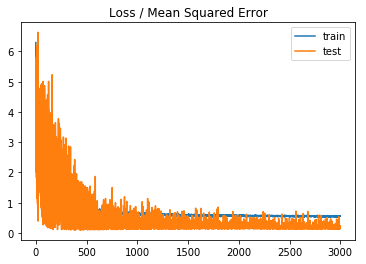

In [201]:
# numpy.random.seed(seed)
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=3000, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(pipeline, X_test, Y_test, cv=kfold)
# print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))
import matplotlib.pyplot as plt
plt.title('Loss / Mean Squared Error')
plt.plot(history_t1.history['loss'], label='train')
plt.plot(history_t1.history['val_loss'], label='test')
plt.legend()
plt.show()

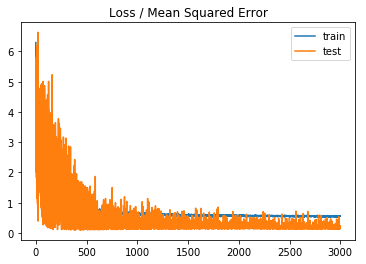

In [202]:
#Print training history (T1)
import matplotlib.pyplot as plt
plt.title('Loss / Mean Squared Error')
plt.plot(history_t1.history['loss'], label='train')
plt.plot(history_t1.history['val_loss'], label='test')
plt.legend()
plt.show()

# plt.plot(history.history['mean_squared_error'])
# plt.title('Model MSE')
# plt.ylabel('Loss')
# plt.xlabel('MSE')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# plt.plot(history.history['mean_absolute_error'])
# plt.title('Model MAE')
# plt.ylabel('Loss')
# plt.xlabel('MAE')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.title('Model MAPE')
# plt.ylabel('Loss')
# plt.xlabel('MAPE')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# plt.plot(history.history['cosine_proximity'])
# plt.title('Model Cosine Proximity')
# plt.ylabel('Loss')
# plt.xlabel('Cos')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [203]:
ynew_t1 = model_t1.predict(X)
ynew_t2 = model_t2.predict(X)
ynew_t3 = model_t3.predict(X)
m = len(ynew_t1)
ynew = [0]*m
for i in range(m):
    ynew[i] = [ynew_t1[i],ynew_t2[i],ynew_t3[i]]

In [204]:
X = X_test
Y = Y_test

In [205]:
indexes = [0]*len(X)
t1_act = [0]*len(X)
t1_pred= [0]*len(X)
t1_norm = [0]*len(X)
t1_pnorm = [0]*len(X)
t2_act = [0]*len(X)
t2_pred= [0]*len(X)
t2_norm = [0]*len(X)
t2_pnorm = [0]*len(X)
t3_act = [0]*len(X)
t3_pred= [0]*len(X)
t3_norm = [0]*len(X)
t3_pnorm = [0]*len(X)
for i in range(len(X)):
    print("Actual=(%s,%s,%s), Predicted=(%s,%s,%s)" % (Y[i][0],Y[i][1],Y[i][2], ynew[i][0],ynew[i][1],ynew[i][2]))
    t1_act[i] = Y[i][0]
    t2_act[i] = Y[i][1]
    t3_act[i] = Y[i][2]
    t1_pred[i] = ynew[i][0]
    t2_pred[i] = ynew[i][1]
    t3_pred[i] = ynew[i][2]
    t1_norm[i] = Y_act[i][0]
    t2_norm[i] = Y_act[i][1]
    t3_norm[i] = Y_act[i][2]
    t1_pnorm[i] = (ynew[i][0] * df['t1_cutoff'].std()) + df['t1_cutoff'].mean()
    t2_pnorm[i] = (ynew[i][1] * df['t2_cutoff'].std()) + df['t2_cutoff'].mean()
    t3_pnorm[i] = (ynew[i][2] * df['t3_cutoff'].std()) + df['t3_cutoff'].mean()
    
    indexes[i] = i

Actual=(-1.171141258761032,-0.6642359804727873,-0.7315464456939217), Predicted=([-1.1069325],[-0.70836174],[-0.47293758])
Actual=(-1.2376637201458096,-0.7860737166863297,-0.7871299659836262), Predicted=([-1.2688098],[-0.86686236],[-0.60018575])
Actual=(-1.0576192322674436,-0.6296014512203104,-0.7395645899172676), Predicted=([-1.0688733],[-0.7131549],[-0.4584253])
Actual=(-1.0379420810085551,-0.55791573441276,-0.7439728918040778), Predicted=([-1.2465616],[-0.90341824],[-0.6106025])
Actual=(-0.9651419927295367,-0.5820441596760536,-0.7415506741767741), Predicted=([-1.1251775],[-0.6758515],[-0.45797762])
Actual=(-1.0947836649383929,-0.6718484541259666,-0.7671147992738014), Predicted=([-0.919364],[-0.74617434],[-0.44850615])
Actual=(-0.316112774811854,-0.04410874077226909,-0.6189099711522427), Predicted=([-0.7967566],[-0.5426092],[-0.32634637])
Actual=(-1.2452938326938774,-0.8292301462690158,-0.7961411523367253), Predicted=([-1.5196503],[-1.0586051],[-0.7450038])
Actual=(-0.9579594950872673

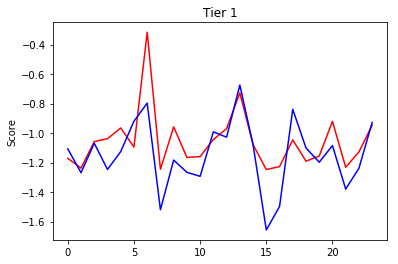

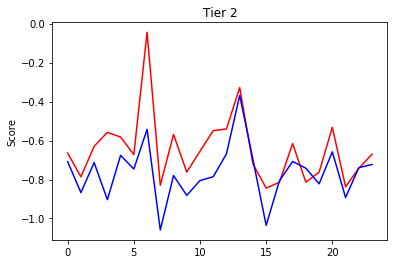

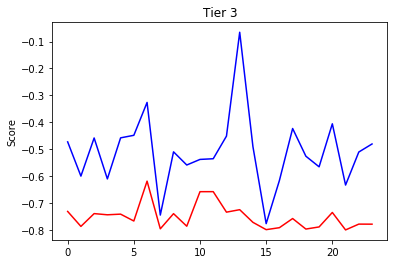

In [206]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Tier 1')
plt.plot(indexes,t1_act,color='red')
plt.plot(indexes,t1_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 2')
plt.plot(indexes,t2_act,color='red')
plt.plot(indexes,t2_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 3')
plt.plot(indexes,t3_act,color='red')
plt.plot(indexes,t3_pred,color='blue')
plt.ylabel('Score')
plt.show()

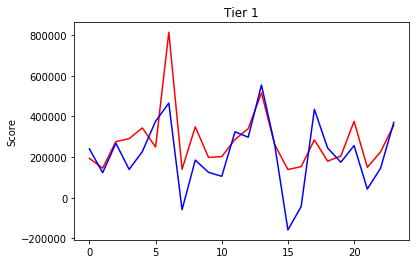

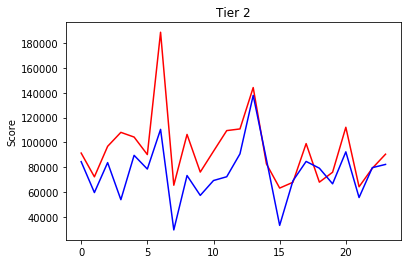

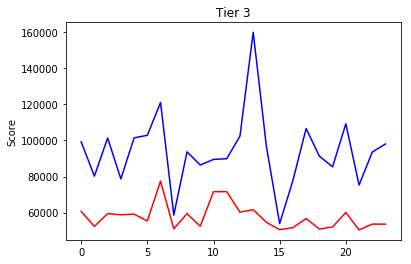

In [207]:
#Visualization, normalized

plt.title('Tier 1')
plt.plot(indexes,t1_norm,color='red')
plt.plot(indexes,t1_pnorm,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 2')
plt.plot(indexes,t2_norm,color='red')
plt.plot(indexes,t2_pnorm,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 3')
plt.plot(indexes,t3_norm,color='red')
plt.plot(indexes,t3_pnorm,color='blue')
plt.ylabel('Score')
plt.show()

In [208]:
#Individual Predictions

print('Event: Episode Tiara (Kasuga Mirai)')
print('predicted: ',t1_pnorm[18],t2_pnorm[18],t3_pnorm[18])
print('Actual: ',t1_norm[18],t2_norm[18],t3_norm[18],'\n')
print('Event: Primula (Nagayoshi Subaru)')
print('predicted: ',t1_pnorm[19],t2_pnorm[19],t3_pnorm[19])
print('Actual: ',t1_norm[19],t2_norm[19],t3_norm[19],'\n')
print('Event: Leader!! (Presiden)')
print('predicted: ',t1_pnorm[20],t2_pnorm[20],t3_pnorm[20])
print('Actual: ',t1_norm[20],t2_norm[20],t3_norm[20],'\n')
print('Event: Fruity Love (Bakane)')
print('predicted: ',t1_pnorm[21],t2_pnorm[21],t3_pnorm[21])
print('Actual: ',t1_norm[21],t2_norm[21],t3_norm[21],'\n')
print('Event: White Vows(Fuuka)')
print('predicted: ',t1_pnorm[22],t2_pnorm[22],t3_pnorm[22])
print('Actual: ',t1_norm[22],t2_norm[22],t3_norm[22],'\n')

Event: Episode Tiara (Kasuga Mirai)
predicted:  [244710.56] [79189.125] [91252.4]
Actual:  179678.0 67929.0 50890.0 

Event: Primula (Nagayoshi Subaru)
predicted:  [174522.38] [66585.14] [85372.08]
Actual:  204887.0 75940.0 52066.0 

Event: Leader!! (Presiden)
predicted:  [256436.56] [92381.11] [109202.34]
Actual:  375723.0 112226.0 60080.0 

Event: Fruity Love (Bakane)
predicted:  [42434.562] [55519.562] [75269.336]
Actual:  149545.0 64197.0 50413.0 

Event: White Vows(Fuuka)
predicted:  [144635.25] [79618.69] [93564.69]
Actual:  225264.0 79118.0 53628.0 



In [209]:
#Get metrics from test manually (lmao I'm retarded)
n = len(t1_pnorm)-1
count_t1 = 0
count_t2 = 0
count_t3 = 0
for i in range(n):
    if(t1_norm[i]>t1_pnorm[i]):
        count_t1 += (abs(t1_norm[i] - t1_pnorm[i]))/t1_norm[i]
    else:
        count_t1 += (abs(t1_pnorm[i] - t1_norm[i]))/t1_pnorm[i]
            
    if(t2_norm[i]>t2_pnorm[i]):
        count_t2 += (abs(t2_norm[i] - t2_pnorm[i]))/t2_norm[i]
    else:
        count_t2 += (abs(t2_pnorm[i] - t2_norm[i]))/t2_pnorm[i]
            
    if(t3_norm[i]>t3_pnorm[i]):
        count_t3 += (abs(t3_norm[i] - t3_pnorm[i]))/t3_norm[i]
    else:
        count_t3 += (abs(t3_pnorm[i] - t3_norm[i]))/t3_pnorm[i]
    
#     count_t1 += abs(t1_norm[i] - t1_pnorm[i])
#     count_t2 += abs(t2_norm[i] - t2_pnorm[i])
#     count_t3 += abs(t3_norm[i] - t3_pnorm[i])
    
margin_avg_t1 = count_t1/n
margin_avg_t2 = count_t2/n
margin_avg_t3 = count_t3/n

margin_t1 = 1.5*margin_avg_t1
margin_t2 = 1.5*margin_avg_t2
margin_t3 = 1.5*margin_avg_t3

print('MoE = 1.5 * avg error')
print('Margin of Error (T1): ', margin_t1*100,"%")
print('Margin of Error (T2): ', margin_t2*100,"%")
print('Margin of Error (T3): ', margin_t3*100,"%")

print('Raw Margin of Error (T1): ', margin_avg_t1*100,"%")
print('Raw Margin of Error (T2): ', margin_avg_t2*100,"%")
print('Raw Margin of Error (T3): ', margin_avg_t3*100,"%")

MoE = 1.5 * avg error
Margin of Error (T1):  [69.43469] %
Margin of Error (T2):  [31.101748] %
Margin of Error (T3):  [54.113186] %
Raw Margin of Error (T1):  [46.289795] %
Raw Margin of Error (T2):  [20.734499] %
Raw Margin of Error (T3):  [36.075455] %


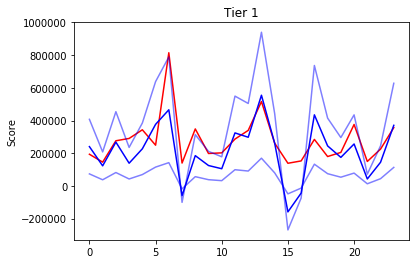

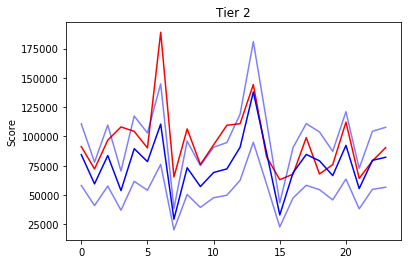

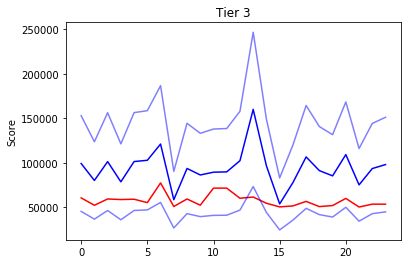

In [210]:
#Visualization, normalized, with margins

plt.title('Tier 1')
plt.plot(indexes,t1_norm,color='red')
plt.plot(indexes,t1_pnorm,color='blue')
plt.plot(indexes,t1_pnorm*(1+margin_t1),color='blue',alpha=0.5)
plt.plot(indexes,t1_pnorm*(1-margin_t1),color='blue',alpha=0.5)
plt.ylabel('Score')
plt.show()

plt.title('Tier 2')
plt.plot(indexes,t2_norm,color='red')
plt.plot(indexes,t2_pnorm,color='blue')
plt.plot(indexes,t2_pnorm*(1+margin_t2),color='blue',alpha=0.5)
plt.plot(indexes,t2_pnorm*(1-margin_t2),color='blue',alpha=0.5)
plt.ylabel('Score')
plt.show()

plt.title('Tier 3')
plt.plot(indexes,t3_norm,color='red')
plt.plot(indexes,t3_pnorm,color='blue')
plt.plot(indexes,t3_pnorm*(1+margin_t3),color='blue',alpha=0.5)
plt.plot(indexes,t3_pnorm*(1-margin_t3),color='blue',alpha=0.5)
plt.ylabel('Score')
plt.show()


In [211]:
print(t2_pnorm[23]*(1+margin_t2))
print(t2_pnorm[23])
print(t2_pnorm[23]*(1-margin_t2))

[107822.484]
[82243.36]
[56664.234]


In [212]:
#Get percentage
n = len(t1_pnorm)-1
count_t1 = 0
count_t2 = 0
count_t3 = 0
for i in range(n):
    #check t1
    if(t1_norm[i] > t1_pnorm[i]*(1+margin_t1) or t1_norm[i] < t1_pnorm[i]*(1-margin_t1)):
        count_t1 +=1
        
    if(t2_norm[i] > t2_pnorm[i]*(1+margin_t2) or t2_norm[i] < t2_pnorm[i]*(1-margin_t2)):
        count_t2 +=1
        
    if(t3_norm[i] > t3_pnorm[i]*(1+margin_t3) or t3_norm[i] < t3_pnorm[i]*(1-margin_t3)):
        count_t3 +=1
    
per_t1 = count_t1/n
per_t2 = count_t2/n
per_t3 = count_t3/n
print('Error Count (T1):', count_t1, '/',n,'; ', per_t1*100, '%')
print('Error Count (T2):', count_t2, '/',n,'; ', per_t2*100, '%')
print('Error Count (T3):', count_t3, '/',n,'; ', per_t3*100, '%')

Error Count (T1): 8 / 23 ;  34.78260869565217 %
Error Count (T2): 8 / 23 ;  34.78260869565217 %
Error Count (T3): 1 / 23 ;  4.3478260869565215 %


In [214]:
#Confidence Numbers
c1 = (1-margin_t1) * (1-per_t1)
c2 = (1-margin_t2) * (1-per_t2)
c3 = (1-margin_t3) * (1-per_t3)

#Accuracy
print('MOE * CI (T1): ', c1*100,'%')
print('MOE * CI (T2): ', c2*100,'%')
print('MOE * CI (T3): ', c3*100,'%')

MOE * CI (T1):  [19.933899] %
MOE * CI (T2):  [44.93364] %
MOE * CI (T3):  [43.891735] %


In [91]:
#Saved Model
MoE = 1.5 * avg error
Margin of Error (T1):  [24.941858] %
Margin of Error (T2):  [22.35609] %
Margin of Error (T3):  [59.10622] %
Raw Margin of Error (T1):  [16.627907] %
Raw Margin of Error (T2):  [14.904061] %
Raw Margin of Error (T3):  [39.40415] %
    
Error Count (T1): 18 / 75 ;  24.0 %
Error Count (T2): 6 / 23 ;  26.08695652173913 %
Error Count (T3): 32 / 75 ;  42.66666666666667 %
    
MOE * CI (T1):  [57.044186] %
MOE * CI (T2):  [57.388973] %
MOE * CI (T3):  [23.445766] %

SyntaxError: invalid syntax (<ipython-input-91-98dce1754527>, line 2)

In [130]:
# #Save model
# model_t1.save('mltd_model_t1_v2.h5')
# model_t2.save('mltd_model_t2_v2.h5')
# model_t3.save('mltd_model_t3_v2.h5')